### Table of contents
1. [Supp Figure 8A-D. Cox models for PFS in IO+VEGF arm of IMM151 and JAV101 (CS ratio, full model, then clinical variables only)](#1)
2. [Supp Figure 8E-F. Cox models for PFS in IO+VEGF arm of JAV101 (hallmark IFNG signature, 6p21 disomy or deletion)](#2)
3. [Supp Figure 8G-H. Cox models for PFS in IO+VEGF arm of JAV101 (tumor/fibroblast IFNg signature, 6p21 disomy or deletion)](#3)
4. [Supp Figure 8I-J. Cox models for PFS in IO+VEGF arm of IMM151 and JAV101 (Zemek at al fast on/off signature)](#4)
5. [Supp Figure 8K-L. Logistic regression models for CB vs NCB in IO+VEGF arm of IMM151 and JAV101 (Zemek at al fast on/off signature)](#5)
6. [Supp Figure 8M-N. Cox models for PFS in IO+VEGF arm of IMM151 and JAV101 (IFN1 signatures)](#6)
7. [Supp Figure 8O-P. Logistic regression models for CB vs NCB in IO+VEGF arm of IMM151 and JAV101 (IFN1 signatures)](#7)
8. [Supp Figure 8Q-R. Cox models for PFS in IO+VEGF arm of IMM151 and JAV101 (T cell-inflamed GEP)](#8)
9. [Supp Figure 8S-T. Logistic regression models for CB vs NCB in IO+VEGF arm of IMM151 and JAV101 (T cell-inflamed GEP)](#9)

In [10]:
library(harmony)
library(hacksig)
library(car)
library(corrplot)
library(ComplexHeatmap)
library(rstatix)
library(stringr)
library(Seurat)
library(useful)
library(dplyr)
library(ggpubr)
library(ggrepel)
library(glue)
library(RColorBrewer)
library(ggpubr)
library(ggrepel)
library(reshape2)
library(lmerTest)
library(Scillus)
library(cowplot)
library(viridis)
library(hrbrthemes)
library(ggridges)
library(pheatmap)
library(ggplot2)
library(magrittr)
library(broom)
library(yarrr)

library(survival)
library(survminer)
library(tidyverse)
library(forestmodel)
library(scales)
library(pROC)
library(car)


set.seed(1234)

options(repr.plot.width=12, repr.plot.height=9)

### Create figure output directory

In [3]:
dir.create("../../Supp_Figures_Final/Figure_S8")

### Read in CTS ISG signatures

In [11]:
ISG_sigs = readRDS("../../Signatures/Final_Manuscript_Signatures_CTS_ISGs.RDS")
ISG_sigs$manuscript_myeloid_combined
ISG_sigs$manuscript_tumor_combined
ISG_sigs$manuscript_t_nk_combined

[1] "IFI30"    "LPAR6"    "FCGR1A"   "MYD88"    "VSIG4"    "LILRB1"  
 [7] "IL10"     "SECTM1"   "MX2"      "CXCL10"   "CD86"     "GCH1"    
[13] "SIGLEC10" "FPR1"     "JAK2"     "CXCL9"    "TNFAIP2"  "PTGS2"   
[19] "IL15"     "LAMP3"    "NFKB1"

[1] "C1R"     "PFKP"    "TNFAIP6" "C1S"     "CFB"     "SSPN"

[1] "NLRC5" "OASL"  "IL2RB" "XCL1"  "GZMA"  "STAT4" "CCL5"  "SOCS1"

### Supp Figure 8A-D. Cox models for PFS in IO+VEGF arm of IMM151 and JAV101 (CS ratio, full model, then clinical variables only) <a name="1"></a>

### Set panels for forest_model plots

In [12]:
panels <- list(
  list(width = 0.01),
  list(width = 0.18, display = ~variable, fontface = "bold", heading = "Variable"),
  list(width = 0.1, display = ~level),
  list(width = 0.05, display = ~n, hjust = 1, heading = "N"),
  list(width = 0.03, item = "vline", hjust = 0.5),
  list(
    width = 0.15, item = "forest", hjust = 0.5, heading = "Hazard ratio", linetype = "dashed",
    line_x = 0
  ),
  list(width = 0.03, item = "vline", hjust = 0.5),
  list(width = 0.12, display = ~ ifelse(reference, "Reference", sprintf(
    "%0.2f (%0.2f, %0.2f)",
    trans(estimate), trans(conf.low), trans(conf.high)
  )), display_na = NA),
  list(
    width = 0.075,
    display = ~ ifelse(reference, "", format.pval(p.value, digits = 1,nsmall = 3, eps = 0.001)),
    display_na = NA, hjust = 1, heading = "p"
  ),
  list(width = 0.01)
)

### IMM151

In [13]:
clin_imm151_full = readRDS("../../Trial_Cohorts/IMM151/IMM151_Clinical_Metadata_with_SigScores_CIBERSORTx.RDS")

df = data.frame(table(colnames(clin_imm151_full)))
subset(df, Freq > 1)

clin_imm151_full = subset(clin_imm151_full, select = -c(IFIT3) )

Var1  Freq
8604 IFIT3 2

In [14]:
clin_imm151_full$CS_ratio = clin_imm151_full$CXCL9/clin_imm151_full$SPP1


 CB NCB 
263 117 


Call:
glm(formula = Benefit_Binary_Num ~ scale(CS_ratio) + scale(TAM_CS) + 
    scale(Monocyte_CS) + scale(DC_CS) + scale(Krishna_CD8A_Tissue_resident) + 
    scale(CD8_CS) + scale(manuscript_IFNG_tumor) + scale(Tumor_CS) + 
    scale(Fibroblast_CS) + scale(AGE) + SEX + MSKCC_RISK_SCORE + 
    PDL1_IHC, family = "binomial", data = atezo_bev)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0986  -1.1529   0.6716   0.8662   1.7438  

Coefficients:
                                    Estimate Std. Error z value Pr(>|z|)  
(Intercept)                          0.56078    0.39885   1.406   0.1597  
scale(CS_ratio)                     -0.06268    0.19328  -0.324   0.7457  
scale(TAM_CS)                       -0.23317    0.15753  -1.480   0.1388  
scale(Monocyte_CS)                   0.05345    0.15357   0.348   0.7278  
scale(DC_CS)                         0.02014    0.15385   0.131   0.8959  
scale(Krishna_CD8A_Tissue_resident)  0.24151    0.25544   0.945   0.3444  
s

GVIF     Df GVIF^(1/(2*Df))
scale(CS_ratio)                     2.811506 1  1.676755       
scale(TAM_CS)                       1.876648 1  1.369908       
scale(Monocyte_CS)                  1.784227 1  1.335750       
scale(DC_CS)                        1.334176 1  1.155065       
scale(Krishna_CD8A_Tissue_resident) 4.872384 1  2.207348       
scale(CD8_CS)                       2.402378 1  1.549961       
scale(manuscript_IFNG_tumor)        1.628108 1  1.275973       
scale(Tumor_CS)                     4.756760 1  2.181000       
scale(Fibroblast_CS)                1.961156 1  1.400413       
scale(AGE)                          1.146874 1  1.070922       
SEX                                 1.095232 1  1.046533       
MSKCC_RISK_SCORE                    1.118200 2  1.028324       
PDL1_IHC                            1.374697 1  1.172475

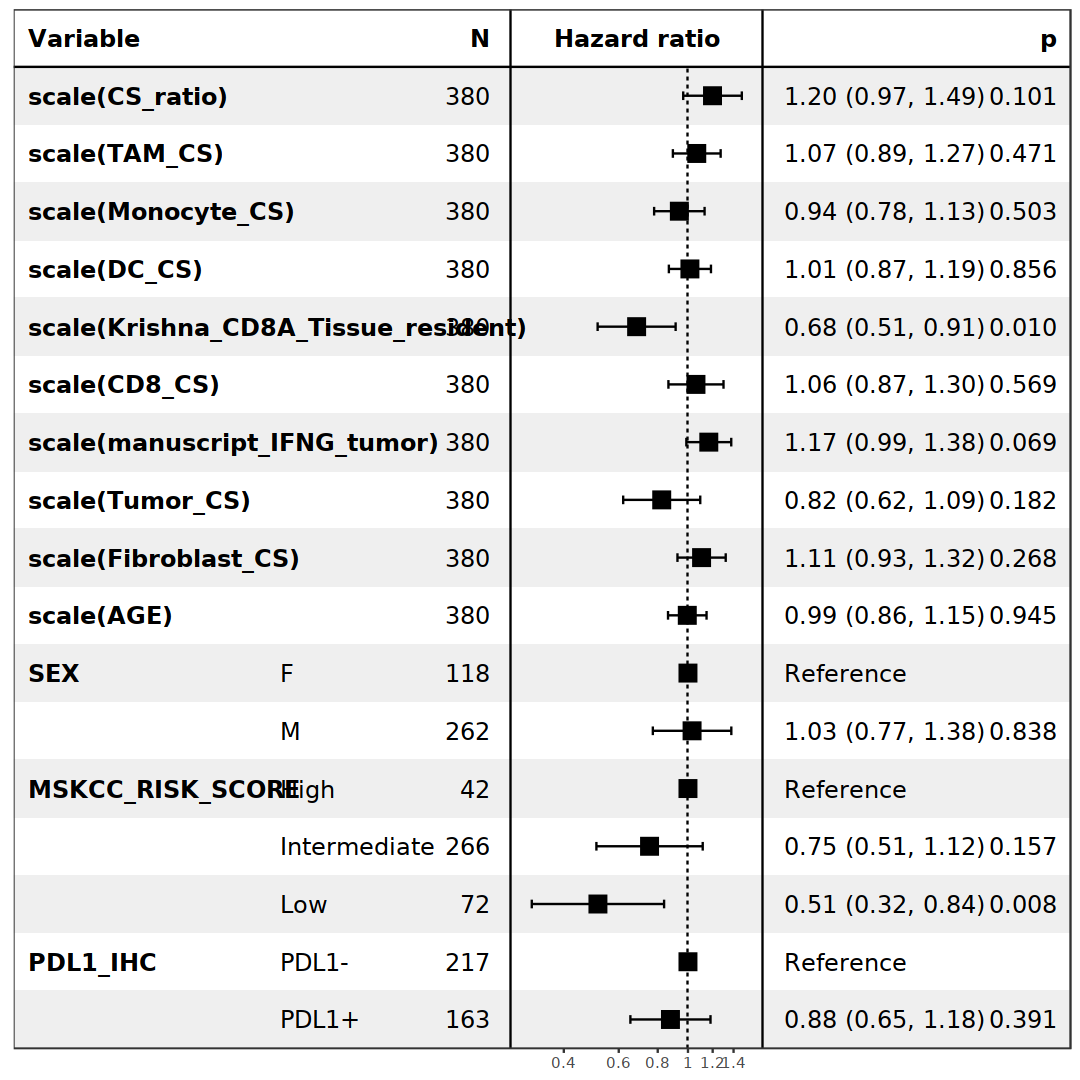

In [15]:
options(repr.plot.width=9, repr.plot.height=9)

clin_imm151_full$PDL1_IHC = relevel(factor(clin_imm151_full$PDL1_IHC), ref = "PDL1-")
atezo_bev = subset(clin_imm151_full, ARM == "atezo_bev")

atezo_bev = subset(atezo_bev, OBJECTIVE_RESPONSE %in% c("CR","PD","PR","SD"))
atezo_bev = mutate(atezo_bev, Benefit = ifelse(OBJECTIVE_RESPONSE == "CR","CB",ifelse(OBJECTIVE_RESPONSE == "PR","CB",ifelse(OBJECTIVE_RESPONSE == "PD","NCB",ifelse(OBJECTIVE_RESPONSE == "SD" & PFS_MONTHS >= 6,"CB","NCB")))))
table(atezo_bev$Benefit)

atezo_bev = mutate(atezo_bev, Benefit_Binary_Num = ifelse(Benefit == "CB",1,0))

mylogit <- glm(Benefit_Binary_Num ~ scale(CS_ratio) + scale(TAM_CS) + scale(Monocyte_CS) + scale(DC_CS) + scale(Krishna_CD8A_Tissue_resident) + scale(CD8_CS) + scale(manuscript_IFNG_tumor)  + scale(Tumor_CS) + scale(Fibroblast_CS) + scale(AGE) + SEX + MSKCC_RISK_SCORE + PDL1_IHC, family = "binomial", data = atezo_bev)
summary(mylogit)
vif(mylogit)

res.cox <- coxph(Surv(PFS_MONTHS, PFS_CENSOR) ~ scale(CS_ratio) + scale(TAM_CS) + scale(Monocyte_CS) + scale(DC_CS) + scale(Krishna_CD8A_Tissue_resident) + scale(CD8_CS) + scale(manuscript_IFNG_tumor)  + scale(Tumor_CS) + scale(Fibroblast_CS)+ scale(AGE) + SEX + MSKCC_RISK_SCORE + PDL1_IHC, data = atezo_bev)
imm151_plot_fullmodel = forest_model(res.cox, panels,recalculate_width = F)
imm151_plot_fullmodel


 CB NCB 
263 117 


Call:
glm(formula = Benefit_Binary_Num ~ scale(CS_ratio) + scale(AGE) + 
    SEX + MSKCC_RISK_SCORE + PDL1_IHC, family = "binomial", data = atezo_bev)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0766  -1.3723   0.7835   0.9111   1.2490  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)   
(Intercept)                   0.33325    0.37220   0.895   0.3706   
scale(CS_ratio)               0.06911    0.12412   0.557   0.5777   
scale(AGE)                    0.17428    0.11354   1.535   0.1248   
SEXM                          0.13523    0.24342   0.556   0.5785   
MSKCC_RISK_SCOREIntermediate  0.15575    0.34692   0.449   0.6535   
MSKCC_RISK_SCORELow           1.19116    0.45993   2.590   0.0096 **
PDL1_IHCPDL1+                 0.22527    0.25262   0.892   0.3725   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 469.23  on 379  degree

GVIF     Df GVIF^(1/(2*Df))
scale(CS_ratio)  1.204097 1  1.097314       
scale(AGE)       1.026795 1  1.013309       
SEX              1.012379 1  1.006170       
MSKCC_RISK_SCORE 1.011787 2  1.002934       
PDL1_IHC         1.202448 1  1.096562

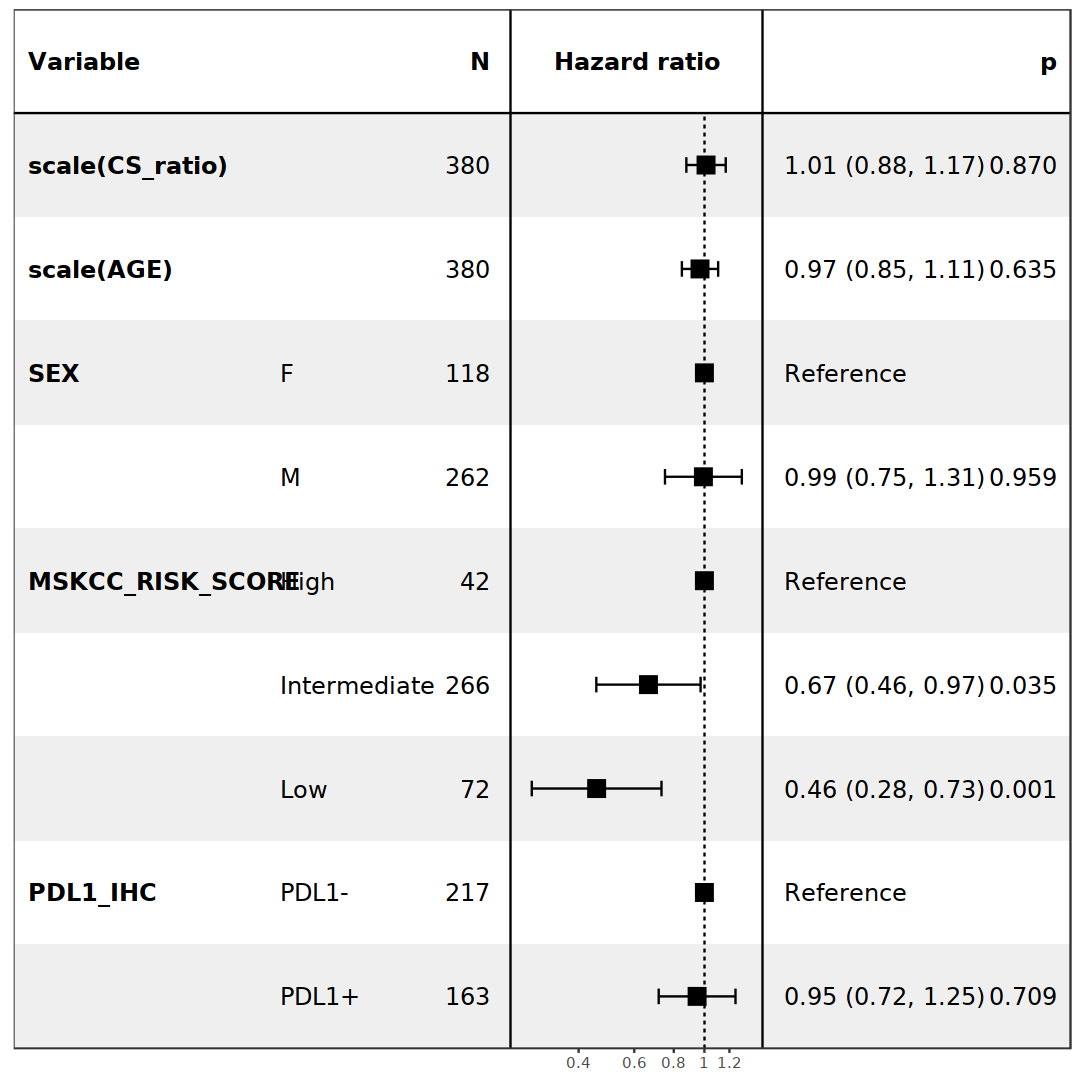

In [16]:
options(repr.plot.width=9, repr.plot.height=9)

clin_imm151_full$PDL1_IHC = relevel(factor(clin_imm151_full$PDL1_IHC), ref = "PDL1-")
atezo_bev = subset(clin_imm151_full, ARM == "atezo_bev")

atezo_bev = subset(atezo_bev, OBJECTIVE_RESPONSE %in% c("CR","PD","PR","SD"))
atezo_bev = mutate(atezo_bev, Benefit = ifelse(OBJECTIVE_RESPONSE == "CR","CB",ifelse(OBJECTIVE_RESPONSE == "PR","CB",ifelse(OBJECTIVE_RESPONSE == "PD","NCB",ifelse(OBJECTIVE_RESPONSE == "SD" & PFS_MONTHS >= 6,"CB","NCB")))))
table(atezo_bev$Benefit)

atezo_bev = mutate(atezo_bev, Benefit_Binary_Num = ifelse(Benefit == "CB",1,0))

mylogit <- glm(Benefit_Binary_Num ~ scale(CS_ratio) + scale(AGE) + SEX + MSKCC_RISK_SCORE + PDL1_IHC, family = "binomial", data = atezo_bev)
summary(mylogit)
vif(mylogit)

res.cox <- coxph(Surv(PFS_MONTHS, PFS_CENSOR) ~ scale(CS_ratio) + scale(AGE) + SEX + MSKCC_RISK_SCORE + PDL1_IHC, data = atezo_bev)
imm151_plot_clinvaronly = forest_model(res.cox, panels,recalculate_width = F)
imm151_plot_clinvaronly

### JAV101

In [17]:
clin_jav101_full = readRDS("../../Trial_Cohorts/JAV101/JAV101_Clinical_Metadata_with_SigScores_CIBERSORTx.RDS")

df = data.frame(table(colnames(clin_jav101_full)))
subset(df, Freq > 1)

clin_jav101_full = subset(clin_jav101_full, select = -c(CD8A,Eosinophils,IFIT3, Neutrophils) )

Var1        Freq
14682 CD8A        2   
17979 Eosinophils 2   
21236 IFIT3       2   
27495 Neutrophils 2

In [18]:
clin_jav101_full$CS_ratio = clin_jav101_full$CXCL9/clin_jav101_full$SPP1


 CB NCB 
239  96 


Call:
glm(formula = Benefit_Binary_Num ~ scale(CS_ratio) + scale(TAM_CS) + 
    scale(Monocyte_CS) + scale(DC_CS) + scale(Krishna_CD8A_Tissue_resident) + 
    scale(CD8_CS) + scale(manuscript_IFNG_tumor) + scale(Tumor_CS) + 
    scale(Fibroblast_CS) + scale(Age) + Sex + MSKCC + PDL1_status_v1, 
    family = "binomial", data = avel_axit)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1795  -1.0979   0.6323   0.8270   1.5513  

Coefficients:
                                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)                         -0.740582   0.468694  -1.580 0.114085    
scale(CS_ratio)                     -0.209062   0.178504  -1.171 0.241521    
scale(TAM_CS)                        0.006839   0.171810   0.040 0.968247    
scale(Monocyte_CS)                  -0.070959   0.157140  -0.452 0.651580    
scale(DC_CS)                        -0.060453   0.147406  -0.410 0.681722    
scale(Krishna_CD8A_Tissue_resident)  0.212652   0.255799   0.83

GVIF     Df GVIF^(1/(2*Df))
scale(CS_ratio)                     2.006283 1  1.416433       
scale(TAM_CS)                       1.733296 1  1.316547       
scale(Monocyte_CS)                  1.429519 1  1.195625       
scale(DC_CS)                        1.379278 1  1.174427       
scale(Krishna_CD8A_Tissue_resident) 3.935144 1  1.983720       
scale(CD8_CS)                       1.693691 1  1.301419       
scale(manuscript_IFNG_tumor)        2.043076 1  1.429362       
scale(Tumor_CS)                     3.789279 1  1.946607       
scale(Fibroblast_CS)                2.055392 1  1.433664       
scale(Age)                          1.063099 1  1.031067       
Sex                                 1.060123 1  1.029623       
MSKCC                               1.142887 2  1.033953       
PDL1_status_v1                      1.258737 1  1.121934

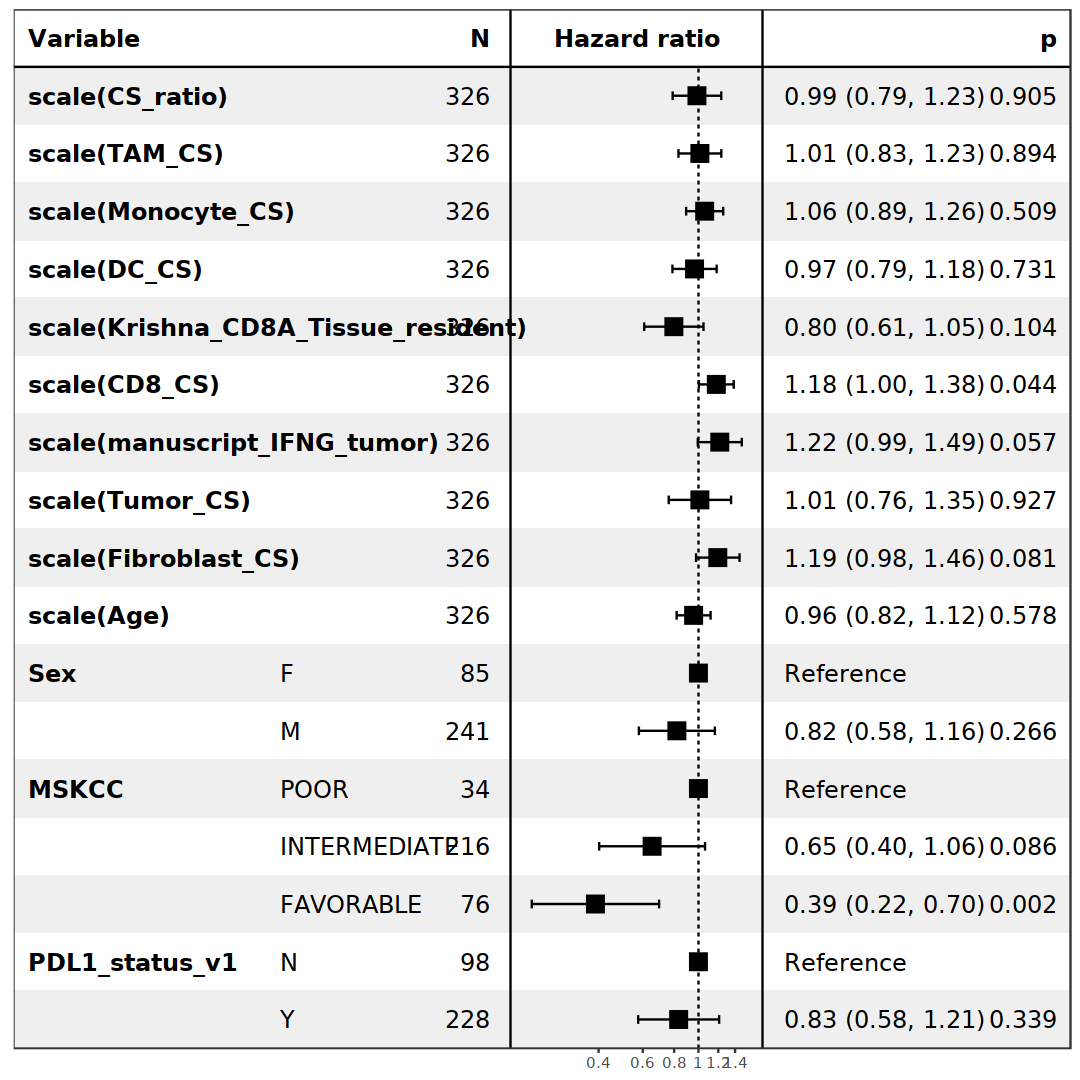

In [19]:
options(repr.plot.width=9, repr.plot.height=9)

avel_axit = subset(clin_jav101_full, Arm == "Avelumab + Axitinib")

avel_axit = subset(avel_axit, ORR %in% c("CR","PD","PR","SD"))
avel_axit = mutate(avel_axit, Benefit = ifelse(ORR == "CR","CB",ifelse(ORR == "PR","CB",ifelse(ORR == "PD","NCB",ifelse(ORR == "SD" & PFS >= 6,"CB","NCB")))))
table(avel_axit$Benefit)

avel_axit = mutate(avel_axit, Benefit_Binary_Num = ifelse(Benefit == "CB",1,0))

mylogit <- glm(Benefit_Binary_Num ~  scale(CS_ratio) + scale(TAM_CS) + scale(Monocyte_CS) + scale(DC_CS) + scale(Krishna_CD8A_Tissue_resident) + scale(CD8_CS) + scale(manuscript_IFNG_tumor)  + scale(Tumor_CS) + scale(Fibroblast_CS) + scale(Age) + Sex + MSKCC + PDL1_status_v1, family = "binomial", data = avel_axit)
summary(mylogit)
vif(mylogit)

res.cox <- coxph(Surv(PFS, PFS_CNSR) ~  scale(CS_ratio) + scale(TAM_CS) + scale(Monocyte_CS) + scale(DC_CS) + scale(Krishna_CD8A_Tissue_resident) + scale(CD8_CS) + scale(manuscript_IFNG_tumor)  + scale(Tumor_CS) + scale(Fibroblast_CS) + scale(Age) + Sex + MSKCC + PDL1_status_v1, data = avel_axit)
jav101_plot_fullmodel = forest_model(res.cox, panels,recalculate_width = F)
jav101_plot_fullmodel


 CB NCB 
239  96 


Call:
glm(formula = Benefit_Binary_Num ~ scale(CS_ratio) + scale(Age) + 
    Sex + MSKCC + PDL1_status_v1, family = "binomial", data = avel_axit)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2254  -1.1790   0.6834   0.8071   1.5576  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -0.718423   0.443620  -1.619 0.105349    
scale(CS_ratio)    0.007918   0.136674   0.058 0.953799    
scale(Age)         0.211346   0.125869   1.679 0.093134 .  
SexM               0.166641   0.287181   0.580 0.561734    
MSKCCINTERMEDIATE  1.004922   0.383295   2.622 0.008747 ** 
MSKCCFAVORABLE     1.810606   0.468976   3.861 0.000113 ***
PDL1_status_v1Y    0.644335   0.286170   2.252 0.024349 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 395.19  on 325  degrees of freedom
Residual deviance: 371.35  on 319  degrees of freedom
  (9 obser

GVIF     Df GVIF^(1/(2*Df))
scale(CS_ratio) 1.166017 1  1.079823       
scale(Age)      1.013769 1  1.006861       
Sex             1.029790 1  1.014786       
MSKCC           1.049802 2  1.012225       
PDL1_status_v1  1.157395 1  1.075823

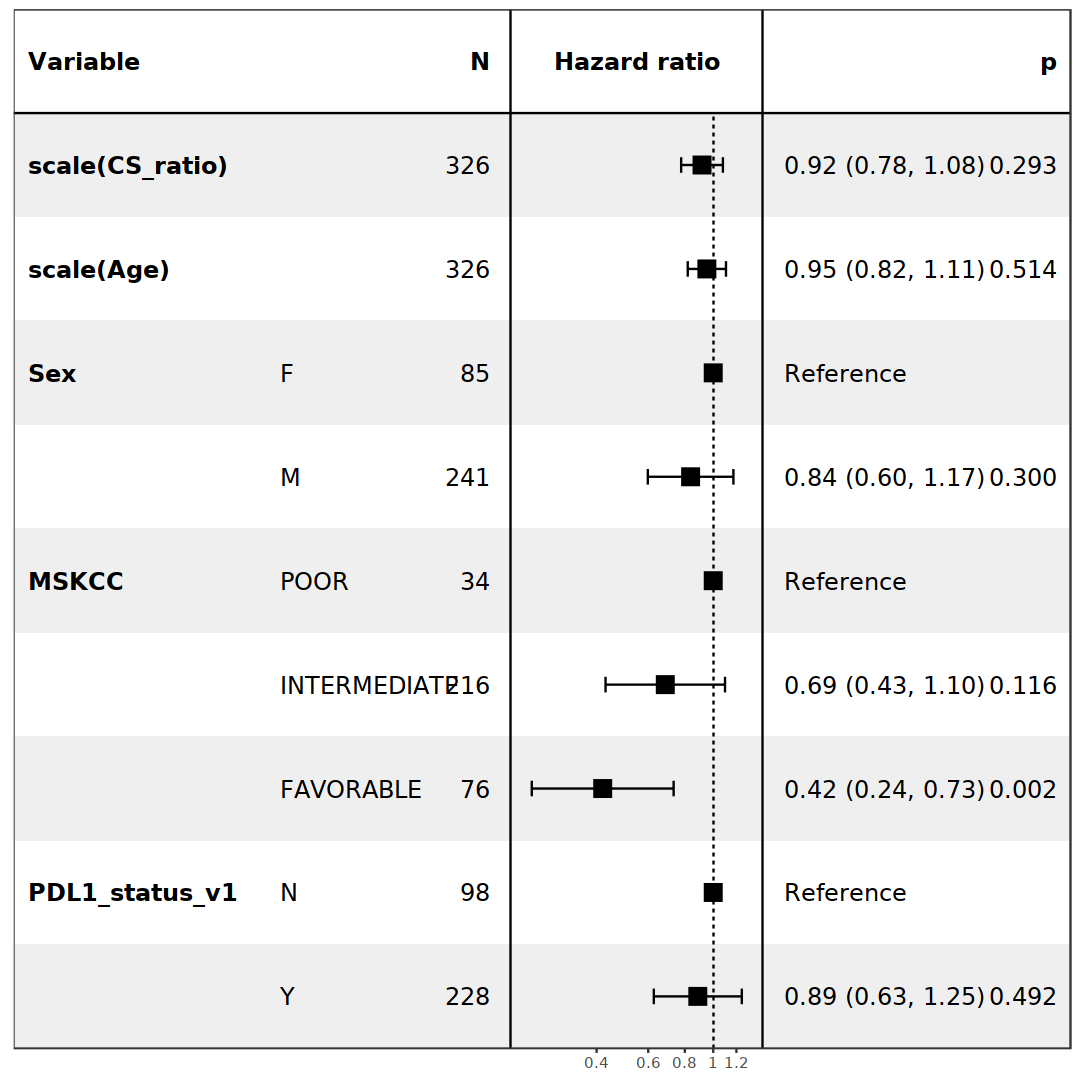

In [20]:
options(repr.plot.width=9, repr.plot.height=9)

avel_axit = subset(clin_jav101_full, Arm == "Avelumab + Axitinib")

avel_axit = subset(avel_axit, ORR %in% c("CR","PD","PR","SD"))
avel_axit = mutate(avel_axit, Benefit = ifelse(ORR == "CR","CB",ifelse(ORR == "PR","CB",ifelse(ORR == "PD","NCB",ifelse(ORR == "SD" & PFS >= 6,"CB","NCB")))))
table(avel_axit$Benefit)

avel_axit = mutate(avel_axit, Benefit_Binary_Num = ifelse(Benefit == "CB",1,0))

mylogit <- glm(Benefit_Binary_Num ~  scale(CS_ratio) + scale(Age) + Sex + MSKCC + PDL1_status_v1, family = "binomial", data = avel_axit)
summary(mylogit)
vif(mylogit)

res.cox <- coxph(Surv(PFS, PFS_CNSR) ~  scale(CS_ratio) + scale(Age) + Sex + MSKCC + PDL1_status_v1, data = avel_axit)
jav101_plot_clinvaronly = forest_model(res.cox, panels,recalculate_width = F)
jav101_plot_clinvaronly

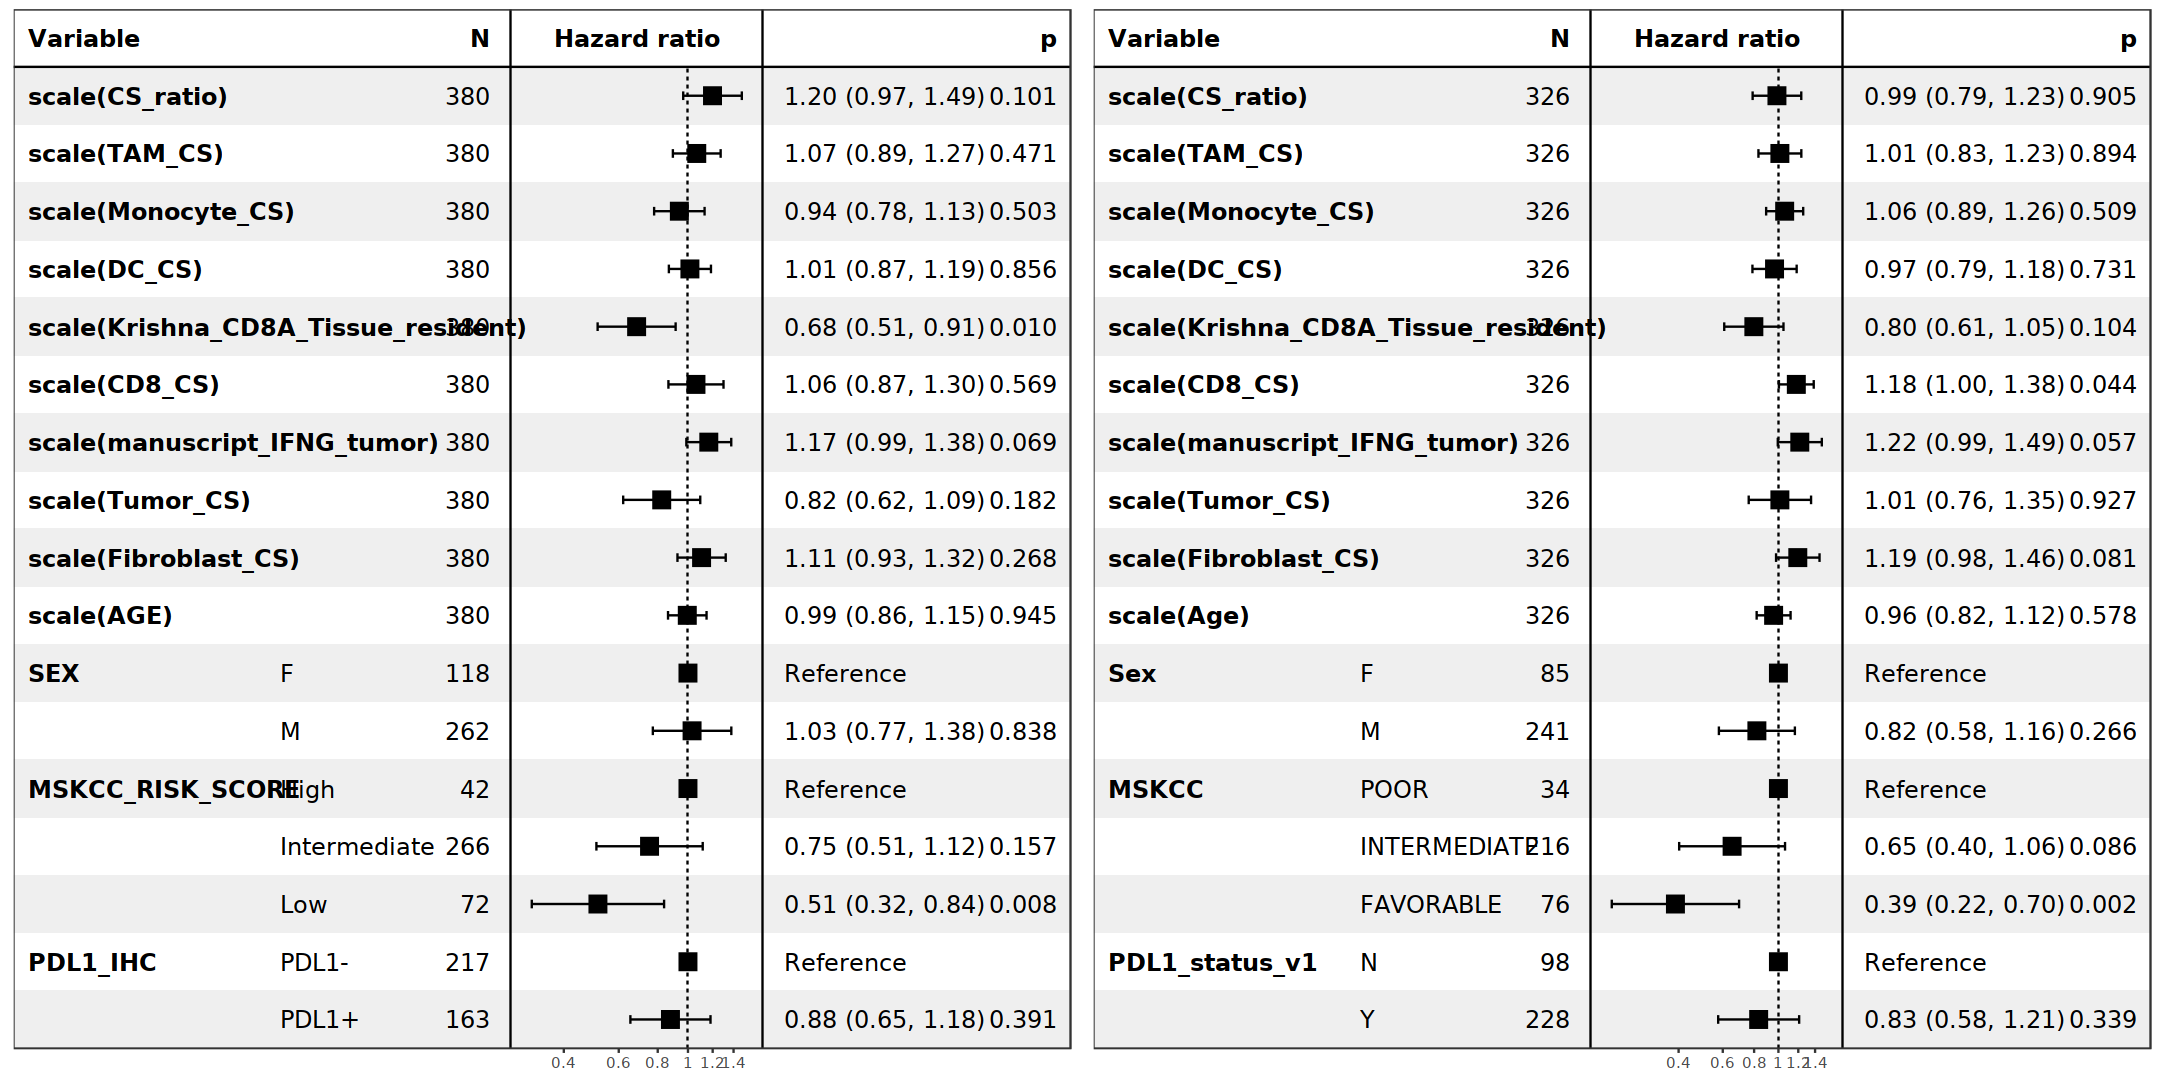

In [21]:
options(repr.plot.width=18, repr.plot.height=9)

ggarrange(imm151_plot_fullmodel, jav101_plot_fullmodel)

ggsave("../../Supp_Figures_Final/Figure_S8/FigureS8A_B_Cox_IMM151_JAV101_ICB_CSRatio_FullModel.pdf",width = 18, height = 9)

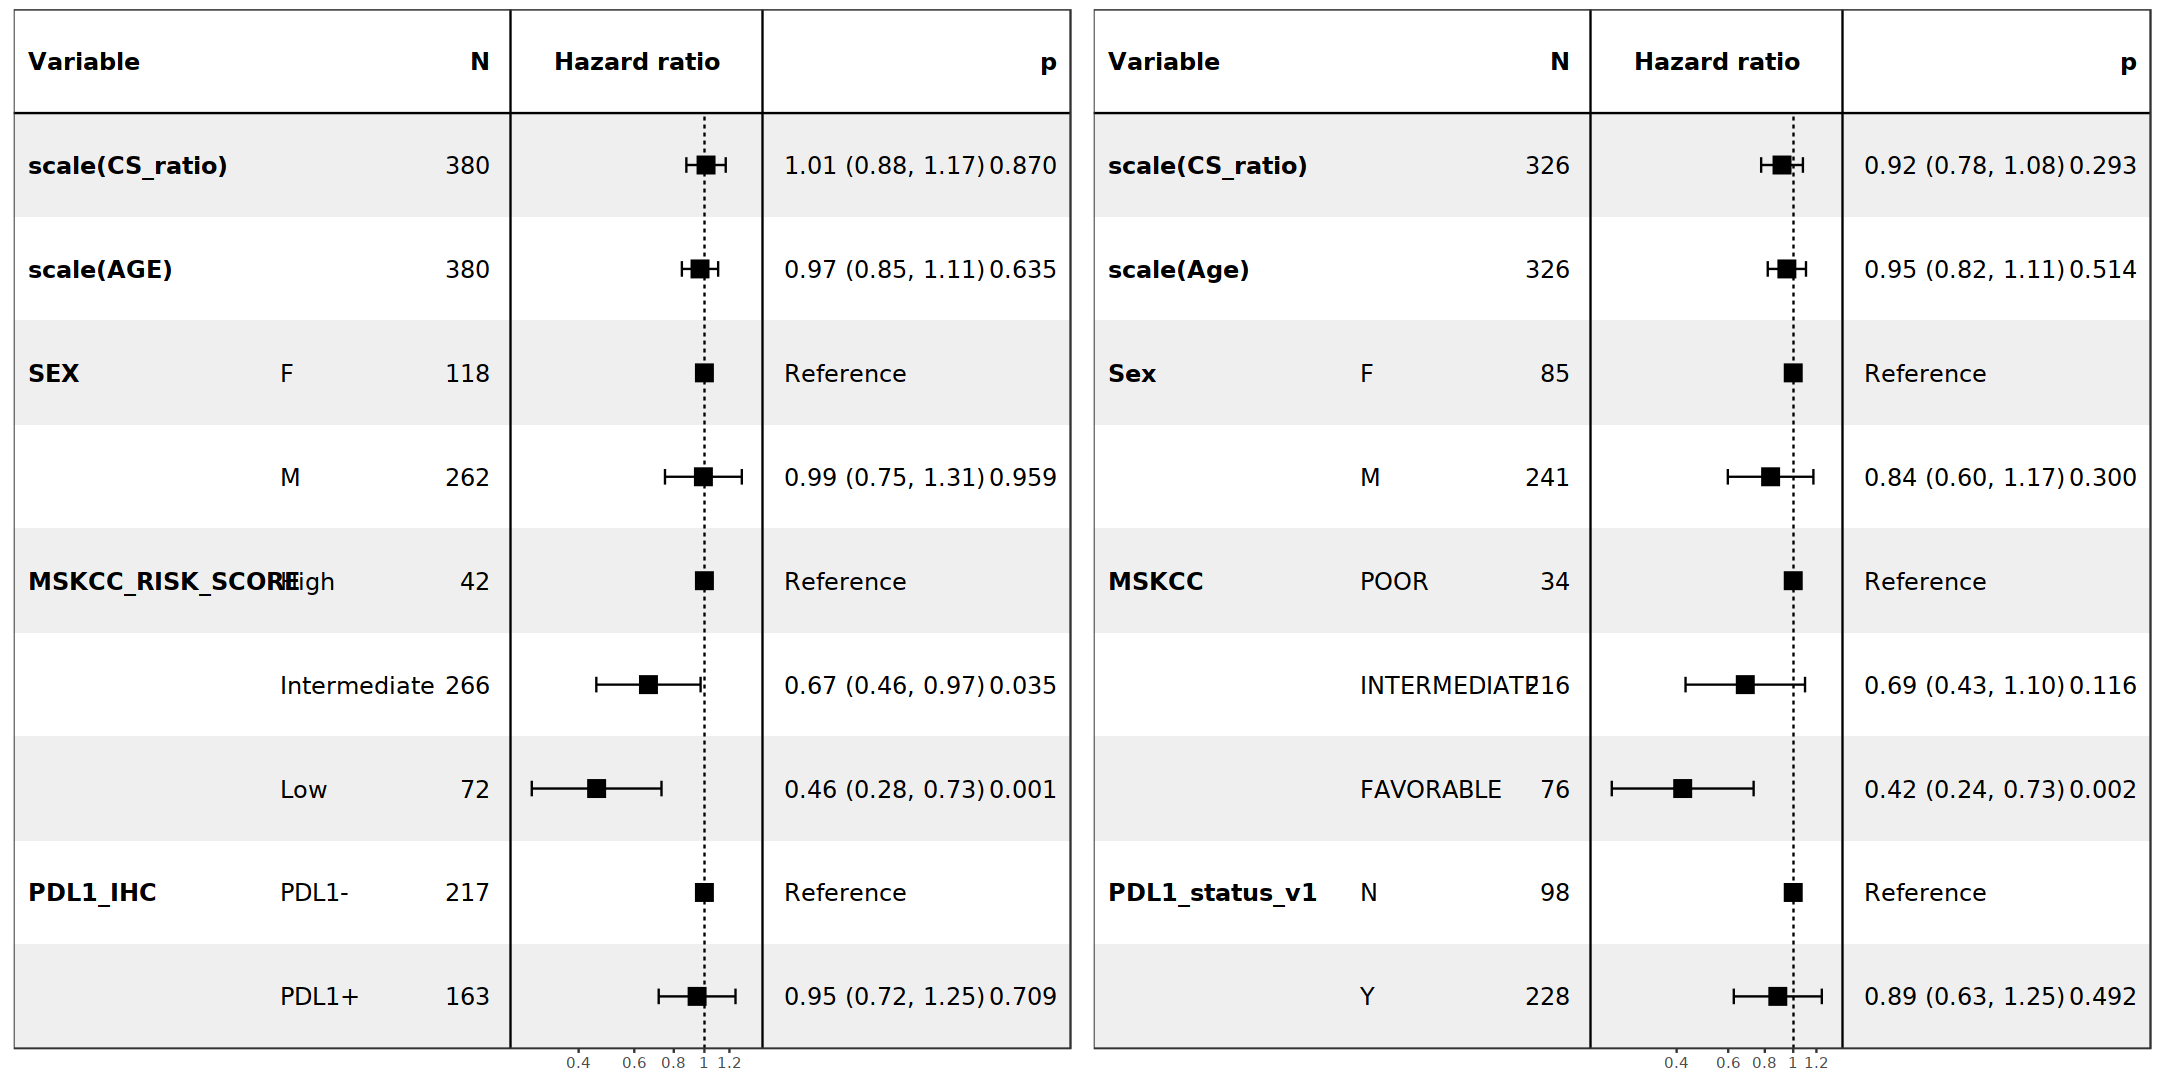

In [22]:
options(repr.plot.width=18, repr.plot.height=9)

ggarrange(imm151_plot_clinvaronly, jav101_plot_clinvaronly)

ggsave("../../Supp_Figures_Final/Figure_S8/Figure_S8C_D_Cox_IMM151_JAV101_ICB_CSRatio_ClinVarOnly.pdf",width = 18, height = 9)

### Supp Figure 8E-F. Cox models for PFS in IO+VEGF arm of JAV101 (hallmark IFNG signature, 6p21 disomy or deletion) <a name="2"></a>

### Set panels for forest_model plots

In [23]:
panels <- list(
  list(width = 0.01),
  list(width = 0.18, display = ~variable, fontface = "bold", heading = "Variable"),
  list(width = 0.1, display = ~level),
  list(width = 0.05, display = ~n, hjust = 1, heading = "N"),
  list(width = 0.03, item = "vline", hjust = 0.5),
  list(
    width = 0.15, item = "forest", hjust = 0.5, heading = "Hazard ratio", linetype = "dashed",
    line_x = 0
  ),
  list(width = 0.03, item = "vline", hjust = 0.5),
  list(width = 0.12, display = ~ ifelse(reference, "Reference", sprintf(
    "%0.2f (%0.2f, %0.2f)",
    trans(estimate), trans(conf.low), trans(conf.high)
  )), display_na = NA),
  list(
    width = 0.075,
    display = ~ ifelse(reference, "", format.pval(p.value, digits = 1,nsmall = 3, eps = 0.001)),
    display_na = NA, hjust = 1, heading = "p"
  ),
  list(width = 0.01)
)

### Read in JAV101 data

In [24]:
clin_jav101_full = readRDS("../../Trial_Cohorts/JAV101/JAV101_Clinical_Metadata_with_SigScores_CIBERSORTx.RDS")

df = data.frame(table(colnames(clin_jav101_full)))
subset(df, Freq > 1)

clin_jav101_full = subset(clin_jav101_full, select = -c(CD8A,Eosinophils,IFIT3, Neutrophils) )

Var1        Freq
14682 CD8A        2   
17979 Eosinophils 2   
21236 IFIT3       2   
27495 Neutrophils 2

In [25]:
cn = scan("../../Trial_Cohorts/JAV101/Javelin_6p21_loss_GISTIC.txt", what = "character")
corner(cn)
length(cn)

[1] "10011001_6203185783_T" "10011004_6204067375_T" "10011006_6204067377_T"
[4] "10011008_6204067223_T" "10011017_6204067222_T"

[1] 141

In [26]:
corner(clin_jav101_full$ID)

[1] "10011001_6203185783" "10011004_6204067375" "10011006_6204067377"
[4] "10011007_6204067220" "10011008_6204067223"

In [27]:
cn = str_replace_all(cn, pattern = "_T","")
corner(cn)
length(cn)

length(intersect(cn, clin_jav101_full$ID))

[1] "10011001_6203185783" "10011004_6204067375" "10011006_6204067377"
[4] "10011008_6204067223" "10011017_6204067222"

[1] 141

[1] 137

In [28]:
clin_jav101_full = mutate(clin_jav101_full, GISTIC_6p21_loss = ifelse(ID %in% cn, "Deletion","Disomy"))
table(clin_jav101_full$GISTIC_6p21_loss)


Deletion   Disomy 
     137      591 

### 6p21 disomy


 CB NCB 
194  75 


Call:
glm(formula = Benefit_Binary_Num ~ scale(HALLMARK_INTERFERON_GAMMA_RESPONSE) + 
    scale(Age) + Sex + MSKCC + PDL1_status_v1, family = "binomial", 
    data = Disomy)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2283  -1.2250   0.6820   0.7986   1.2524  

Coefficients:
                                          Estimate Std. Error z value Pr(>|z|)
(Intercept)                               -0.33095    0.49517  -0.668  0.50390
scale(HALLMARK_INTERFERON_GAMMA_RESPONSE)  0.02333    0.14838   0.157  0.87509
scale(Age)                                 0.26173    0.13962   1.875  0.06085
SexM                                       0.01515    0.32727   0.046  0.96308
MSKCCINTERMEDIATE                          0.85301    0.42776   1.994  0.04614
MSKCCFAVORABLE                             1.62019    0.51990   3.116  0.00183
PDL1_status_v1Y                            0.48912    0.32744   1.494  0.13524
                                            
(Intercept)        

GVIF     Df GVIF^(1/(2*Df))
scale(HALLMARK_INTERFERON_GAMMA_RESPONSE) 1.144082 1  1.069618       
scale(Age)                                1.008348 1  1.004165       
Sex                                       1.034287 1  1.016999       
MSKCC                                     1.043576 2  1.010720       
PDL1_status_v1                            1.176124 1  1.084493

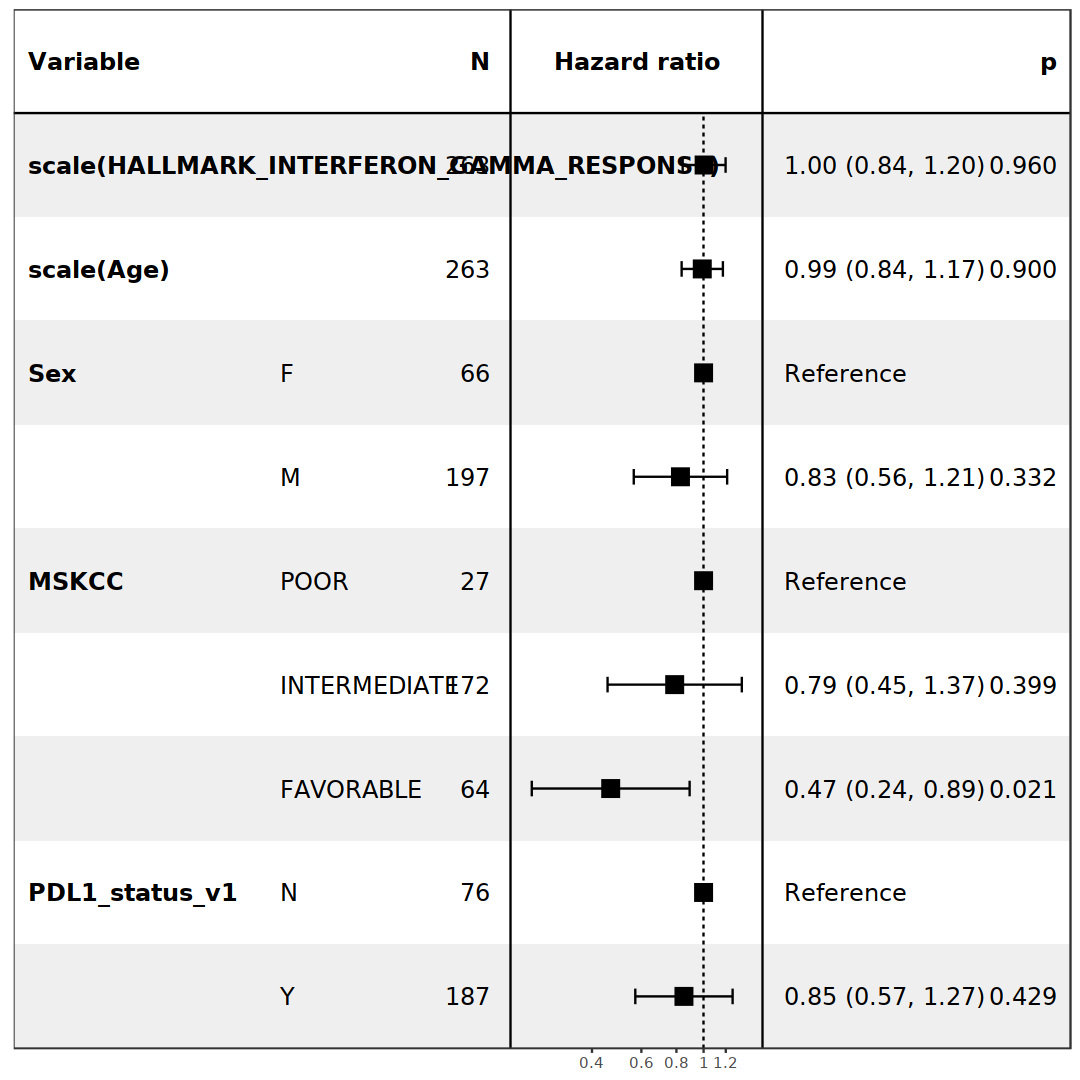

In [29]:
options(repr.plot.width=9, repr.plot.height=9)

Disomy = subset(clin_jav101_full, GISTIC_6p21_loss == "Disomy" & Arm == "Avelumab + Axitinib")

Disomy = subset(Disomy, ORR %in% c("CR","PD","PR","SD"))
Disomy = mutate(Disomy, Benefit = ifelse(ORR == "CR","CB",ifelse(ORR == "PR","CB",ifelse(ORR == "PD","NCB",ifelse(ORR == "SD" & PFS >= 6,"CB","NCB")))))
table(Disomy$Benefit)

Disomy = mutate(Disomy, Benefit_Binary_Num = ifelse(Benefit == "CB",1,0))

mylogit <- glm(Benefit_Binary_Num ~  scale(HALLMARK_INTERFERON_GAMMA_RESPONSE) + scale(Age) + Sex + MSKCC + PDL1_status_v1, family = "binomial", data = Disomy)
summary(mylogit)
vif(mylogit)

res.cox <- coxph(Surv(PFS, PFS_CNSR) ~ scale(HALLMARK_INTERFERON_GAMMA_RESPONSE) + scale(Age) + Sex + MSKCC + PDL1_status_v1, data = Disomy)
Disomy_plot = forest_model(res.cox,panels,recalculate_width = F)
Disomy_plot

### 6p21 deletion


 CB NCB 
 45  21 


Call:
glm(formula = Benefit_Binary_Num ~ scale(HALLMARK_INTERFERON_GAMMA_RESPONSE) + 
    scale(Age) + Sex + MSKCC + PDL1_status_v1, family = "binomial", 
    data = Deletion)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9911  -0.8997   0.4586   0.7344   2.4594  

Coefficients:
                                          Estimate Std. Error z value Pr(>|z|)
(Intercept)                               -2.92230    1.26748  -2.306   0.0211
scale(HALLMARK_INTERFERON_GAMMA_RESPONSE)  0.54912    0.33873   1.621   0.1050
scale(Age)                                -0.05273    0.31593  -0.167   0.8675
SexM                                       0.83670    0.68719   1.218   0.2234
MSKCCINTERMEDIATE                          2.49560    1.05950   2.355   0.0185
MSKCCFAVORABLE                             3.57192    1.36344   2.620   0.0088
PDL1_status_v1Y                            1.26169    0.66470   1.898   0.0577
                                            
(Intercept)      

GVIF     Df GVIF^(1/(2*Df))
scale(HALLMARK_INTERFERON_GAMMA_RESPONSE) 1.164110 1  1.078939       
scale(Age)                                1.106132 1  1.051728       
Sex                                       1.110688 1  1.053892       
MSKCC                                     1.268361 2  1.061233       
PDL1_status_v1                            1.164200 1  1.078981

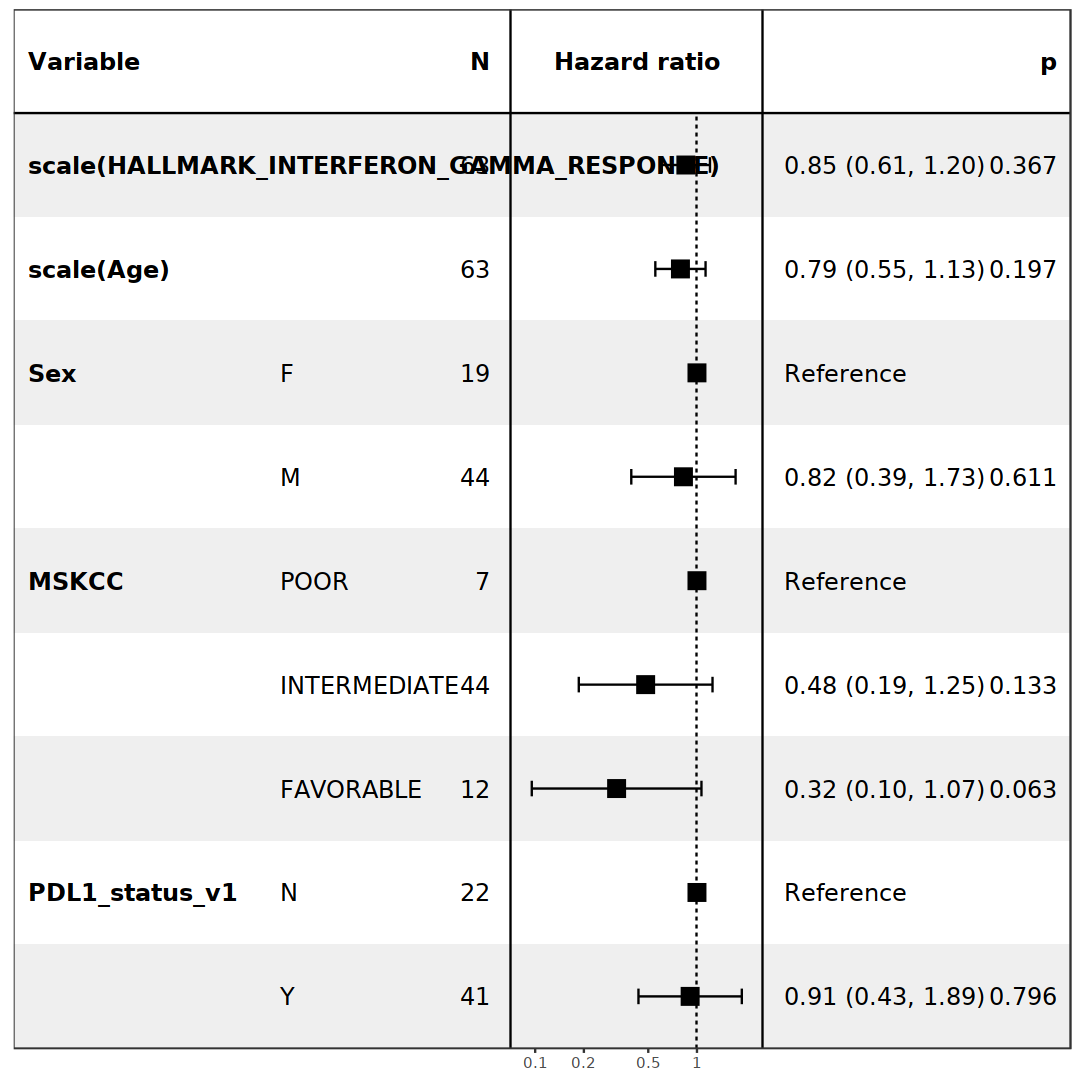

In [30]:
options(repr.plot.width=9, repr.plot.height=9)

Deletion = subset(clin_jav101_full, GISTIC_6p21_loss == "Deletion" & Arm == "Avelumab + Axitinib")

Deletion = subset(Deletion, ORR %in% c("CR","PD","PR","SD"))
Deletion = mutate(Deletion, Benefit = ifelse(ORR == "CR","CB",ifelse(ORR == "PR","CB",ifelse(ORR == "PD","NCB",ifelse(ORR == "SD" & PFS >= 6,"CB","NCB")))))
table(Deletion$Benefit)

Deletion = mutate(Deletion, Benefit_Binary_Num = ifelse(Benefit == "CB",1,0))

mylogit <- glm(Benefit_Binary_Num ~  scale(HALLMARK_INTERFERON_GAMMA_RESPONSE) + scale(Age) + Sex + MSKCC + PDL1_status_v1, family = "binomial", data = Deletion)
summary(mylogit)
vif(mylogit)

res.cox <- coxph(Surv(PFS, PFS_CNSR) ~ scale(HALLMARK_INTERFERON_GAMMA_RESPONSE) + scale(Age) + Sex + MSKCC + PDL1_status_v1, data = Deletion)
Deletion_plot = forest_model(res.cox,panels,recalculate_width = F)
Deletion_plot

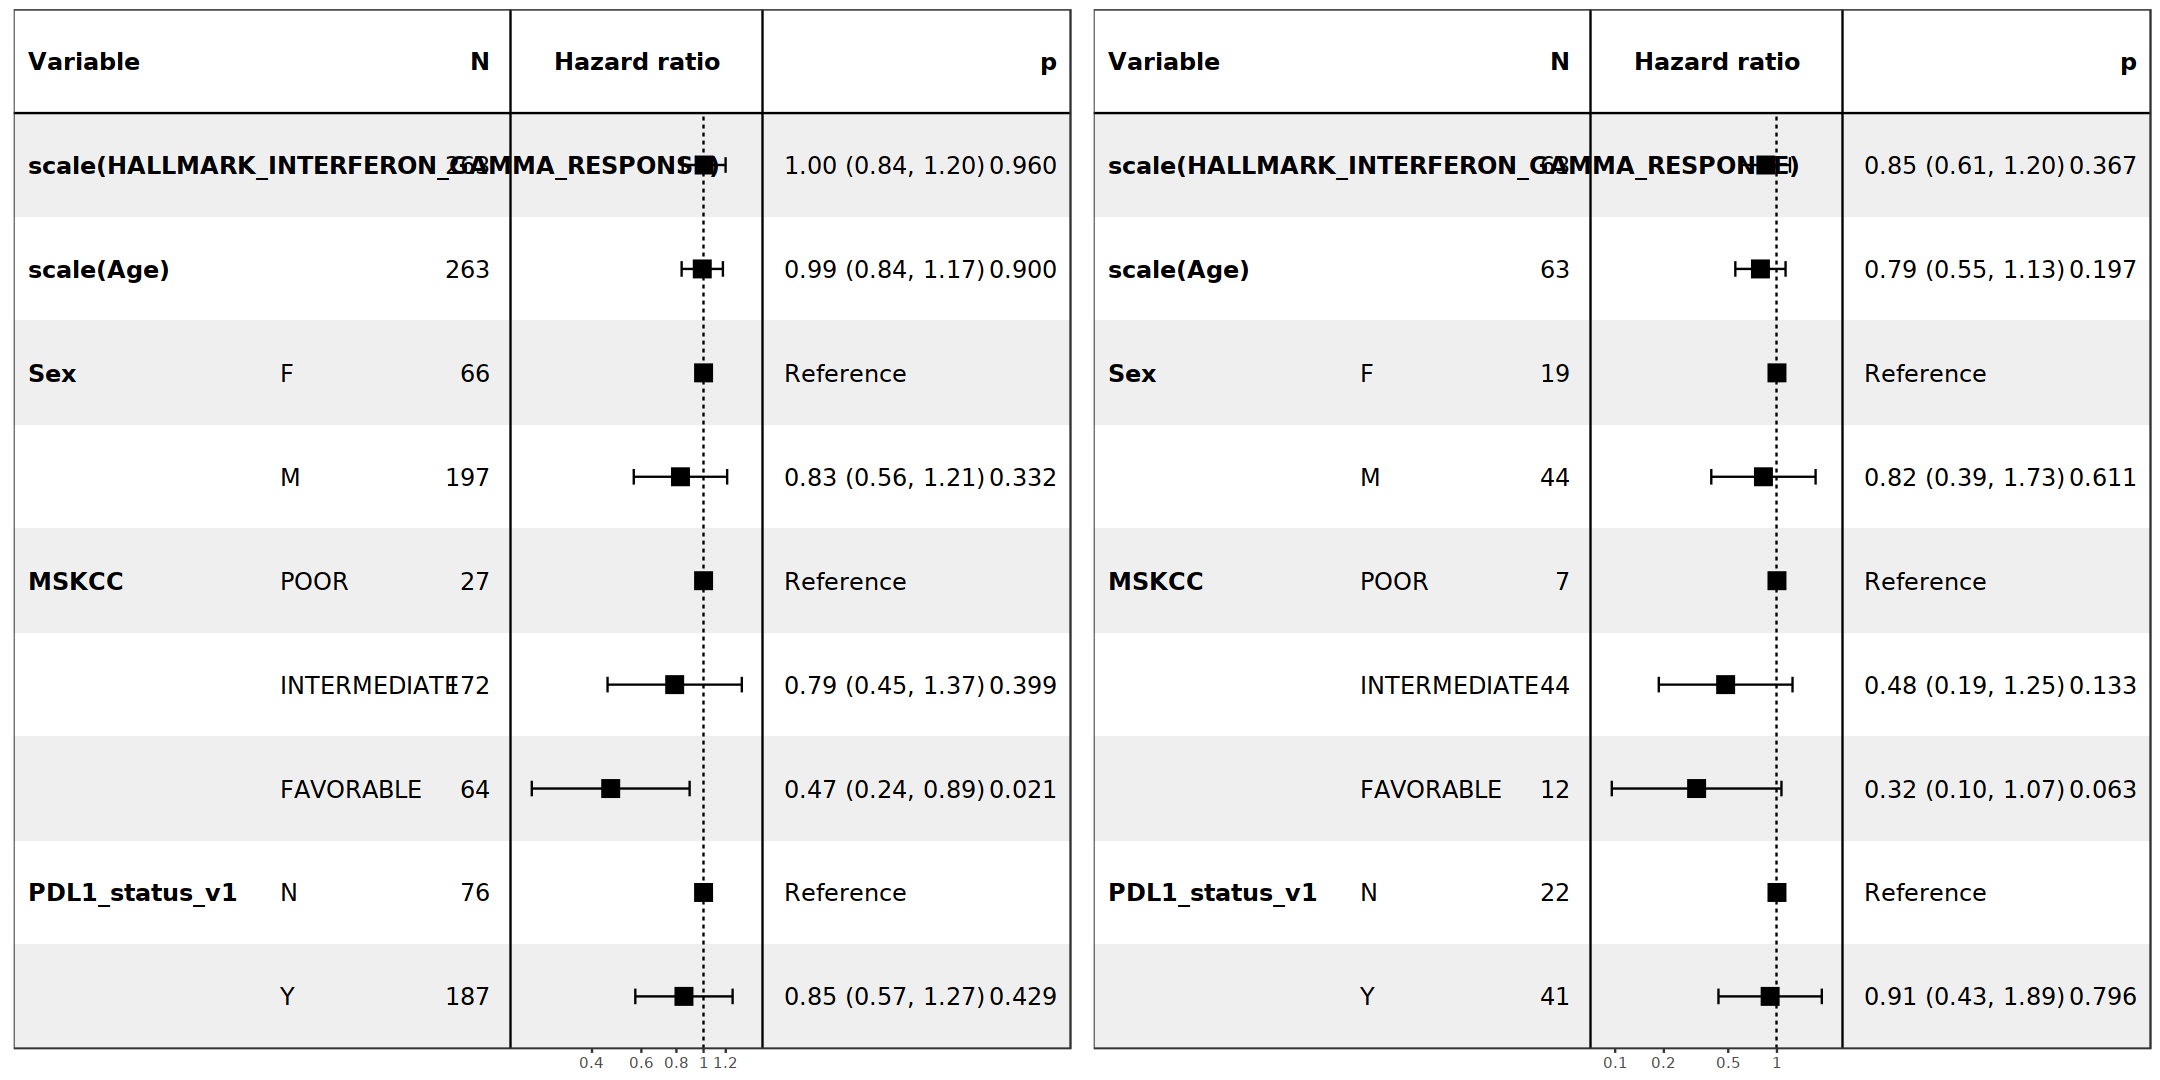

In [31]:
options(repr.plot.width=18, repr.plot.height=9)

ggarrange(Disomy_plot, Deletion_plot)

ggsave("../../Supp_Figures_Final/Figure_S8/FigureS8E_F_Cox_Jav101_HallmarkIFNG_6p21_ICB_Scaled.pdf",width = 18, height = 9)

### Supp Figure 8G-H. Cox models for PFS in IO+VEGF arm of JAV101 (tumor/fibroblast IFNg signature, 6p21 disomy or deletion) <a name="3"></a>

### 6p21 disomy


 CB NCB 
194  75 


Call:
glm(formula = Benefit_Binary_Num ~ scale(manuscript_IFNG_tumor) + 
    scale(Tumor_CS) + scale(Fibroblast_CS) + scale(Age) + Sex + 
    MSKCC + PDL1_status_v1, family = "binomial", data = Disomy)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1093  -1.1454   0.6613   0.8274   1.4044  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)   
(Intercept)                  -0.30830    0.50301  -0.613  0.53994   
scale(manuscript_IFNG_tumor)  0.09354    0.15557   0.601  0.54765   
scale(Tumor_CS)              -0.25367    0.15862  -1.599  0.10976   
scale(Fibroblast_CS)         -0.27259    0.15032  -1.813  0.06977 . 
scale(Age)                    0.23955    0.14006   1.710  0.08721 . 
SexM                         -0.01525    0.33280  -0.046  0.96346   
MSKCCINTERMEDIATE             0.89819    0.43972   2.043  0.04109 * 
MSKCCFAVORABLE                1.65507    0.52897   3.129  0.00176 **
PDL1_status_v1Y               0.45944    0.3250

GVIF     Df GVIF^(1/(2*Df))
scale(manuscript_IFNG_tumor) 1.142471 1  1.068864       
scale(Tumor_CS)              1.263248 1  1.123943       
scale(Fibroblast_CS)         1.258570 1  1.121860       
scale(Age)                   1.011997 1  1.005981       
Sex                          1.037353 1  1.018505       
MSKCC                        1.074497 2  1.018125       
PDL1_status_v1               1.134262 1  1.065017

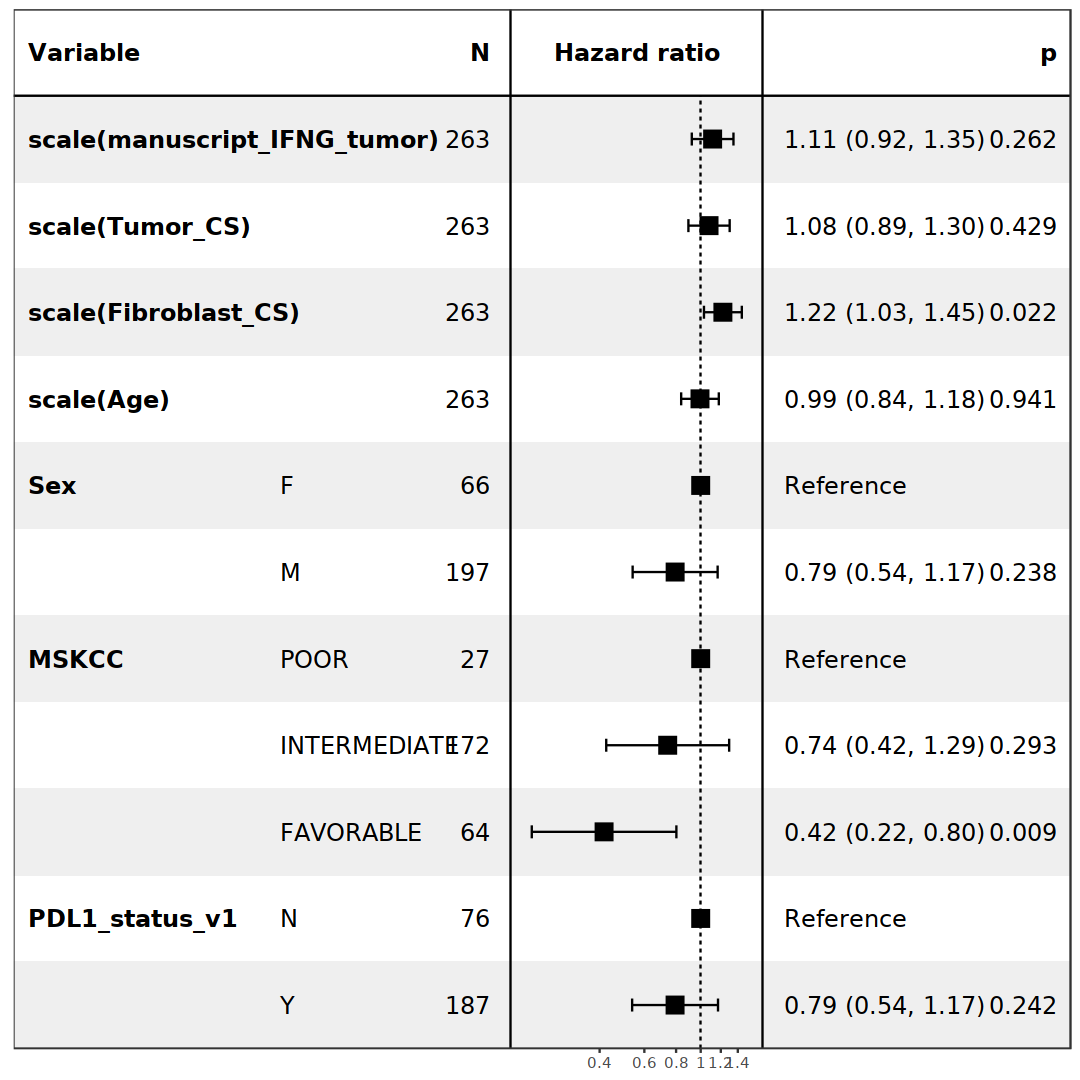

In [32]:
options(repr.plot.width=9, repr.plot.height=9)

Disomy = subset(clin_jav101_full, GISTIC_6p21_loss == "Disomy" & Arm == "Avelumab + Axitinib")

Disomy = subset(Disomy, ORR %in% c("CR","PD","PR","SD"))
Disomy = mutate(Disomy, Benefit = ifelse(ORR == "CR","CB",ifelse(ORR == "PR","CB",ifelse(ORR == "PD","NCB",ifelse(ORR == "SD" & PFS >= 6,"CB","NCB")))))
table(Disomy$Benefit)

Disomy = mutate(Disomy, Benefit_Binary_Num = ifelse(Benefit == "CB",1,0))

mylogit <- glm(Benefit_Binary_Num ~  scale(manuscript_IFNG_tumor) + scale(Tumor_CS) + scale(Fibroblast_CS) + scale(Age) + Sex + MSKCC + PDL1_status_v1, family = "binomial", data = Disomy)
summary(mylogit)
vif(mylogit)

res.cox <- coxph(Surv(PFS, PFS_CNSR) ~ scale(manuscript_IFNG_tumor) + scale(Tumor_CS) + scale(Fibroblast_CS) + scale(Age) + Sex + MSKCC + PDL1_status_v1, data = Disomy)
Disomy_plot = forest_model(res.cox,panels,recalculate_width = F)
Disomy_plot

### 6p21 deletion


 CB NCB 
 45  21 


Call:
glm(formula = Benefit_Binary_Num ~ scale(manuscript_IFNG_tumor) + 
    scale(Tumor_CS) + scale(Fibroblast_CS) + scale(Age) + Sex + 
    MSKCC + PDL1_status_v1, family = "binomial", data = Deletion)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0478  -0.5250   0.3882   0.6361   1.7448  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)   
(Intercept)                   -3.3685     1.3162  -2.559  0.01049 * 
scale(manuscript_IFNG_tumor)  -0.5307     0.3951  -1.343  0.17914   
scale(Tumor_CS)               -0.3823     0.3534  -1.082  0.27930   
scale(Fibroblast_CS)          -1.2628     0.4893  -2.580  0.00987 **
scale(Age)                    -0.4836     0.3868  -1.250  0.21113   
SexM                           0.9974     0.7504   1.329  0.18380   
MSKCCINTERMEDIATE              2.7708     1.0886   2.545  0.01092 * 
MSKCCFAVORABLE                 4.7098     1.6316   2.887  0.00389 **
PDL1_status_v1Y                1.3216     0.7

GVIF     Df GVIF^(1/(2*Df))
scale(manuscript_IFNG_tumor) 1.129847 1  1.062943       
scale(Tumor_CS)              1.109727 1  1.053436       
scale(Fibroblast_CS)         1.283933 1  1.133107       
scale(Age)                   1.331912 1  1.154085       
Sex                          1.103479 1  1.050466       
MSKCC                        1.449921 2  1.097327       
PDL1_status_v1               1.223655 1  1.106189

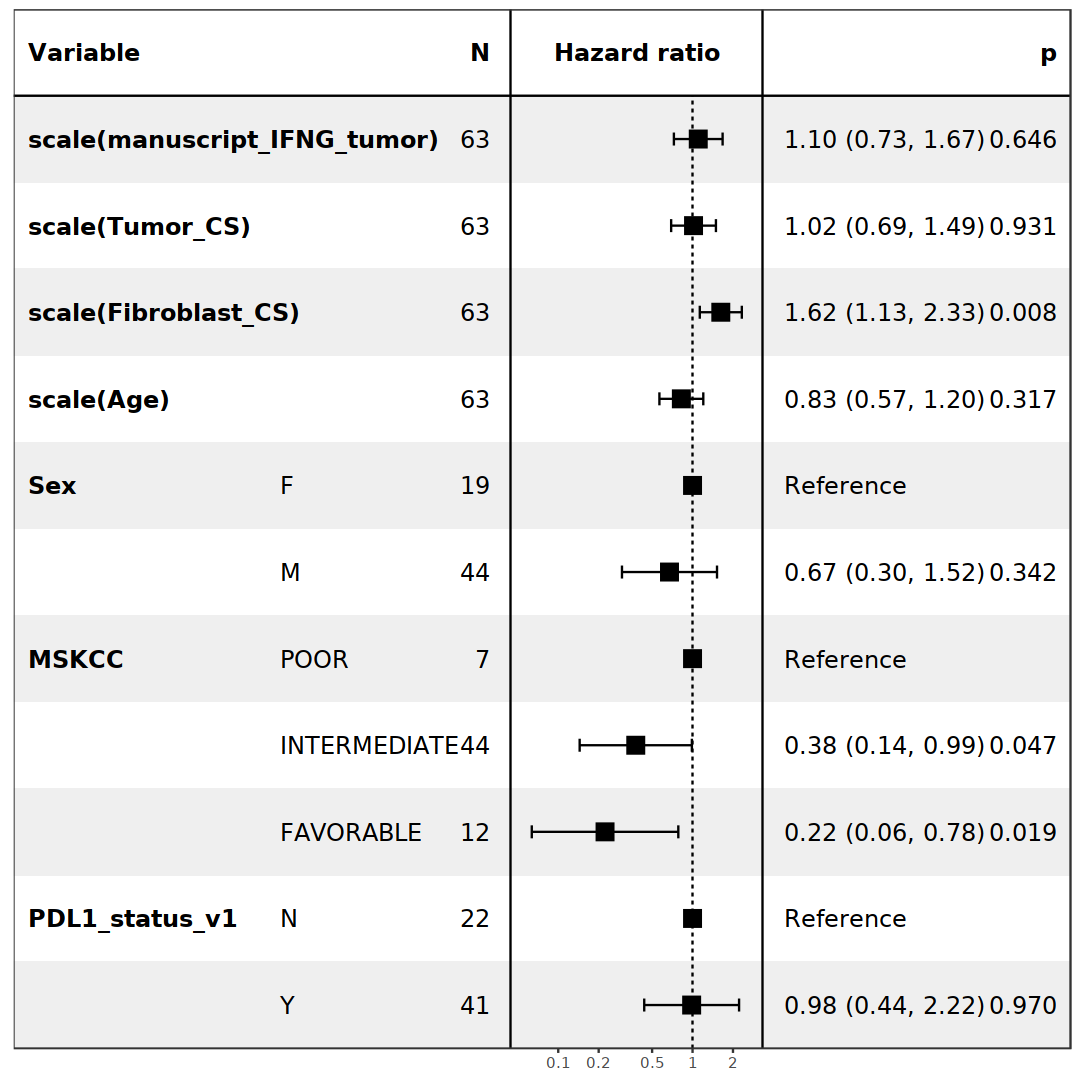

In [33]:
options(repr.plot.width=9, repr.plot.height=9)

Deletion = subset(clin_jav101_full, GISTIC_6p21_loss == "Deletion" & Arm == "Avelumab + Axitinib")

Deletion = subset(Deletion, ORR %in% c("CR","PD","PR","SD"))
Deletion = mutate(Deletion, Benefit = ifelse(ORR == "CR","CB",ifelse(ORR == "PR","CB",ifelse(ORR == "PD","NCB",ifelse(ORR == "SD" & PFS >= 6,"CB","NCB")))))
table(Deletion$Benefit)

Deletion = mutate(Deletion, Benefit_Binary_Num = ifelse(Benefit == "CB",1,0))

mylogit <- glm(Benefit_Binary_Num ~  scale(manuscript_IFNG_tumor) + scale(Tumor_CS) + scale(Fibroblast_CS) + scale(Age) + Sex + MSKCC + PDL1_status_v1, family = "binomial", data = Deletion)
summary(mylogit)
vif(mylogit)

res.cox <- coxph(Surv(PFS, PFS_CNSR) ~ scale(manuscript_IFNG_tumor) + scale(Tumor_CS) + scale(Fibroblast_CS) + scale(Age) + Sex + MSKCC + PDL1_status_v1, data = Deletion)
Deletion_plot = forest_model(res.cox,panels,recalculate_width = F)
Deletion_plot

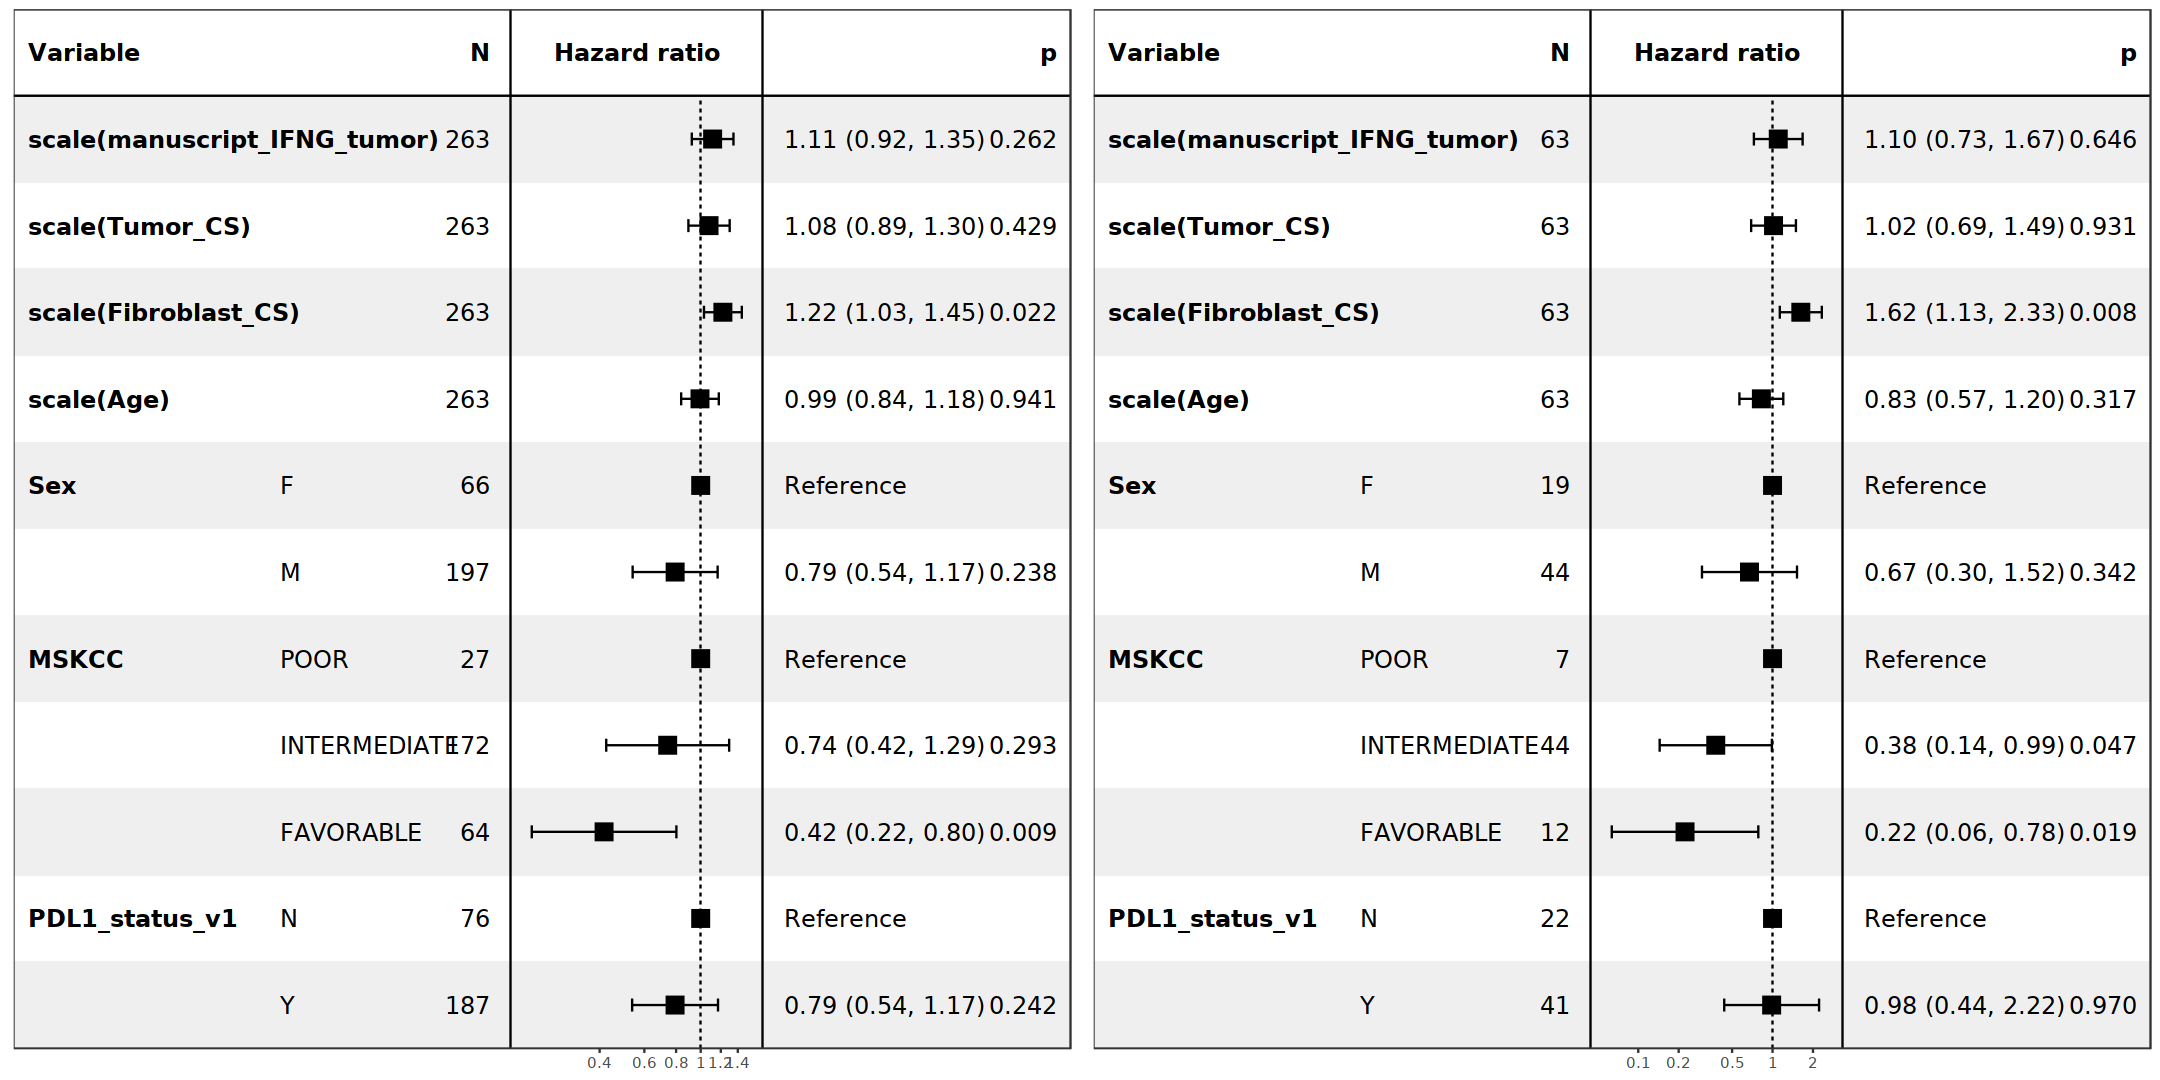

In [34]:
options(repr.plot.width=18, repr.plot.height=9)

ggarrange(Disomy_plot, Deletion_plot)

ggsave("../../Supp_Figures_Final/Figure_S8/FigureS8G_H_Cox_Jav101_TumorFibIFNG_6p21_ICB_Scaled.pdf",width = 18, height = 9)

### Supp Figure 8I-J. Cox models for PFS in IO+VEGF arm of IMM151 and JAV101 (Zemek at al fast on/off signature) <a name="4"></a>

### Score IMM151 for Zemek et al fast on/fast off IFNb signature

In [35]:
zemek = scan("../../Signatures//FastOnOff_Zemek.txt",what = "character", sep = '\t')
zemek

[1] "ADAR"    "APOL6"   "B2M"     "BATF2"   "BST2"    "C1R"     "C1S"    
  [8] "CARD16"  "CASP1"   "CASP7"   "CCL2"    "CCL7"    "CD274"   "CD40"   
 [15] "CDKN1A"  "CFB"     "CXCL10"  "CXCL11"  "CXCL9"   "DDX58"   "DDX60"  
 [22] "DHX58"   "EIF2AK2" "FAS"     "FCGR1B"  "FCGR1A"  "GBP6"    "GBP2"   
 [29] "GCH1"    "GZMA"    "HERC6"   "IDO1"    "IFI35"   "IFI44"   "IFI44L" 
 [36] "IFIH1"   "IFIT2"   "IFIT3"   "IFITM3"  "IFITM2"  "IFITM1"  "IL15"   
 [43] "IRF1"    "IRF7"    "IRF9"    "ISG15"   "ISG20"   "LAP3"    "LY6E"   
 [50] "LYSMD2"  "MOV10"   "MVP"     "MX1"     "MYD88"   "NAMPT"   "NLRC5"  
 [57] "NMI"     "NUB1"    "OAS1"    "OAS2"    "OAS3"    "OASL"    "OGFR"   
 [64] "PARP12"  "PARP14"  "PARP9"   "PFKP"    "PIM1"    "PLA2G4A" "PLSCR1" 
 [71] "PML"     "PNP"     "PSMA2"   "PSMA3"   "PSMB10"  "PSMB2"   "PSMB8"  
 [78] "PSMB9"   "PSME1"   "PSME2"   "RIPK1"   "RIPK2"   "RNF31"   "RSAD2"  
 [85] "RTP4"    "SAMD9L"  "SAMHD1"  "SECTM1"  "SOCS1"   "SOD2"    "SPPL2A" 
 [92] "ST3GAL5" "STAT1"   "STAT2"   "TAP1"    "TAPBP"   "TMEM140" "TRIM5"  
 [99] "TRIM21"  "UBA7"    "UBE2L6"  "UPP1"    "USP18"   "WARS1"   "XAF1"   
[106] "ZBP1"    "ZNFX1"

In [36]:
ISG_sigs$Zemek_2022_FastOnOff = zemek

In [37]:
clin_imm151_full = readRDS("../../Trial_Cohorts/IMM151/IMM151_Clinical_Metadata_with_SigScores_CIBERSORTx.RDS")

df = data.frame(table(colnames(clin_imm151_full)))
subset(df, Freq > 1)

clin_imm151_full = subset(clin_imm151_full, select = -c(IFIT3) )

Var1  Freq
8604 IFIT3 2

In [38]:
imm151_rna = readRDS("../../Trial_Cohorts/IMM151/IMM151_RNASeq_TPM.RDS")
imm151_clin = readRDS("../../Trial_Cohorts/IMM151/IMM151_Clinical_Metadata.RDS")

dim(imm151_rna)
dim(imm151_clin)

[1] 25297   823

[1] 823  92

In [39]:
options(future.globals.maxSize= 50000*1024^2)

imm151_gs = hack_sig(
  imm151_rna,
  signatures = ISG_sigs,
  method = "zscore")

In [40]:
imm151_gs_final = data.frame(imm151_gs[,2:ncol(imm151_gs)])
row.names(imm151_gs_final) = imm151_gs$sample_id

corner(imm151_gs_final)

setequal(row.names(imm151_gs_final),row.names(clin_imm151_full))

manuscript_IFN1_myeloid manuscript_IFN1_t_nk
EA-37ce247b1d -5.0547058              -3.5229063          
EA-c98e425b64  0.2675114               1.9489467          
EA-bb52459cfb  3.6933034               1.4646782          
EA-7e3f099861  0.9905708               1.7376840          
EA-080ae948aa  0.7664715              -0.7538771          
              manuscript_IFN1_tumor manuscript_IFNG_myeloid
EA-37ce247b1d -0.5651403            -5.9945075             
EA-c98e425b64  0.7658367             2.4105922             
EA-bb52459cfb  1.9194814             3.0021903             
EA-7e3f099861  0.6346561             2.5378846             
EA-080ae948aa  0.2212405             0.3692715             
              manuscript_IFNG_t_nk
EA-37ce247b1d -3.6849959          
EA-c98e425b64  2.2322537          
EA-bb52459cfb  2.0395606          
EA-7e3f099861  1.5752130          
EA-080ae948aa -0.3709755

[1] TRUE

In [41]:
clin_imm151_full$Zemek_2022_FastOnOff = imm151_gs_final$Zemek_2022_FastOnOff


 CB NCB 
263 117 


Call:
glm(formula = Benefit_Binary_Num ~ scale(Zemek_2022_FastOnOff) + 
    scale(AGE) + SEX + MSKCC_RISK_SCORE + PDL1_IHC, family = "binomial", 
    data = atezo_bev)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0909  -1.3749   0.7916   0.9050   1.2391  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)   
(Intercept)                   0.30075    0.36679   0.820  0.41223   
scale(Zemek_2022_FastOnOff)   0.01526    0.12034   0.127  0.89912   
scale(AGE)                    0.17882    0.11501   1.555  0.12001   
SEXM                          0.13616    0.24341   0.559  0.57589   
MSKCC_RISK_SCOREIntermediate  0.16829    0.34650   0.486  0.62718   
MSKCC_RISK_SCORELow           1.20261    0.46128   2.607  0.00913 **
PDL1_IHCPDL1+                 0.27259    0.24265   1.123  0.26128   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 469.2

GVIF     Df GVIF^(1/(2*Df))
scale(Zemek_2022_FastOnOff) 1.141175 1  1.068258       
scale(AGE)                  1.053955 1  1.026623       
SEX                         1.013441 1  1.006698       
MSKCC_RISK_SCORE            1.016715 2  1.004153       
PDL1_IHC                    1.110291 1  1.053703

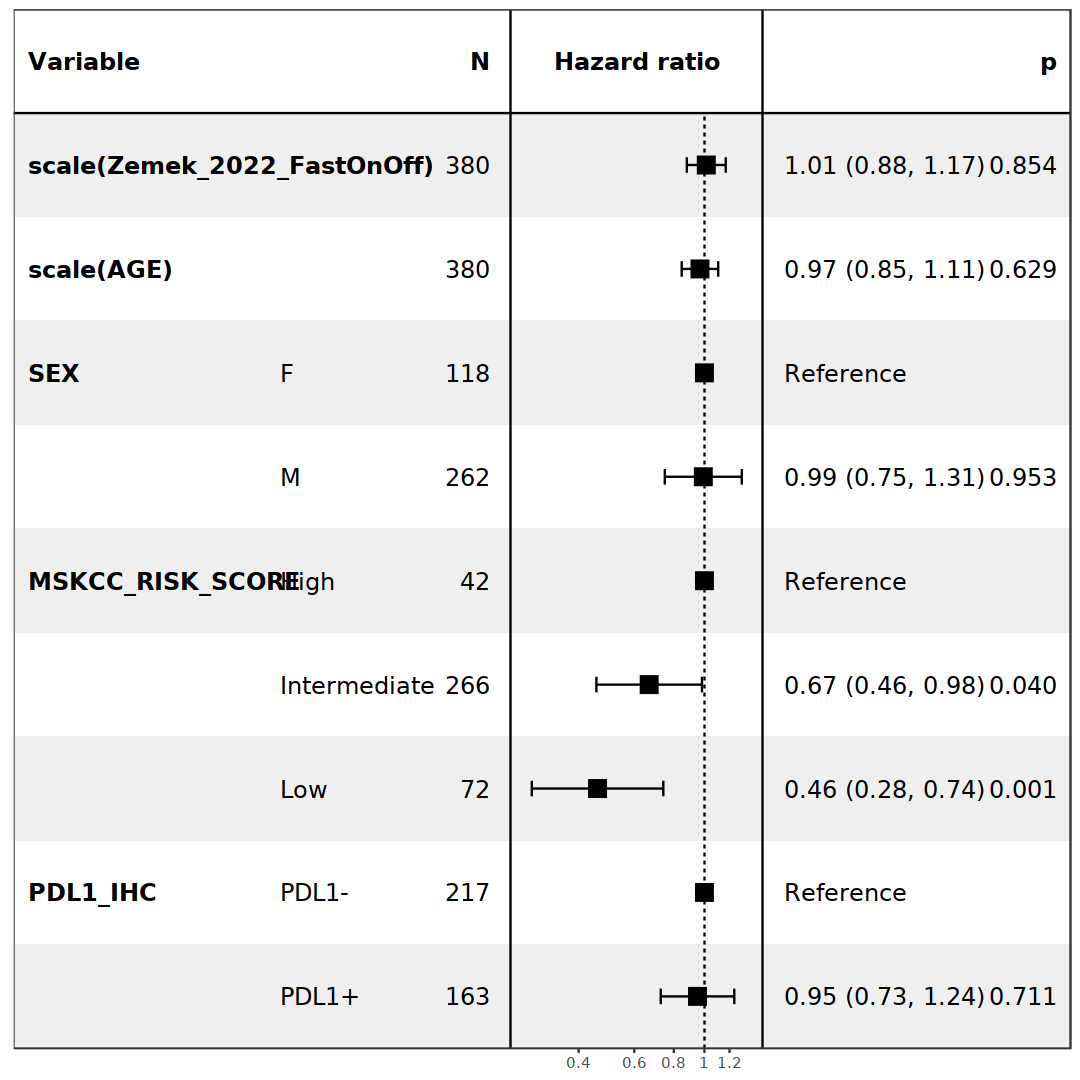

In [42]:
options(repr.plot.width=9, repr.plot.height=9)

clin_imm151_full$PDL1_IHC = relevel(factor(clin_imm151_full$PDL1_IHC), ref = "PDL1-")
atezo_bev = subset(clin_imm151_full, ARM == "atezo_bev")

atezo_bev = subset(atezo_bev, OBJECTIVE_RESPONSE %in% c("CR","PD","PR","SD"))
atezo_bev = mutate(atezo_bev, Benefit = ifelse(OBJECTIVE_RESPONSE == "CR","CB",ifelse(OBJECTIVE_RESPONSE == "PR","CB",ifelse(OBJECTIVE_RESPONSE == "PD","NCB",ifelse(OBJECTIVE_RESPONSE == "SD" & PFS_MONTHS >= 6,"CB","NCB")))))
table(atezo_bev$Benefit)

atezo_bev = mutate(atezo_bev, Benefit_Binary_Num = ifelse(Benefit == "CB",1,0))

mylogit <- glm(Benefit_Binary_Num ~ scale(Zemek_2022_FastOnOff) + scale(AGE) + SEX + MSKCC_RISK_SCORE + PDL1_IHC, family = "binomial", data = atezo_bev)
summary(mylogit)
vif(mylogit)

res.cox <- coxph(Surv(PFS_MONTHS, PFS_CENSOR) ~ scale(Zemek_2022_FastOnOff) + scale(AGE) + SEX + MSKCC_RISK_SCORE + PDL1_IHC, data = atezo_bev)
imm151_cox_plot = forest_model(res.cox, panels,recalculate_width = F)
imm151_cox_plot

### Score JAV101 for Zemek et al fast on/fast off IFNb signature

In [43]:
clin_jav101_full = readRDS("../../Trial_Cohorts/JAV101/JAV101_Clinical_Metadata_with_SigScores_CIBERSORTx.RDS")

df = data.frame(table(colnames(clin_jav101_full)))
subset(df, Freq > 1)

clin_jav101_full = subset(clin_jav101_full, select = -c(CD8A,Eosinophils,IFIT3, Neutrophils) )


Var1        Freq
14682 CD8A        2   
17979 Eosinophils 2   
21236 IFIT3       2   
27495 Neutrophils 2

In [44]:
jav101_rna = readRDS("../../Trial_Cohorts/JAV101/JAV101_RNASeq_TPM_log2.RDS")
jav101_clin = readRDS("../../Trial_Cohorts/JAV101/JAV101_Clinical_Metadata.RDS")

dim(jav101_rna)
dim(jav101_clin)

[1] 40032   728

[1] 728  69

In [45]:
options(future.globals.maxSize= 50000*1024^2)

jav101_gs = hack_sig(
  jav101_rna,
  signatures = ISG_sigs,
  method = "zscore")

In [46]:
jav101_gs_final = data.frame(jav101_gs[,2:ncol(jav101_gs)])
row.names(jav101_gs_final) = jav101_gs$sample_id

corner(jav101_gs_final)

setequal(row.names(jav101_gs_final),row.names(clin_jav101_full))

manuscript_IFN1_myeloid manuscript_IFN1_t_nk
10011001_6203185783 -1.7899386              -1.0827914          
10011004_6204067375 -0.6490106              -3.5230931          
10011006_6204067377 -0.1433420              -0.9528208          
10011007_6204067220  1.4421168               0.3263469          
10011008_6204067223  1.4223967               0.5665004          
                    manuscript_IFN1_tumor manuscript_IFNG_myeloid
10011001_6203185783 -0.17562036           -1.6648195             
10011004_6204067375  0.52433393           -2.1192466             
10011006_6204067377  0.29489663            0.5226403             
10011007_6204067220 -0.04649198            1.9110461             
10011008_6204067223  1.37561854            1.1366075             
                    manuscript_IFNG_t_nk
10011001_6203185783 -0.48011561         
10011004_6204067375 -3.54282924         
10011006_6204067377 -0.27285987         
10011007_6204067220  0.26343838         
10011008_6204067223  0.09528641

[1] TRUE

In [47]:
clin_jav101_full$Zemek_2022_FastOnOff = jav101_gs_final$Zemek_2022_FastOnOff


 CB NCB 
239  96 


Call:
glm(formula = Benefit_Binary_Num ~ scale(Zemek_2022_FastOnOff) + 
    scale(Age) + Sex + MSKCC + PDL1_status_v1, family = "binomial", 
    data = avel_axit)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2468  -1.1734   0.6782   0.8045   1.5469  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -0.69390    0.44422  -1.562 0.118273    
scale(Zemek_2022_FastOnOff)  0.05274    0.13299   0.397 0.691661    
scale(Age)                   0.21502    0.12567   1.711 0.087074 .  
SexM                         0.16201    0.28654   0.565 0.571802    
MSKCCINTERMEDIATE            1.00854    0.38197   2.640 0.008283 ** 
MSKCCFAVORABLE               1.80574    0.46906   3.850 0.000118 ***
PDL1_status_v1Y              0.61347    0.28478   2.154 0.031227 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 395.19  on

GVIF     Df GVIF^(1/(2*Df))
scale(Zemek_2022_FastOnOff) 1.130487 1  1.063244       
scale(Age)                  1.010811 1  1.005391       
Sex                         1.024611 1  1.012231       
MSKCC                       1.034940 2  1.008623       
PDL1_status_v1              1.145570 1  1.070313

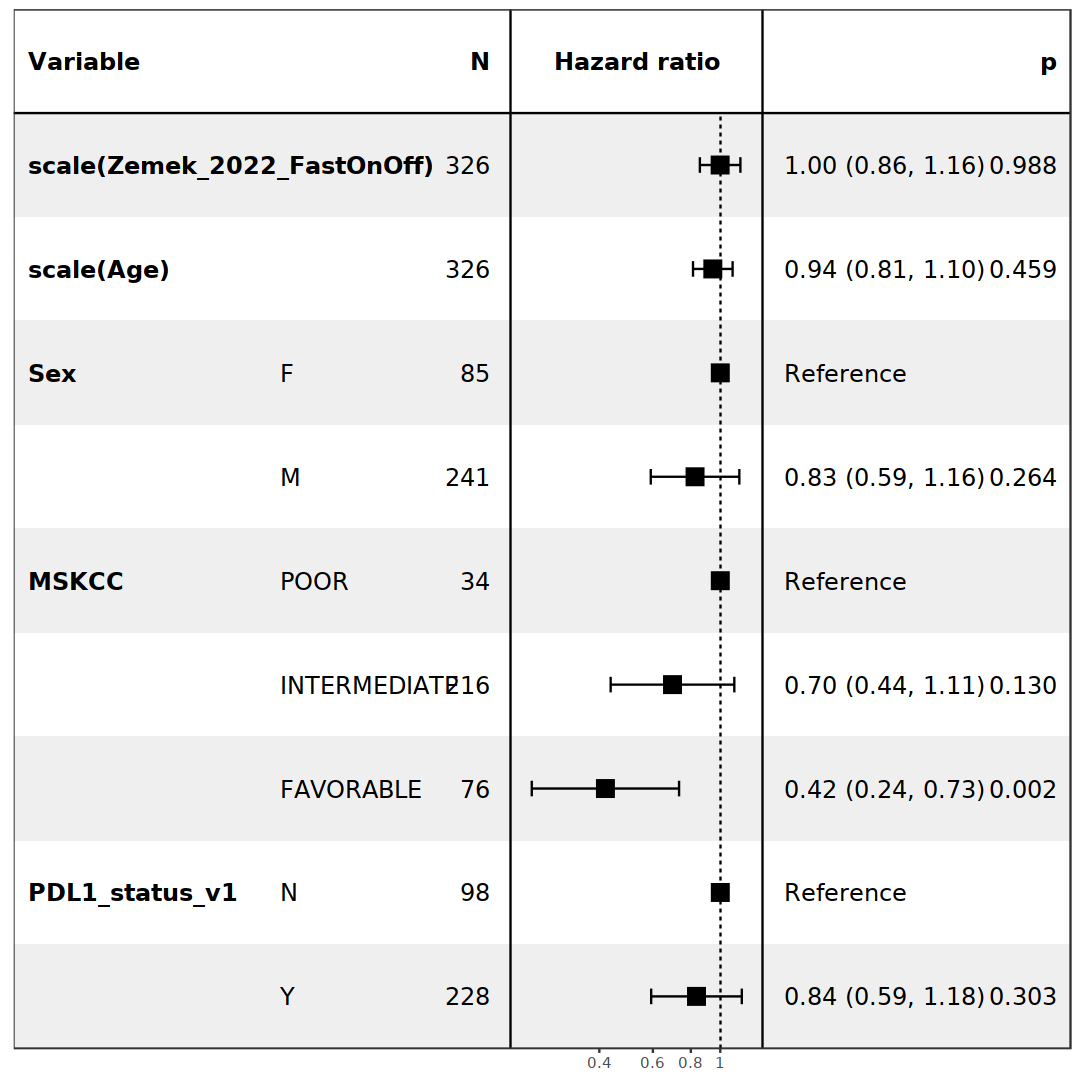

In [48]:
options(repr.plot.width=9, repr.plot.height=9)

avel_axit = subset(clin_jav101_full, Arm == "Avelumab + Axitinib")

avel_axit = subset(avel_axit, ORR %in% c("CR","PD","PR","SD"))
avel_axit = mutate(avel_axit, Benefit = ifelse(ORR == "CR","CB",ifelse(ORR == "PR","CB",ifelse(ORR == "PD","NCB",ifelse(ORR == "SD" & PFS >= 6,"CB","NCB")))))
table(avel_axit$Benefit)

avel_axit = mutate(avel_axit, Benefit_Binary_Num = ifelse(Benefit == "CB",1,0))

mylogit <- glm(Benefit_Binary_Num ~  scale(Zemek_2022_FastOnOff) + scale(Age) + Sex + MSKCC + PDL1_status_v1, family = "binomial", data = avel_axit)
summary(mylogit)
vif(mylogit)

res.cox <- coxph(Surv(PFS, PFS_CNSR) ~ scale(Zemek_2022_FastOnOff) + scale(Age) + Sex + MSKCC + PDL1_status_v1, data = avel_axit)
jav101_cox_plot = forest_model(res.cox,panels,recalculate_width = F)
jav101_cox_plot

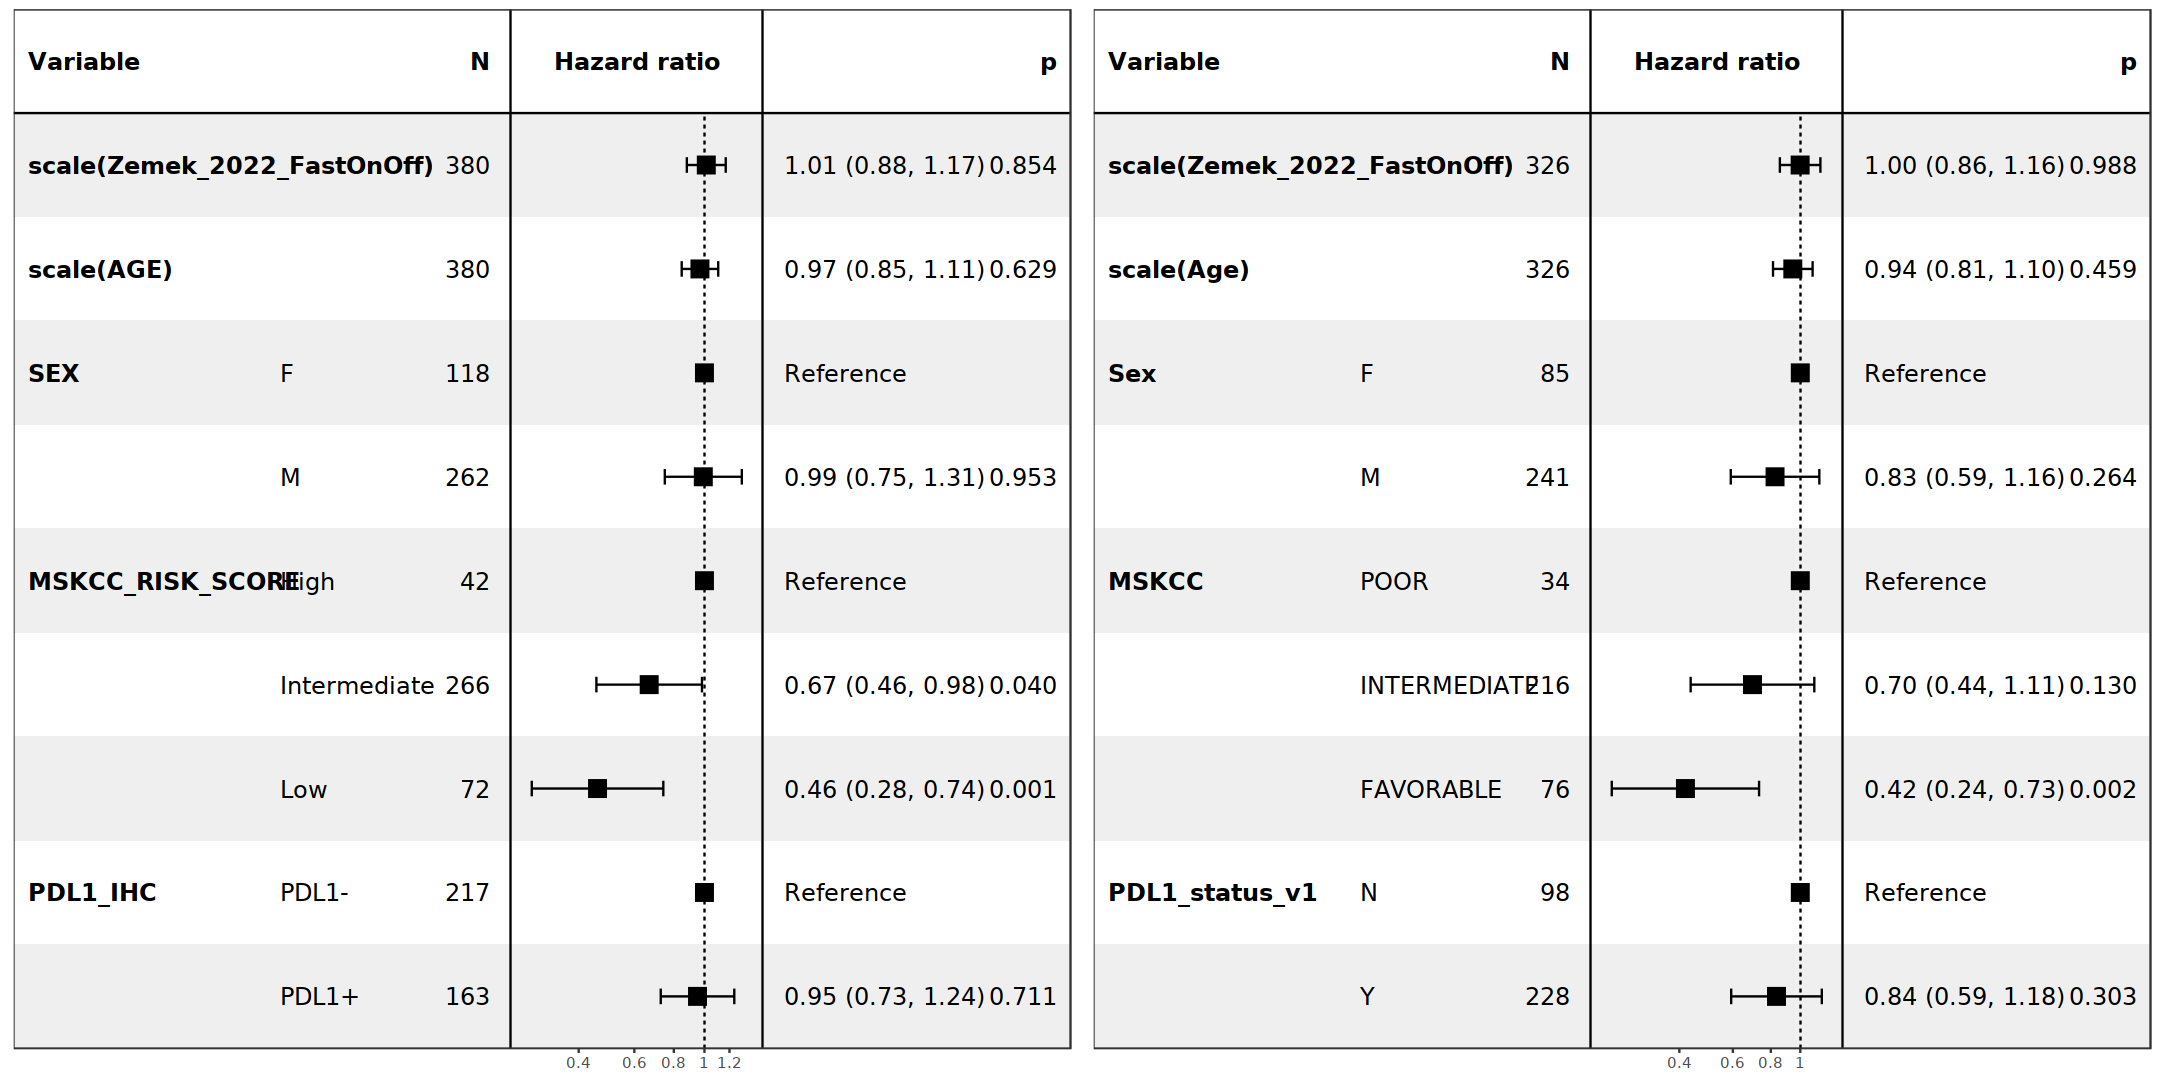

In [49]:
options(repr.plot.width=18, repr.plot.height=9)

ggarrange(imm151_cox_plot, jav101_cox_plot)

ggsave("../../Supp_Figures_Final/Figure_S8/FigureS8I_J_Cox_Imm151_Jav101_Zemek_ICB_Scaled.pdf",width = 18, height = 9)

### Supp Figure 8K-L. Logistic regression models for CB vs NCB in IO+VEGF arm of IMM151 and JAV101 (Zemek at al fast on/off signature) <a name="5"></a>

In [51]:
panels <- list(
  list(width = 0.01),
  list(width = 0.18, display = ~variable, fontface = "bold", heading = "Variable"),
  list(width = 0.1, display = ~level),
  list(width = 0.05, display = ~n, hjust = 1, heading = "N"),
  list(width = 0.03, item = "vline", hjust = 0.5),
  list(
    width = 0.15, item = "forest", hjust = 0.5, heading = "Odds ratio", linetype = "dashed",
    line_x = 0
  ),
  list(width = 0.03, item = "vline", hjust = 0.5),
  list(width = 0.12, display = ~ ifelse(reference, "Reference", sprintf(
    "%0.2f (%0.2f, %0.2f)",
    trans(estimate), trans(conf.low), trans(conf.high)
  )), display_na = NA),
  list(
    width = 0.075,
    display = ~ ifelse(reference, "", format.pval(p.value, digits = 1,nsmall = 3, eps = 0.001)),
    display_na = NA, hjust = 1, heading = "p"
  ),
  list(width = 0.01)
)


 CB NCB 
263 117 


Call:
glm(formula = Benefit_Binary_Num ~ scale(Zemek_2022_FastOnOff) + 
    scale(AGE) + SEX + MSKCC_RISK_SCORE + PDL1_IHC, family = "binomial", 
    data = atezo_bev)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0909  -1.3749   0.7916   0.9050   1.2391  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)   
(Intercept)                   0.30075    0.36679   0.820  0.41223   
scale(Zemek_2022_FastOnOff)   0.01526    0.12034   0.127  0.89912   
scale(AGE)                    0.17882    0.11501   1.555  0.12001   
SEXM                          0.13616    0.24341   0.559  0.57589   
MSKCC_RISK_SCOREIntermediate  0.16829    0.34650   0.486  0.62718   
MSKCC_RISK_SCORELow           1.20261    0.46128   2.607  0.00913 **
PDL1_IHCPDL1+                 0.27259    0.24265   1.123  0.26128   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 469.2

GVIF     Df GVIF^(1/(2*Df))
scale(Zemek_2022_FastOnOff) 1.141175 1  1.068258       
scale(AGE)                  1.053955 1  1.026623       
SEX                         1.013441 1  1.006698       
MSKCC_RISK_SCORE            1.016715 2  1.004153       
PDL1_IHC                    1.110291 1  1.053703

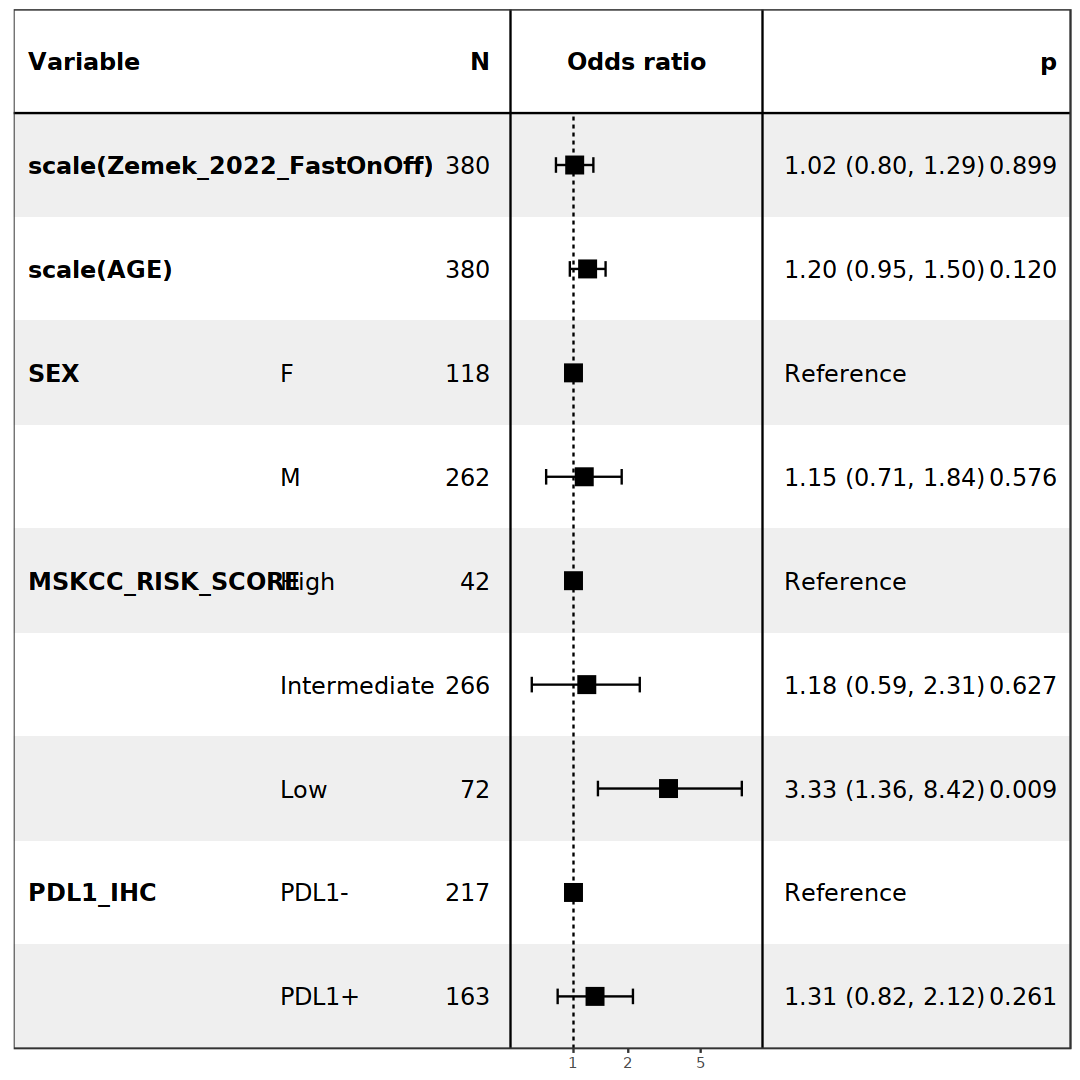

In [52]:
options(repr.plot.width=9, repr.plot.height=9)

clin_imm151_full$PDL1_IHC = relevel(factor(clin_imm151_full$PDL1_IHC), ref = "PDL1-")
atezo_bev = subset(clin_imm151_full, ARM == "atezo_bev")

atezo_bev = subset(atezo_bev, OBJECTIVE_RESPONSE %in% c("CR","PD","PR","SD"))
atezo_bev = mutate(atezo_bev, Benefit = ifelse(OBJECTIVE_RESPONSE == "CR","CB",ifelse(OBJECTIVE_RESPONSE == "PR","CB",ifelse(OBJECTIVE_RESPONSE == "PD","NCB",ifelse(OBJECTIVE_RESPONSE == "SD" & PFS_MONTHS >= 6,"CB","NCB")))))
table(atezo_bev$Benefit)

atezo_bev = mutate(atezo_bev, Benefit_Binary_Num = ifelse(Benefit == "CB",1,0))

mylogit <- glm(Benefit_Binary_Num ~ scale(Zemek_2022_FastOnOff) + scale(AGE) + SEX + MSKCC_RISK_SCORE + PDL1_IHC, family = "binomial", data = atezo_bev)
summary(mylogit)
vif(mylogit)

imm151_lr_plot = forest_model(mylogit, panels,recalculate_width = F)
imm151_lr_plot


 CB NCB 
239  96 


Call:
glm(formula = Benefit_Binary_Num ~ scale(Zemek_2022_FastOnOff) + 
    scale(Age) + Sex + MSKCC + PDL1_status_v1, family = "binomial", 
    data = avel_axit)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2468  -1.1734   0.6782   0.8045   1.5469  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -0.69390    0.44422  -1.562 0.118273    
scale(Zemek_2022_FastOnOff)  0.05274    0.13299   0.397 0.691661    
scale(Age)                   0.21502    0.12567   1.711 0.087074 .  
SexM                         0.16201    0.28654   0.565 0.571802    
MSKCCINTERMEDIATE            1.00854    0.38197   2.640 0.008283 ** 
MSKCCFAVORABLE               1.80574    0.46906   3.850 0.000118 ***
PDL1_status_v1Y              0.61347    0.28478   2.154 0.031227 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 395.19  on

GVIF     Df GVIF^(1/(2*Df))
scale(Zemek_2022_FastOnOff) 1.130487 1  1.063244       
scale(Age)                  1.010811 1  1.005391       
Sex                         1.024611 1  1.012231       
MSKCC                       1.034940 2  1.008623       
PDL1_status_v1              1.145570 1  1.070313

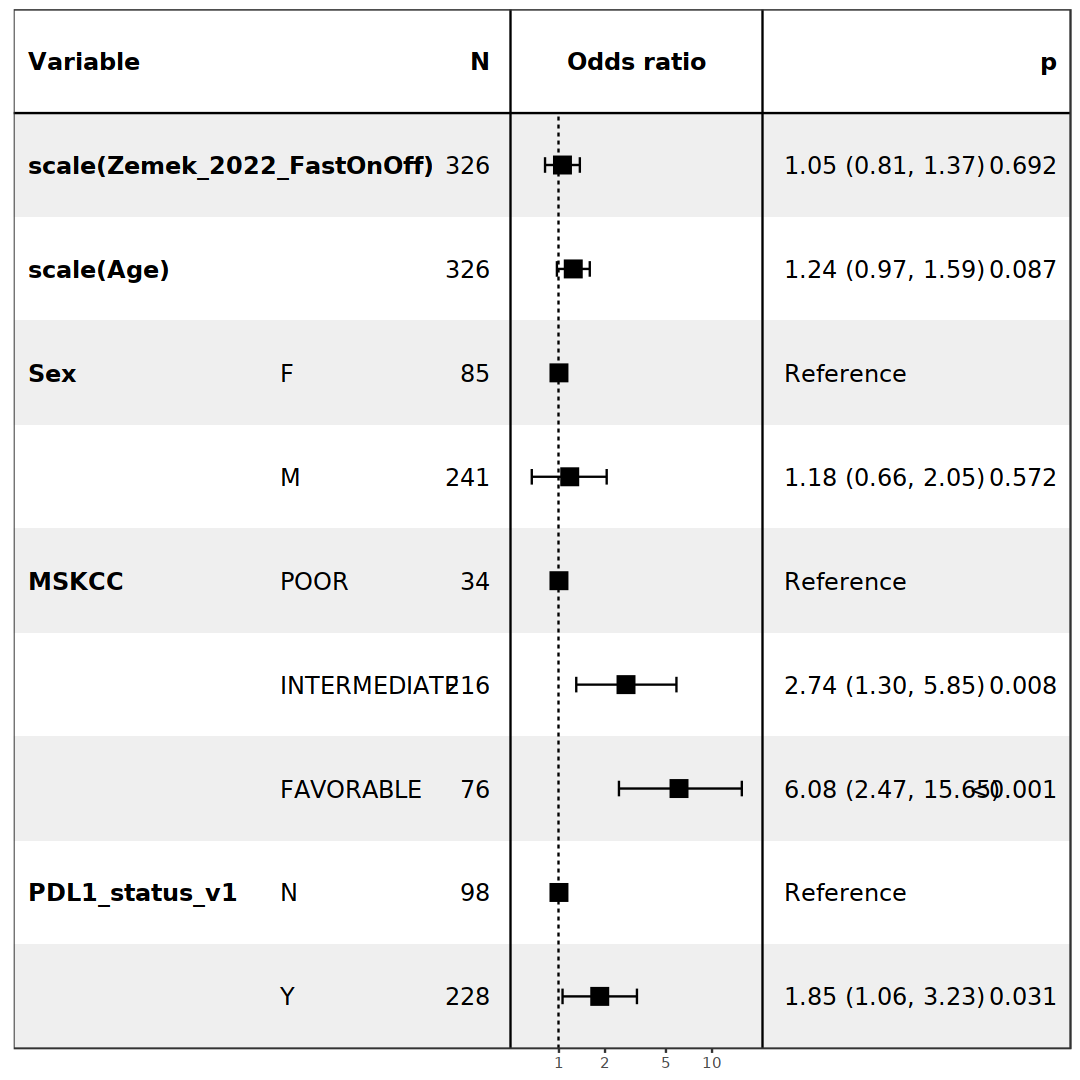

In [53]:
options(repr.plot.width=9, repr.plot.height=9)

avel_axit = subset(clin_jav101_full, Arm == "Avelumab + Axitinib")

avel_axit = subset(avel_axit, ORR %in% c("CR","PD","PR","SD"))
avel_axit = mutate(avel_axit, Benefit = ifelse(ORR == "CR","CB",ifelse(ORR == "PR","CB",ifelse(ORR == "PD","NCB",ifelse(ORR == "SD" & PFS >= 6,"CB","NCB")))))
table(avel_axit$Benefit)

avel_axit = mutate(avel_axit, Benefit_Binary_Num = ifelse(Benefit == "CB",1,0))

mylogit <- glm(Benefit_Binary_Num ~  scale(Zemek_2022_FastOnOff) + scale(Age) + Sex + MSKCC + PDL1_status_v1, family = "binomial", data = avel_axit)
summary(mylogit)
vif(mylogit)

jav101_lr_plot = forest_model(mylogit,panels,recalculate_width = F)
jav101_lr_plot

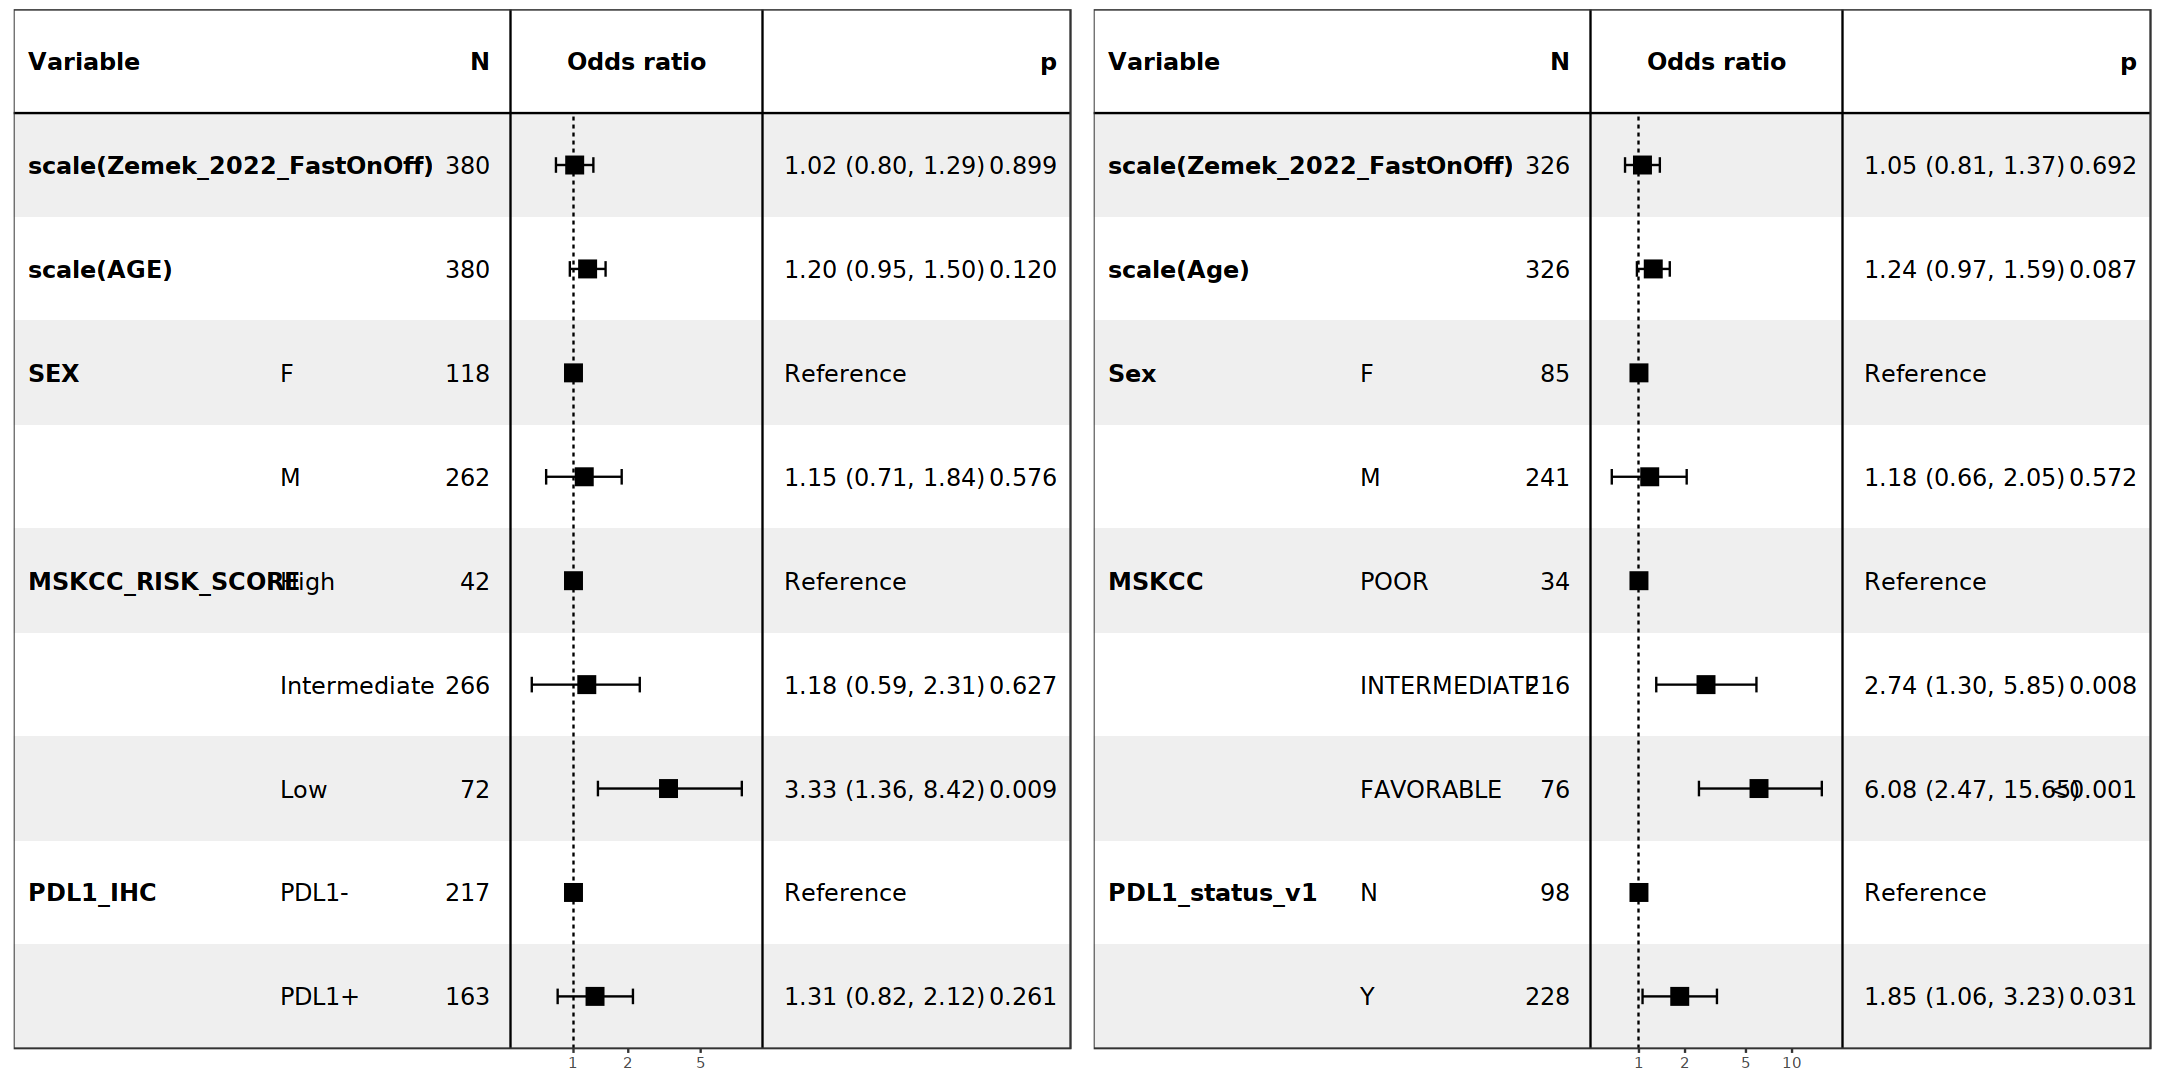

In [54]:
options(repr.plot.width=18, repr.plot.height=9)

ggarrange(imm151_lr_plot, jav101_lr_plot)

ggsave("../../Supp_Figures_Final/Figure_S8/FigureS8K_L_lr_Imm151_Jav101_Zemek_ICB_Scaled.pdf",width = 18, height = 9)

### Supp Figure 8M-N. Cox models for PFS in IO+VEGF arm of IMM151 and JAV101 (IFN1 signatures) <a name="6"></a>

### Set panels for forest_model plots

In [55]:
panels <- list(
  list(width = 0.01),
  list(width = 0.18, display = ~variable, fontface = "bold", heading = "Variable"),
  list(width = 0.1, display = ~level),
  list(width = 0.05, display = ~n, hjust = 1, heading = "N"),
  list(width = 0.03, item = "vline", hjust = 0.5),
  list(
    width = 0.15, item = "forest", hjust = 0.5, heading = "Hazard ratio", linetype = "dashed",
    line_x = 0
  ),
  list(width = 0.03, item = "vline", hjust = 0.5),
  list(width = 0.12, display = ~ ifelse(reference, "Reference", sprintf(
    "%0.2f (%0.2f, %0.2f)",
    trans(estimate), trans(conf.low), trans(conf.high)
  )), display_na = NA),
  list(
    width = 0.075,
    display = ~ ifelse(reference, "", format.pval(p.value, digits = 1,nsmall = 3, eps = 0.001)),
    display_na = NA, hjust = 1, heading = "p"
  ),
  list(width = 0.01)
)

### IMM151

In [56]:
clin_imm151_full = readRDS("../../Trial_Cohorts/IMM151/IMM151_Clinical_Metadata_with_SigScores_CIBERSORTx.RDS")

df = data.frame(table(colnames(clin_imm151_full)))
subset(df, Freq > 1)

clin_imm151_full = subset(clin_imm151_full, select = -c(IFIT3) )

Var1  Freq
8604 IFIT3 2


 CB NCB 
263 117 


Call:
glm(formula = Benefit_Binary_Num ~ scale(manuscript_IFN1_myeloid) + 
    scale(TAM_CS) + scale(Monocyte_CS) + scale(DC_CS) + scale(Krishna_CD8A_Tissue_resident) + 
    scale(CD8_CS) + scale(manuscript_IFN1_tumor) + scale(Tumor_CS) + 
    scale(Fibroblast_CS) + scale(AGE) + SEX + MSKCC_RISK_SCORE + 
    PDL1_IHC, family = "binomial", data = atezo_bev)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2377  -1.1356   0.6577   0.8518   1.5517  

Coefficients:
                                    Estimate Std. Error z value Pr(>|z|)   
(Intercept)                          0.77308    0.40519   1.908  0.05640 . 
scale(manuscript_IFN1_myeloid)      -0.79802    0.26137  -3.053  0.00226 **
scale(TAM_CS)                       -0.07526    0.17300  -0.435  0.66354   
scale(Monocyte_CS)                   0.10325    0.15725   0.657  0.51144   
scale(DC_CS)                         0.02569    0.15245   0.169  0.86616   
scale(Krishna_CD8A_Tissue_resident)  0.72277    0.30077

GVIF     Df GVIF^(1/(2*Df))
scale(manuscript_IFN1_myeloid)      4.996851 1  2.235364       
scale(TAM_CS)                       2.246607 1  1.498868       
scale(Monocyte_CS)                  1.843180 1  1.357638       
scale(DC_CS)                        1.300169 1  1.140249       
scale(Krishna_CD8A_Tissue_resident) 6.739584 1  2.596071       
scale(CD8_CS)                       2.543126 1  1.594718       
scale(manuscript_IFN1_tumor)        2.023256 1  1.422412       
scale(Tumor_CS)                     4.279080 1  2.068594       
scale(Fibroblast_CS)                1.725728 1  1.313669       
scale(AGE)                          1.165738 1  1.079694       
SEX                                 1.081954 1  1.040170       
MSKCC_RISK_SCORE                    1.126817 2  1.030299       
PDL1_IHC                            1.300350 1  1.140329

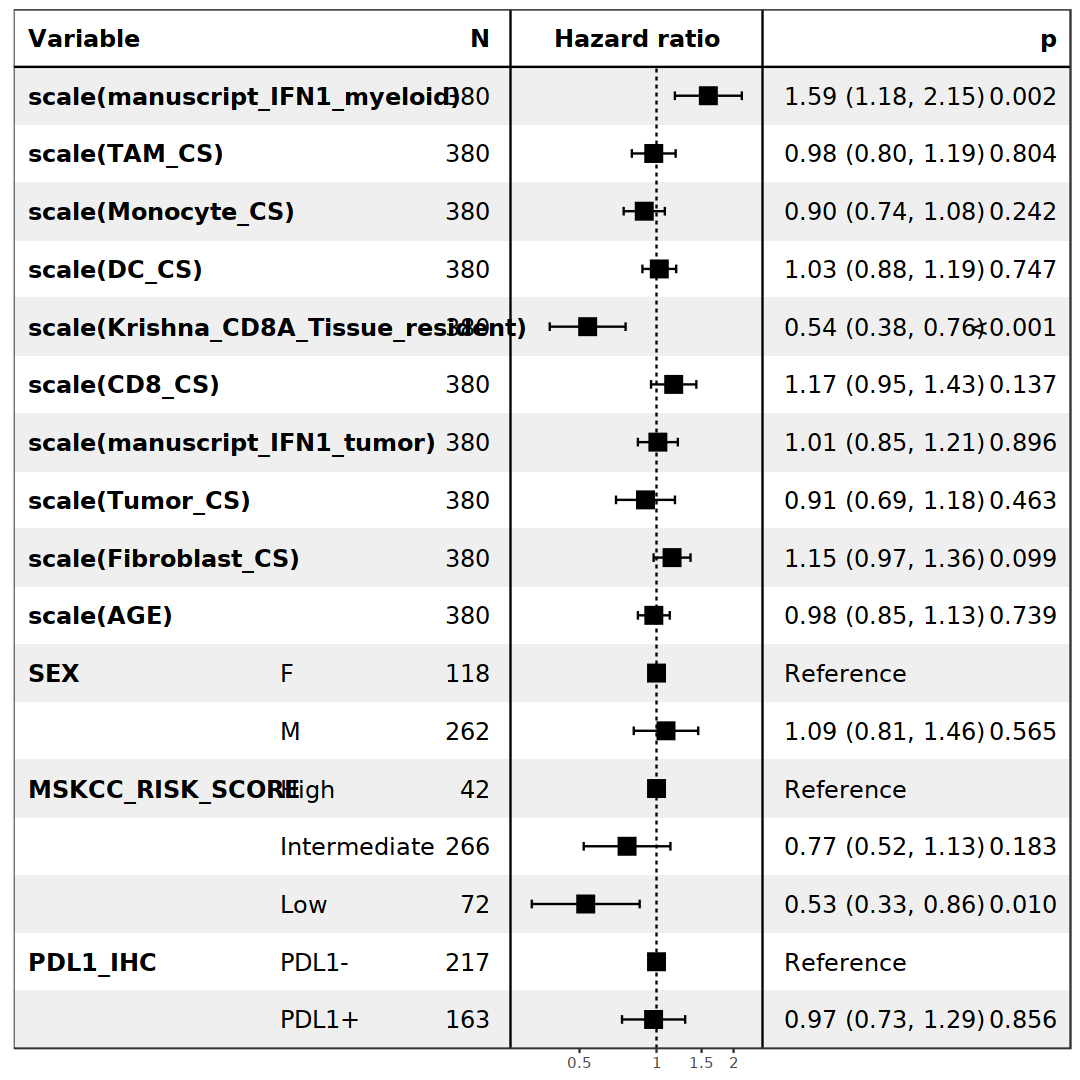

In [57]:
options(repr.plot.width=9, repr.plot.height=9)

clin_imm151_full$PDL1_IHC = relevel(factor(clin_imm151_full$PDL1_IHC), ref = "PDL1-")
atezo_bev = subset(clin_imm151_full, ARM == "atezo_bev")

atezo_bev = subset(atezo_bev, OBJECTIVE_RESPONSE %in% c("CR","PD","PR","SD"))
atezo_bev = mutate(atezo_bev, Benefit = ifelse(OBJECTIVE_RESPONSE == "CR","CB",ifelse(OBJECTIVE_RESPONSE == "PR","CB",ifelse(OBJECTIVE_RESPONSE == "PD","NCB",ifelse(OBJECTIVE_RESPONSE == "SD" & PFS_MONTHS >= 6,"CB","NCB")))))
table(atezo_bev$Benefit)

atezo_bev = mutate(atezo_bev, Benefit_Binary_Num = ifelse(Benefit == "CB",1,0))

mylogit <- glm(Benefit_Binary_Num ~ scale(manuscript_IFN1_myeloid) + scale(TAM_CS) + scale(Monocyte_CS) + scale(DC_CS) + scale(Krishna_CD8A_Tissue_resident) + scale(CD8_CS) + scale(manuscript_IFN1_tumor)  + scale(Tumor_CS) + scale(Fibroblast_CS) + scale(AGE) + SEX + MSKCC_RISK_SCORE + PDL1_IHC, family = "binomial", data = atezo_bev)
summary(mylogit)
vif(mylogit)

res.cox <- coxph(Surv(PFS_MONTHS, PFS_CENSOR) ~ scale(manuscript_IFN1_myeloid) + scale(TAM_CS) + scale(Monocyte_CS) + scale(DC_CS) + scale(Krishna_CD8A_Tissue_resident) + scale(CD8_CS) + scale(manuscript_IFN1_tumor)  + scale(Tumor_CS) + scale(Fibroblast_CS)+ scale(AGE) + SEX + MSKCC_RISK_SCORE + PDL1_IHC, data = atezo_bev)
imm151_plot = forest_model(res.cox, panels,recalculate_width = F)
imm151_plot

### JAV101

In [58]:
clin_jav101_full = readRDS("../../Trial_Cohorts/JAV101/JAV101_Clinical_Metadata_with_SigScores_CIBERSORTx.RDS")

df = data.frame(table(colnames(clin_jav101_full)))
subset(df, Freq > 1)

clin_jav101_full = subset(clin_jav101_full, select = -c(CD8A,Eosinophils,IFIT3, Neutrophils) )

Var1        Freq
14682 CD8A        2   
17979 Eosinophils 2   
21236 IFIT3       2   
27495 Neutrophils 2


 CB NCB 
239  96 


Call:
glm(formula = Benefit_Binary_Num ~ scale(manuscript_IFN1_myeloid) + 
    scale(TAM_CS) + scale(Monocyte_CS) + scale(DC_CS) + scale(Krishna_CD8A_Tissue_resident) + 
    scale(CD8_CS) + scale(manuscript_IFN1_tumor) + scale(Tumor_CS) + 
    scale(Fibroblast_CS) + scale(Age) + Sex + MSKCC + PDL1_status_v1, 
    family = "binomial", data = avel_axit)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3469  -0.9861   0.6099   0.8190   1.7719  

Coefficients:
                                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)                         -0.579364   0.467080  -1.240 0.214829    
scale(manuscript_IFN1_myeloid)      -0.666882   0.353015  -1.889 0.058878 .  
scale(TAM_CS)                        0.257223   0.232227   1.108 0.268019    
scale(Monocyte_CS)                   0.106151   0.169184   0.627 0.530378    
scale(DC_CS)                        -0.004749   0.151936  -0.031 0.975067    
scale(Krishna_CD8A_Tissue_resident)  0.583422   

GVIF     Df GVIF^(1/(2*Df))
scale(manuscript_IFN1_myeloid)      7.559508 1  2.749456       
scale(TAM_CS)                       3.060699 1  1.749485       
scale(Monocyte_CS)                  1.686166 1  1.298524       
scale(DC_CS)                        1.433461 1  1.197272       
scale(Krishna_CD8A_Tissue_resident) 6.080146 1  2.465795       
scale(CD8_CS)                       1.695300 1  1.302037       
scale(manuscript_IFN1_tumor)        2.267911 1  1.505959       
scale(Tumor_CS)                     3.313202 1  1.820220       
scale(Fibroblast_CS)                1.682622 1  1.297159       
scale(Age)                          1.052939 1  1.026128       
Sex                                 1.060487 1  1.029799       
MSKCC                               1.120851 2  1.028933       
PDL1_status_v1                      1.188144 1  1.090020

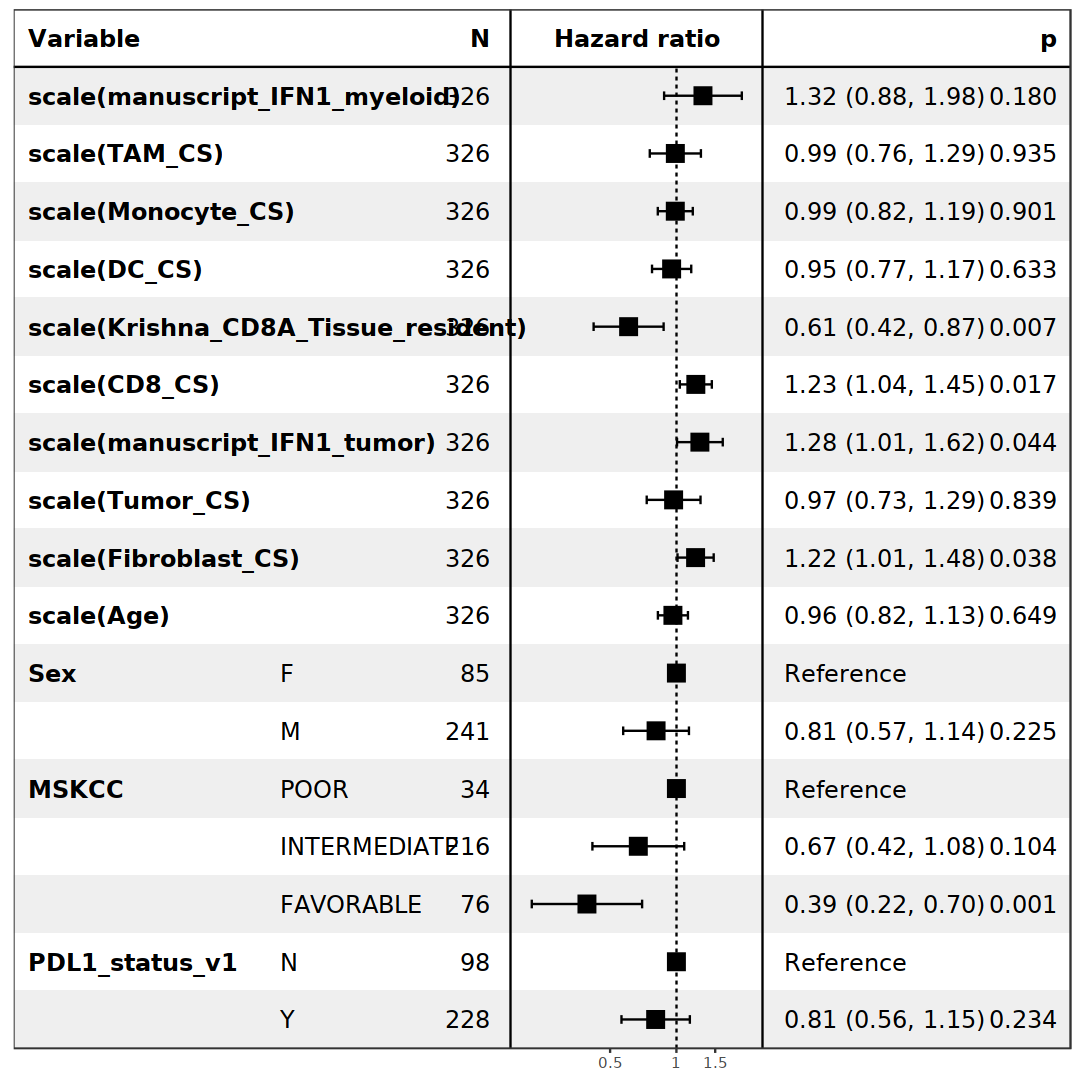

In [59]:
options(repr.plot.width=9, repr.plot.height=9)

avel_axit = subset(clin_jav101_full, Arm == "Avelumab + Axitinib")

avel_axit = subset(avel_axit, ORR %in% c("CR","PD","PR","SD"))
avel_axit = mutate(avel_axit, Benefit = ifelse(ORR == "CR","CB",ifelse(ORR == "PR","CB",ifelse(ORR == "PD","NCB",ifelse(ORR == "SD" & PFS >= 6,"CB","NCB")))))
table(avel_axit$Benefit)

avel_axit = mutate(avel_axit, Benefit_Binary_Num = ifelse(Benefit == "CB",1,0))

mylogit <- glm(Benefit_Binary_Num ~  scale(manuscript_IFN1_myeloid) + scale(TAM_CS) + scale(Monocyte_CS) + scale(DC_CS) + scale(Krishna_CD8A_Tissue_resident) + scale(CD8_CS) + scale(manuscript_IFN1_tumor)  + scale(Tumor_CS) + scale(Fibroblast_CS) + scale(Age) + Sex + MSKCC + PDL1_status_v1, family = "binomial", data = avel_axit)
summary(mylogit)
vif(mylogit)

res.cox <- coxph(Surv(PFS, PFS_CNSR) ~  scale(manuscript_IFN1_myeloid) + scale(TAM_CS) + scale(Monocyte_CS) + scale(DC_CS) + scale(Krishna_CD8A_Tissue_resident) + scale(CD8_CS) + scale(manuscript_IFN1_tumor)  + scale(Tumor_CS) + scale(Fibroblast_CS) + scale(Age) + Sex + MSKCC + PDL1_status_v1, data = avel_axit)
jav101_plot = forest_model(res.cox, panels,recalculate_width = F)
jav101_plot

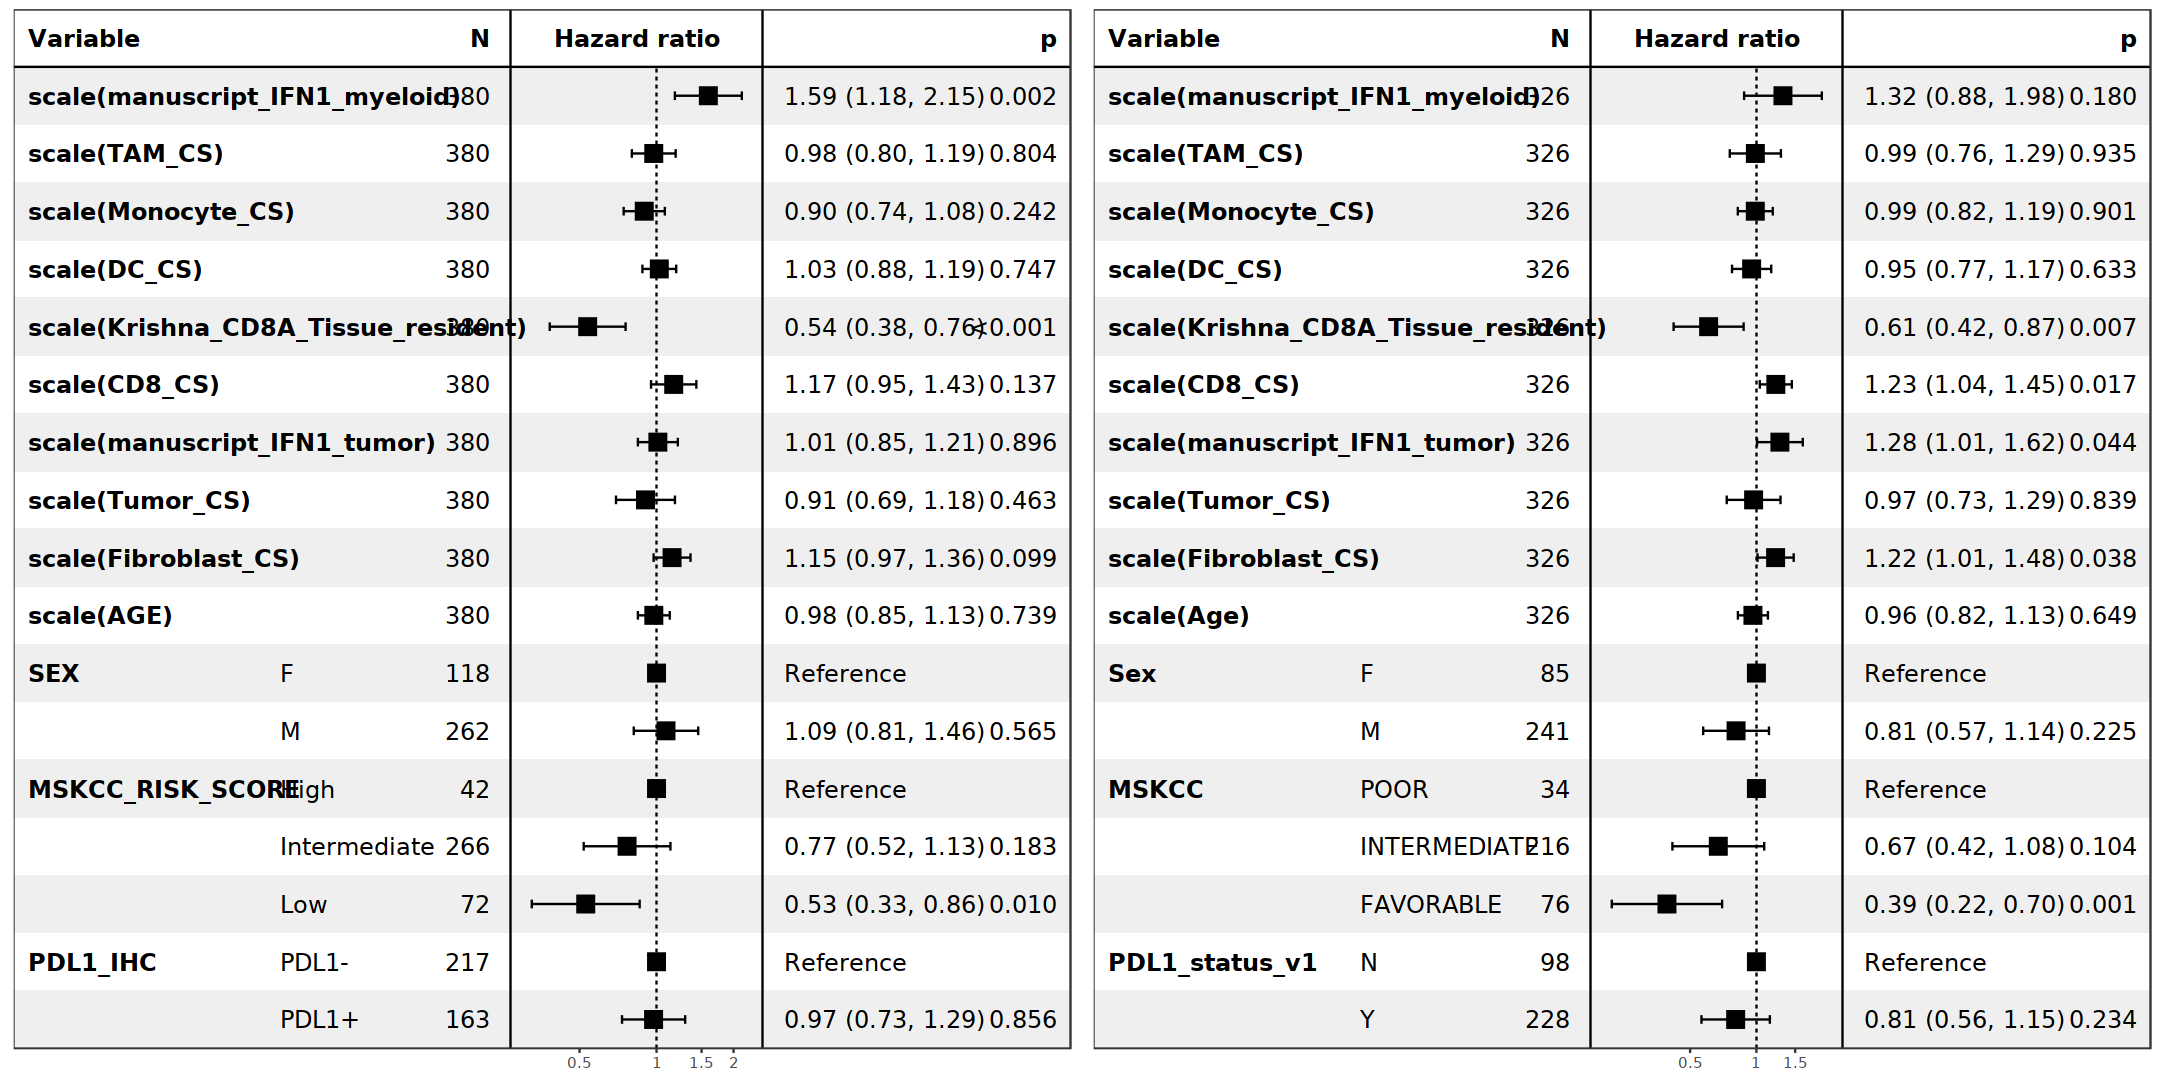

In [60]:
options(repr.plot.width=18, repr.plot.height=9)

ggarrange(imm151_plot, jav101_plot)

ggsave("../../Supp_Figures_Final/Figure_S8/FigureS8M_N_Cox_IMM151_JAV101_ICB_IFN1_Scaled.pdf",width = 18, height = 9)

### Supp Figure 8O-P. Logistic regression models for CB vs NCB in IO+VEGF arm of IMM151 and JAV101 (IFN1 signatures) <a name="7"></a>

In [61]:
panels <- list(
  list(width = 0.01),
  list(width = 0.18, display = ~variable, fontface = "bold", heading = "Variable"),
  list(width = 0.1, display = ~level),
  list(width = 0.05, display = ~n, hjust = 1, heading = "N"),
  list(width = 0.03, item = "vline", hjust = 0.5),
  list(
    width = 0.15, item = "forest", hjust = 0.5, heading = "Odds ratio", linetype = "dashed",
    line_x = 0
  ),
  list(width = 0.03, item = "vline", hjust = 0.5),
  list(width = 0.12, display = ~ ifelse(reference, "Reference", sprintf(
    "%0.2f (%0.2f, %0.2f)",
    trans(estimate), trans(conf.low), trans(conf.high)
  )), display_na = NA),
  list(
    width = 0.075,
    display = ~ ifelse(reference, "", format.pval(p.value, digits = 1,nsmall = 3, eps = 0.001)),
    display_na = NA, hjust = 1, heading = "p"
  ),
  list(width = 0.01)
)

### IMM151


 CB NCB 
263 117 


Call:
glm(formula = Benefit_Binary_Num ~ scale(manuscript_IFN1_myeloid) + 
    scale(TAM_CS) + scale(Monocyte_CS) + scale(DC_CS) + scale(Krishna_CD8A_Tissue_resident) + 
    scale(CD8_CS) + scale(manuscript_IFN1_tumor) + scale(Tumor_CS) + 
    scale(Fibroblast_CS) + scale(AGE) + SEX + MSKCC_RISK_SCORE + 
    PDL1_IHC, family = "binomial", data = atezo_bev)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2377  -1.1356   0.6577   0.8518   1.5517  

Coefficients:
                                    Estimate Std. Error z value Pr(>|z|)   
(Intercept)                          0.77308    0.40519   1.908  0.05640 . 
scale(manuscript_IFN1_myeloid)      -0.79802    0.26137  -3.053  0.00226 **
scale(TAM_CS)                       -0.07526    0.17300  -0.435  0.66354   
scale(Monocyte_CS)                   0.10325    0.15725   0.657  0.51144   
scale(DC_CS)                         0.02569    0.15245   0.169  0.86616   
scale(Krishna_CD8A_Tissue_resident)  0.72277    0.30077

GVIF     Df GVIF^(1/(2*Df))
scale(manuscript_IFN1_myeloid)      4.996851 1  2.235364       
scale(TAM_CS)                       2.246607 1  1.498868       
scale(Monocyte_CS)                  1.843180 1  1.357638       
scale(DC_CS)                        1.300169 1  1.140249       
scale(Krishna_CD8A_Tissue_resident) 6.739584 1  2.596071       
scale(CD8_CS)                       2.543126 1  1.594718       
scale(manuscript_IFN1_tumor)        2.023256 1  1.422412       
scale(Tumor_CS)                     4.279080 1  2.068594       
scale(Fibroblast_CS)                1.725728 1  1.313669       
scale(AGE)                          1.165738 1  1.079694       
SEX                                 1.081954 1  1.040170       
MSKCC_RISK_SCORE                    1.126817 2  1.030299       
PDL1_IHC                            1.300350 1  1.140329

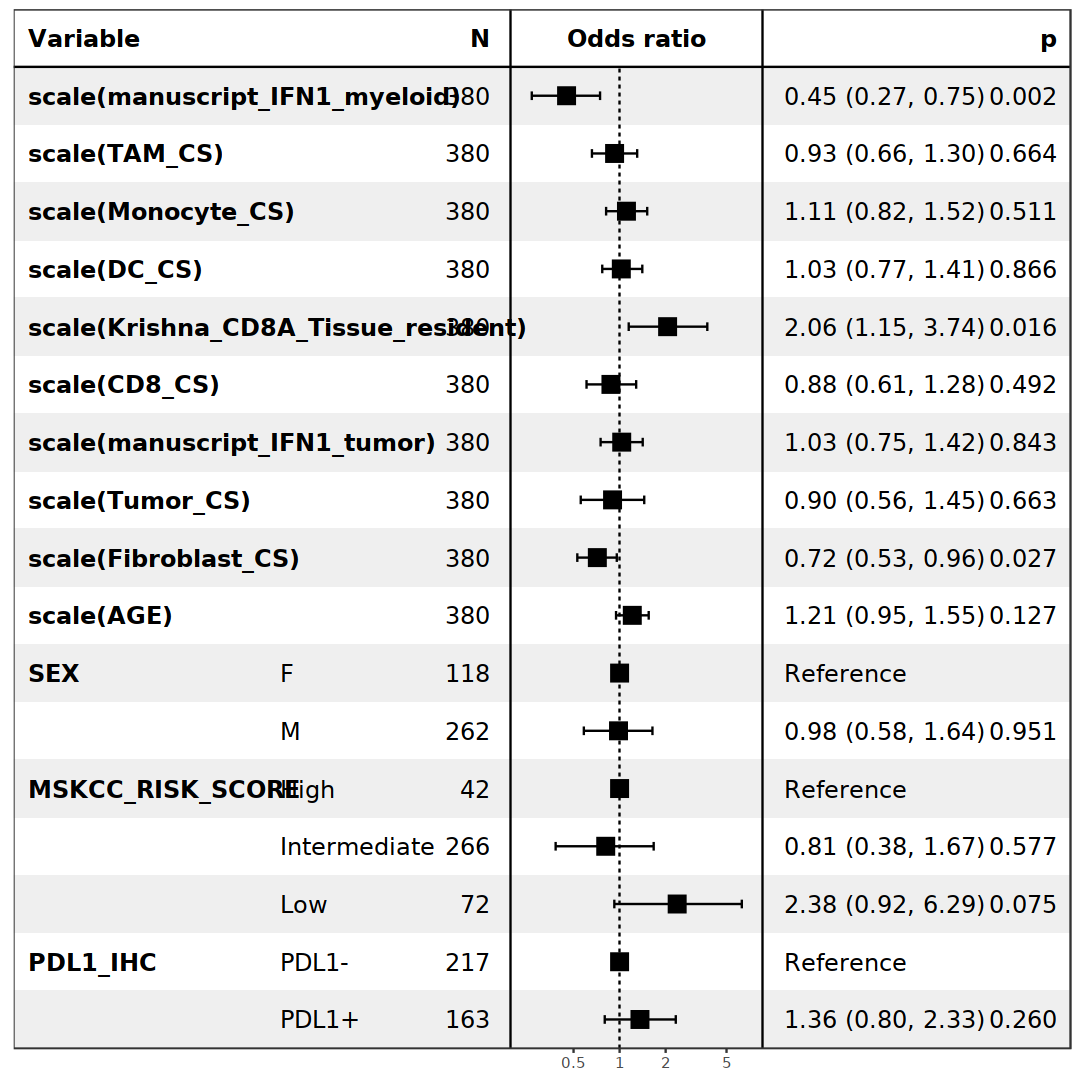

In [62]:
options(repr.plot.width=9, repr.plot.height=9)

clin_imm151_full$PDL1_IHC = relevel(factor(clin_imm151_full$PDL1_IHC), ref = "PDL1-")
atezo_bev = subset(clin_imm151_full, ARM == "atezo_bev")

atezo_bev = subset(atezo_bev, OBJECTIVE_RESPONSE %in% c("CR","PD","PR","SD"))
atezo_bev = mutate(atezo_bev, Benefit = ifelse(OBJECTIVE_RESPONSE == "CR","CB",ifelse(OBJECTIVE_RESPONSE == "PR","CB",ifelse(OBJECTIVE_RESPONSE == "PD","NCB",ifelse(OBJECTIVE_RESPONSE == "SD" & PFS_MONTHS >= 6,"CB","NCB")))))
table(atezo_bev$Benefit)

atezo_bev = mutate(atezo_bev, Benefit_Binary_Num = ifelse(Benefit == "CB",1,0))

mylogit <- glm(Benefit_Binary_Num ~ scale(manuscript_IFN1_myeloid) + scale(TAM_CS) + scale(Monocyte_CS) + scale(DC_CS) + scale(Krishna_CD8A_Tissue_resident) + scale(CD8_CS) + scale(manuscript_IFN1_tumor)  + scale(Tumor_CS) + scale(Fibroblast_CS) + scale(AGE) + SEX + MSKCC_RISK_SCORE + PDL1_IHC, family = "binomial", data = atezo_bev)
summary(mylogit)
vif(mylogit)

imm151_plot = forest_model(mylogit, panels,recalculate_width = F)
imm151_plot

### JAV101


 CB NCB 
239  96 


Call:
glm(formula = Benefit_Binary_Num ~ scale(manuscript_IFN1_myeloid) + 
    scale(TAM_CS) + scale(Monocyte_CS) + scale(DC_CS) + scale(Krishna_CD8A_Tissue_resident) + 
    scale(CD8_CS) + scale(manuscript_IFN1_tumor) + scale(Tumor_CS) + 
    scale(Fibroblast_CS) + scale(Age) + Sex + MSKCC + PDL1_status_v1, 
    family = "binomial", data = avel_axit)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3469  -0.9861   0.6099   0.8190   1.7719  

Coefficients:
                                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)                         -0.579364   0.467080  -1.240 0.214829    
scale(manuscript_IFN1_myeloid)      -0.666882   0.353015  -1.889 0.058878 .  
scale(TAM_CS)                        0.257223   0.232227   1.108 0.268019    
scale(Monocyte_CS)                   0.106151   0.169184   0.627 0.530378    
scale(DC_CS)                        -0.004749   0.151936  -0.031 0.975067    
scale(Krishna_CD8A_Tissue_resident)  0.583422   

GVIF     Df GVIF^(1/(2*Df))
scale(manuscript_IFN1_myeloid)      7.559508 1  2.749456       
scale(TAM_CS)                       3.060699 1  1.749485       
scale(Monocyte_CS)                  1.686166 1  1.298524       
scale(DC_CS)                        1.433461 1  1.197272       
scale(Krishna_CD8A_Tissue_resident) 6.080146 1  2.465795       
scale(CD8_CS)                       1.695300 1  1.302037       
scale(manuscript_IFN1_tumor)        2.267911 1  1.505959       
scale(Tumor_CS)                     3.313202 1  1.820220       
scale(Fibroblast_CS)                1.682622 1  1.297159       
scale(Age)                          1.052939 1  1.026128       
Sex                                 1.060487 1  1.029799       
MSKCC                               1.120851 2  1.028933       
PDL1_status_v1                      1.188144 1  1.090020

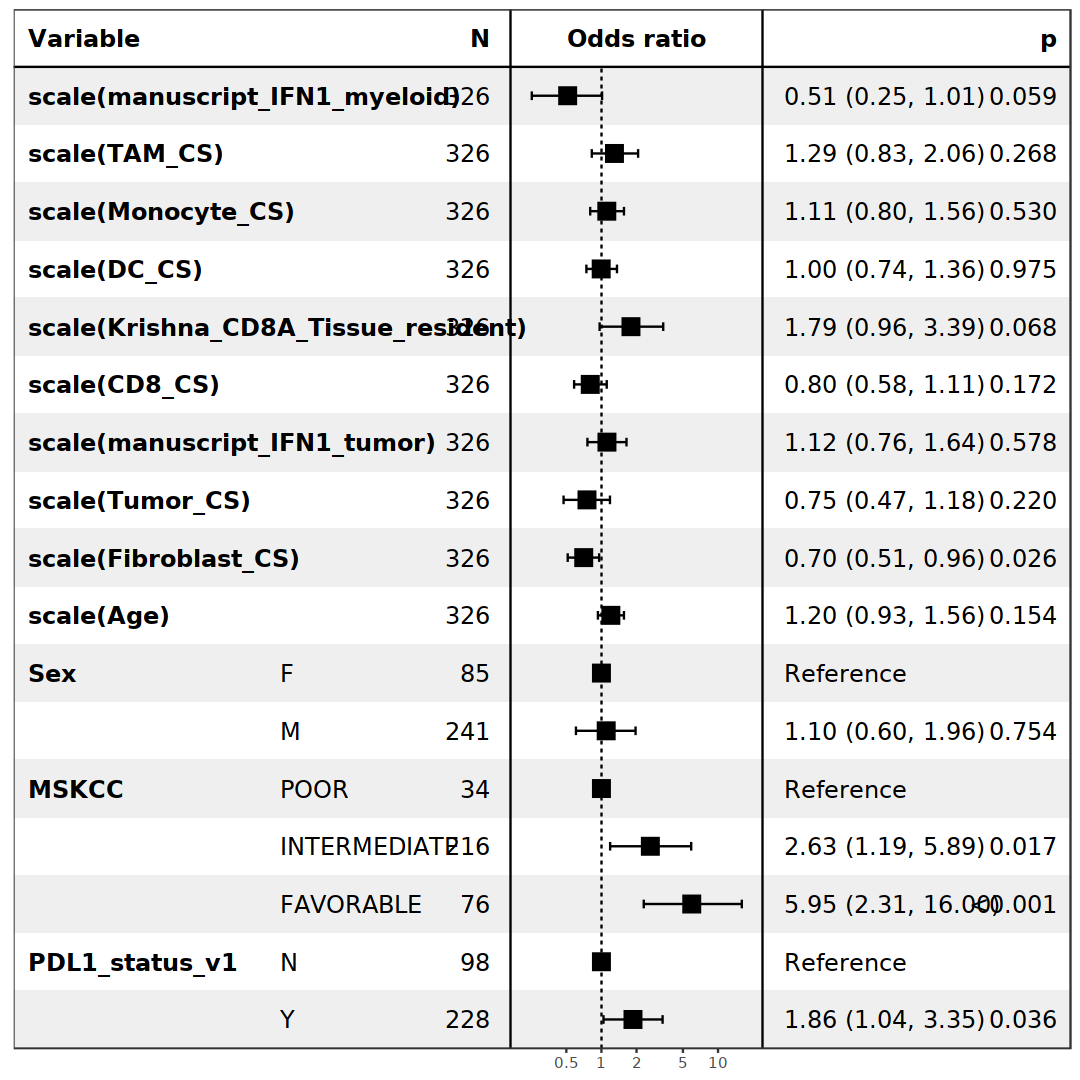

In [63]:
options(repr.plot.width=9, repr.plot.height=9)

avel_axit = subset(clin_jav101_full, Arm == "Avelumab + Axitinib")

avel_axit = subset(avel_axit, ORR %in% c("CR","PD","PR","SD"))
avel_axit = mutate(avel_axit, Benefit = ifelse(ORR == "CR","CB",ifelse(ORR == "PR","CB",ifelse(ORR == "PD","NCB",ifelse(ORR == "SD" & PFS >= 6,"CB","NCB")))))
table(avel_axit$Benefit)

avel_axit = mutate(avel_axit, Benefit_Binary_Num = ifelse(Benefit == "CB",1,0))

mylogit <- glm(Benefit_Binary_Num ~  scale(manuscript_IFN1_myeloid) + scale(TAM_CS) + scale(Monocyte_CS) + scale(DC_CS) + scale(Krishna_CD8A_Tissue_resident) + scale(CD8_CS) + scale(manuscript_IFN1_tumor)  + scale(Tumor_CS) + scale(Fibroblast_CS) + scale(Age) + Sex + MSKCC + PDL1_status_v1, family = "binomial", data = avel_axit)
summary(mylogit)
vif(mylogit)

jav101_plot = forest_model(mylogit, panels,recalculate_width = F)
jav101_plot

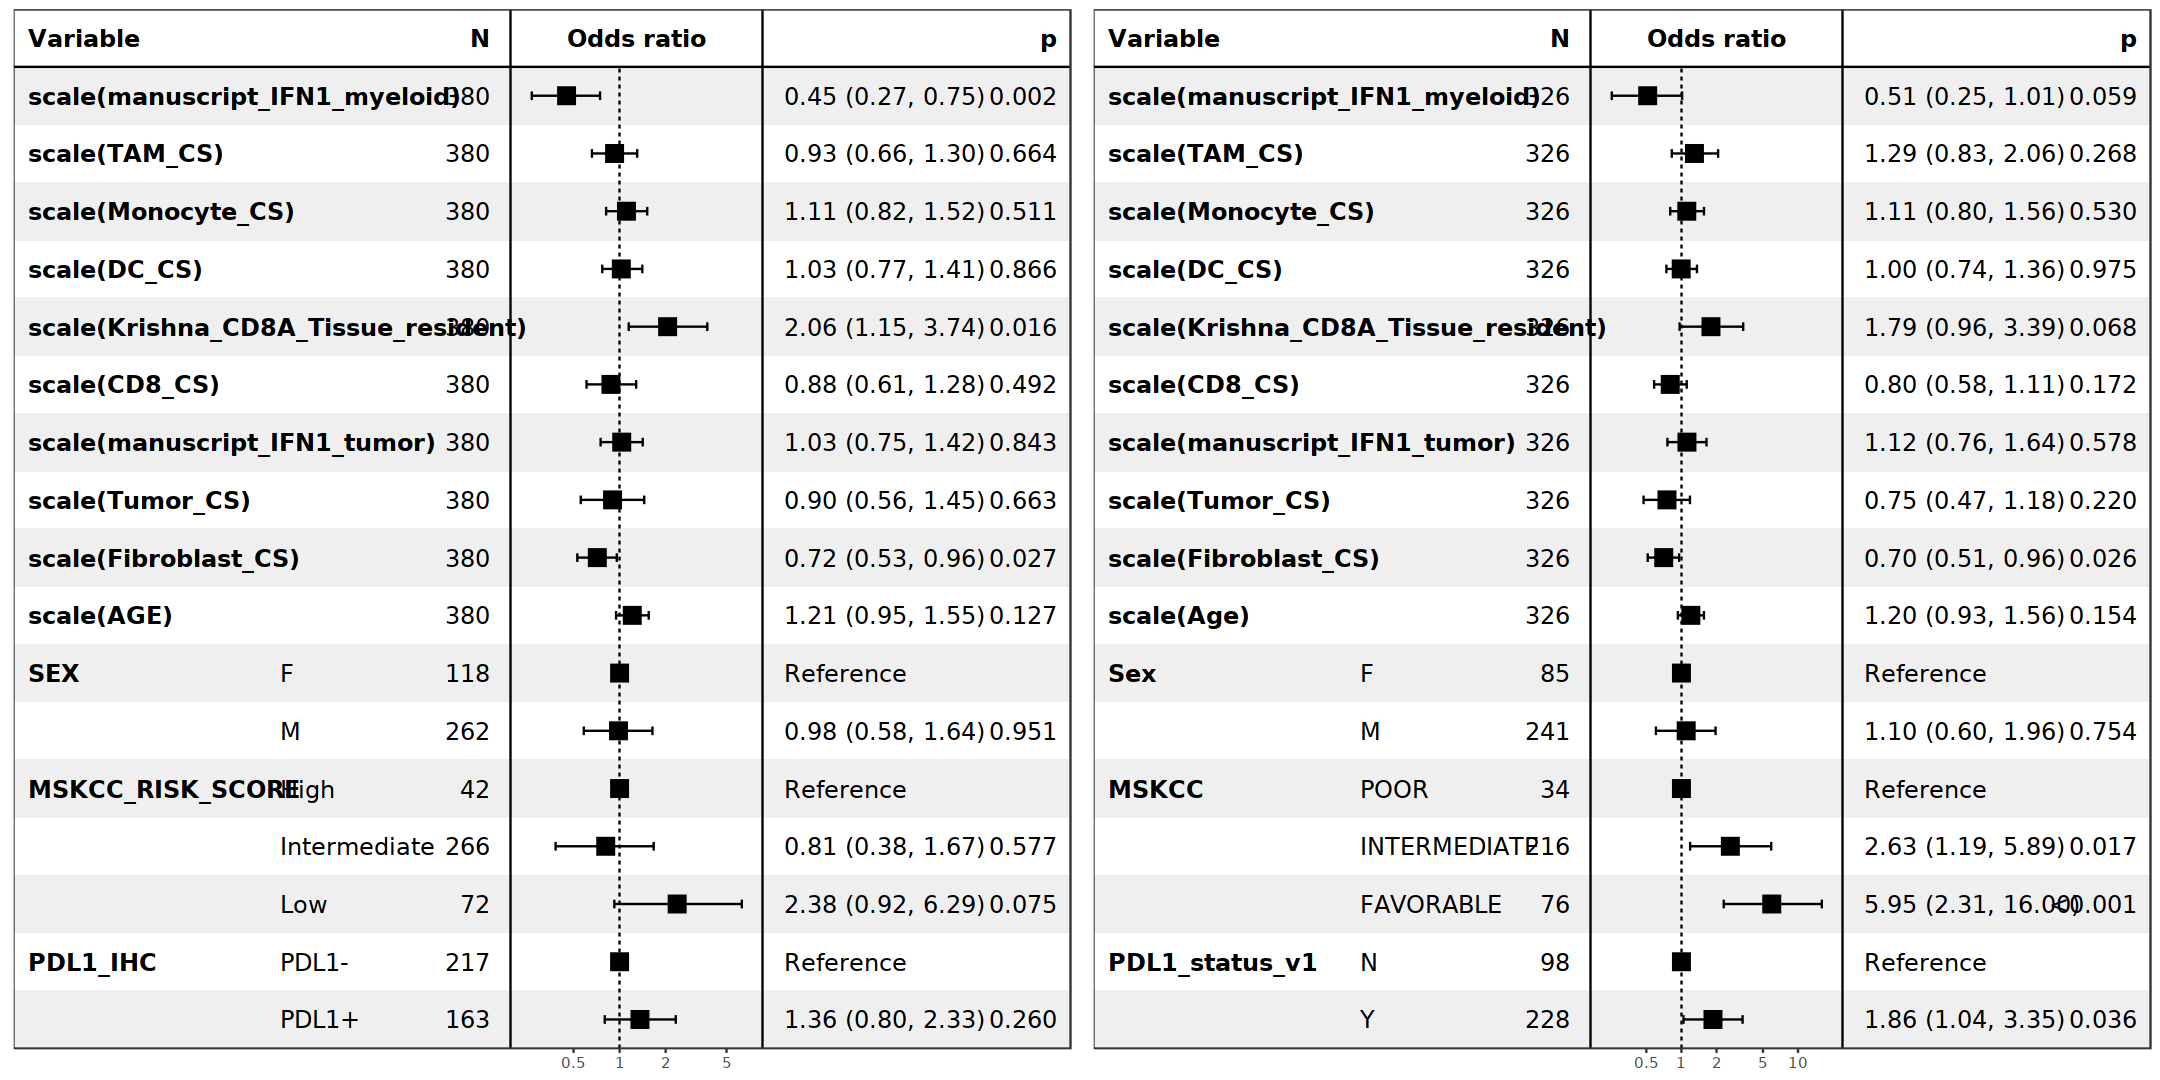

In [64]:
options(repr.plot.width=18, repr.plot.height=9)

ggarrange(imm151_plot, jav101_plot)

ggsave("../../Supp_Figures_Final/Figure_S8/FigureS8O_P_LR_IMM151_JAV101_ICB_IFN1_Scaled.pdf",width = 18, height = 9)

### Supp Figure 8Q-R. Cox models for PFS in IO+VEGF arm of IMM151 and JAV101 (T cell-inflamed GEP) <a name="8"></a>

### Set panels for forest_model plots

In [65]:
panels <- list(
  list(width = 0.01),
  list(width = 0.18, display = ~variable, fontface = "bold", heading = "Variable"),
  list(width = 0.1, display = ~level),
  list(width = 0.05, display = ~n, hjust = 1, heading = "N"),
  list(width = 0.03, item = "vline", hjust = 0.5),
  list(
    width = 0.15, item = "forest", hjust = 0.5, heading = "Hazard ratio", linetype = "dashed",
    line_x = 0
  ),
  list(width = 0.03, item = "vline", hjust = 0.5),
  list(width = 0.12, display = ~ ifelse(reference, "Reference", sprintf(
    "%0.2f (%0.2f, %0.2f)",
    trans(estimate), trans(conf.low), trans(conf.high)
  )), display_na = NA),
  list(
    width = 0.075,
    display = ~ ifelse(reference, "", format.pval(p.value, digits = 1,nsmall = 3, eps = 0.001)),
    display_na = NA, hjust = 1, heading = "p"
  ),
  list(width = 0.01)
)

### IMM151

In [66]:
clin_imm151_full = readRDS("../../Trial_Cohorts/IMM151/IMM151_Clinical_Metadata_with_SigScores_CIBERSORTx.RDS")

df = data.frame(table(colnames(clin_imm151_full)))
subset(df, Freq > 1)

clin_imm151_full = subset(clin_imm151_full, select = -c(IFIT3) )

Var1  Freq
8604 IFIT3 2

### Model with CIBERSORTx fractions


 CB NCB 
263 117 


Call:
glm(formula = Benefit_Binary_Num ~ scale(T.cell.inflamed.GEP) + 
    scale(TAM_CS) + scale(Monocyte_CS) + scale(DC_CS) + scale(CD8_CS) + 
    scale(Tumor_CS) + scale(Fibroblast_CS) + scale(AGE) + SEX + 
    MSKCC_RISK_SCORE + PDL1_IHC, family = "binomial", data = atezo_bev)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1210  -1.2637   0.7100   0.8667   1.4829  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)  
(Intercept)                   0.53689    0.39117   1.373   0.1699  
scale(T.cell.inflamed.GEP)   -0.10953    0.21814  -0.502   0.6156  
scale(TAM_CS)                -0.29713    0.14531  -2.045   0.0409 *
scale(Monocyte_CS)            0.03252    0.15018   0.217   0.8286  
scale(DC_CS)                  0.02932    0.15142   0.194   0.8465  
scale(CD8_CS)                 0.09962    0.19358   0.515   0.6068  
scale(Tumor_CS)              -0.11669    0.21057  -0.554   0.5795  
scale(Fibroblast_CS)         -0.35817    0.14

GVIF     Df GVIF^(1/(2*Df))
scale(T.cell.inflamed.GEP) 3.556944 1  1.885986       
scale(TAM_CS)              1.640239 1  1.280718       
scale(Monocyte_CS)         1.726287 1  1.313882       
scale(DC_CS)               1.308621 1  1.143950       
scale(CD8_CS)              2.589610 1  1.609227       
scale(Tumor_CS)            3.270255 1  1.808385       
scale(Fibroblast_CS)       1.609372 1  1.268610       
scale(AGE)                 1.118186 1  1.057443       
SEX                        1.069790 1  1.034307       
MSKCC_RISK_SCORE           1.097849 2  1.023613       
PDL1_IHC                   1.389113 1  1.178606

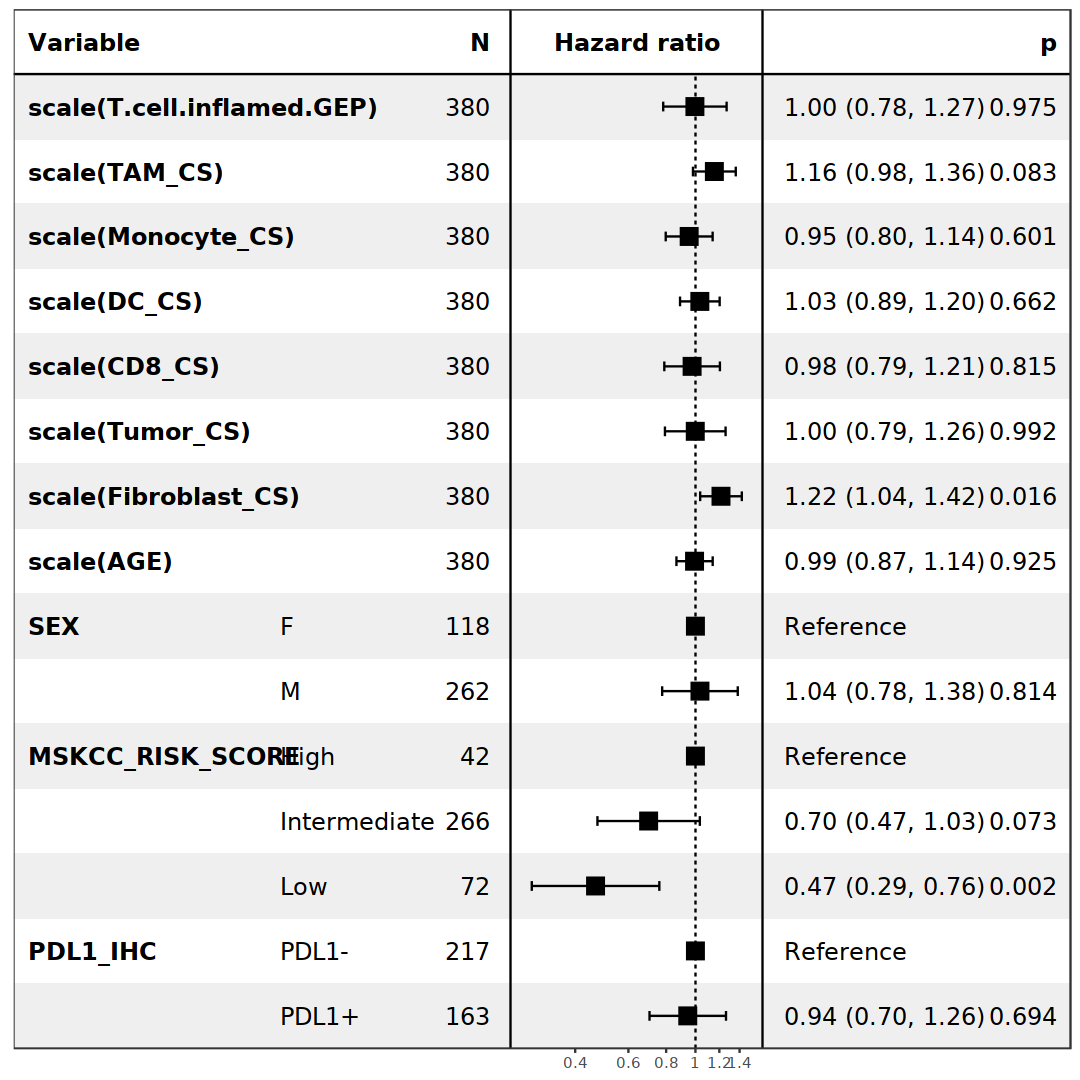

In [67]:
options(repr.plot.width=9, repr.plot.height=9)

clin_imm151_full$PDL1_IHC = relevel(factor(clin_imm151_full$PDL1_IHC), ref = "PDL1-")
atezo_bev = subset(clin_imm151_full, ARM == "atezo_bev")

atezo_bev = subset(atezo_bev, OBJECTIVE_RESPONSE %in% c("CR","PD","PR","SD"))
atezo_bev = mutate(atezo_bev, Benefit = ifelse(OBJECTIVE_RESPONSE == "CR","CB",ifelse(OBJECTIVE_RESPONSE == "PR","CB",ifelse(OBJECTIVE_RESPONSE == "PD","NCB",ifelse(OBJECTIVE_RESPONSE == "SD" & PFS_MONTHS >= 6,"CB","NCB")))))
table(atezo_bev$Benefit)

atezo_bev = mutate(atezo_bev, Benefit_Binary_Num = ifelse(Benefit == "CB",1,0))

mylogit <- glm(Benefit_Binary_Num ~ scale(T.cell.inflamed.GEP) + scale(TAM_CS) + scale(Monocyte_CS) + scale(DC_CS) + scale(CD8_CS) + scale(Tumor_CS) + scale(Fibroblast_CS) + scale(AGE) + SEX + MSKCC_RISK_SCORE + PDL1_IHC, family = "binomial", data = atezo_bev)
summary(mylogit)
vif(mylogit)

res.cox <- coxph(Surv(PFS_MONTHS, PFS_CENSOR) ~ scale(T.cell.inflamed.GEP) + scale(TAM_CS) + scale(Monocyte_CS) + scale(DC_CS) + scale(CD8_CS) + scale(Tumor_CS) + scale(Fibroblast_CS) + scale(AGE) + SEX + MSKCC_RISK_SCORE + PDL1_IHC, data = atezo_bev)
forest_model(res.cox, panels,recalculate_width = F)

### Model without CIBERSORTx fractions 


 CB NCB 
263 117 


Call:
glm(formula = Benefit_Binary_Num ~ scale(T.cell.inflamed.GEP) + 
    scale(AGE) + SEX + MSKCC_RISK_SCORE + PDL1_IHC, family = "binomial", 
    data = atezo_bev)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0892  -1.3745   0.7892   0.9051   1.2427  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)   
(Intercept)                   0.31101    0.37042   0.840  0.40112   
scale(T.cell.inflamed.GEP)    0.02971    0.12948   0.229  0.81853   
scale(AGE)                    0.17990    0.11305   1.591  0.11154   
SEXM                          0.13516    0.24346   0.555  0.57879   
MSKCC_RISK_SCOREIntermediate  0.16709    0.34607   0.483  0.62923   
MSKCC_RISK_SCORELow           1.20257    0.46003   2.614  0.00895 **
PDL1_IHCPDL1+                 0.25245    0.26440   0.955  0.33969   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 469.23

GVIF     Df GVIF^(1/(2*Df))
scale(T.cell.inflamed.GEP) 1.312344 1  1.145576       
scale(AGE)                 1.018174 1  1.009046       
SEX                        1.013597 1  1.006776       
MSKCC_RISK_SCORE           1.011671 2  1.002905       
PDL1_IHC                   1.318119 1  1.148094

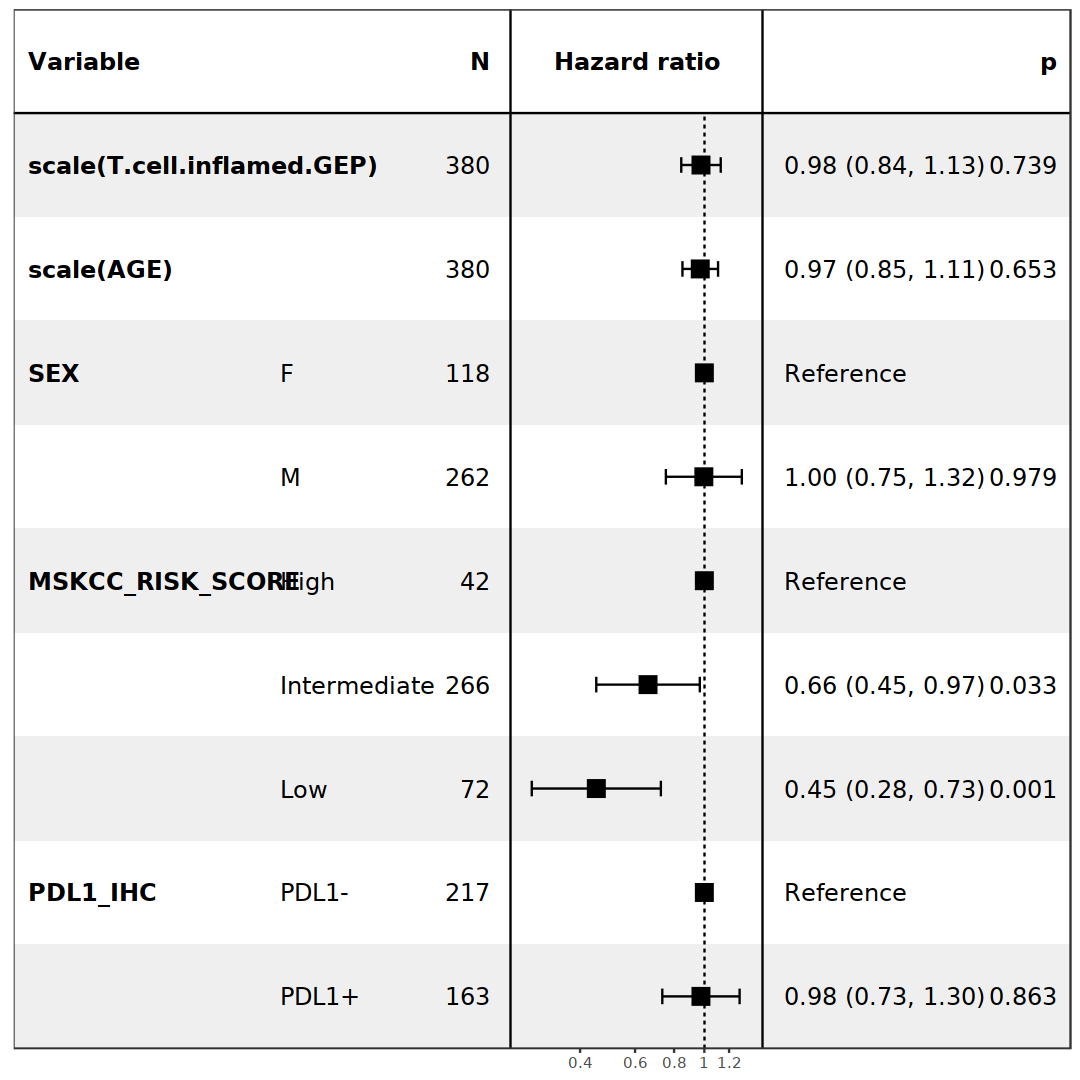

In [68]:
options(repr.plot.width=9, repr.plot.height=9)

clin_imm151_full$PDL1_IHC = relevel(factor(clin_imm151_full$PDL1_IHC), ref = "PDL1-")
atezo_bev = subset(clin_imm151_full, ARM == "atezo_bev")

atezo_bev = subset(atezo_bev, OBJECTIVE_RESPONSE %in% c("CR","PD","PR","SD"))
atezo_bev = mutate(atezo_bev, Benefit = ifelse(OBJECTIVE_RESPONSE == "CR","CB",ifelse(OBJECTIVE_RESPONSE == "PR","CB",ifelse(OBJECTIVE_RESPONSE == "PD","NCB",ifelse(OBJECTIVE_RESPONSE == "SD" & PFS_MONTHS >= 6,"CB","NCB")))))
table(atezo_bev$Benefit)

atezo_bev = mutate(atezo_bev, Benefit_Binary_Num = ifelse(Benefit == "CB",1,0))

mylogit <- glm(Benefit_Binary_Num ~ scale(T.cell.inflamed.GEP) + scale(AGE) + SEX + MSKCC_RISK_SCORE + PDL1_IHC, family = "binomial", data = atezo_bev)
summary(mylogit)
vif(mylogit)

res.cox <- coxph(Surv(PFS_MONTHS, PFS_CENSOR) ~ scale(T.cell.inflamed.GEP) + scale(AGE) + SEX + MSKCC_RISK_SCORE + PDL1_IHC, data = atezo_bev)
imm151_plot = forest_model(res.cox, panels,recalculate_width = F)
imm151_plot

### JAV101

In [69]:
clin_jav101_full = readRDS("../../Trial_Cohorts/JAV101/JAV101_Clinical_Metadata_with_SigScores_CIBERSORTx.RDS")

df = data.frame(table(colnames(clin_jav101_full)))
subset(df, Freq > 1)

clin_jav101_full = subset(clin_jav101_full, select = -c(CD8A,Eosinophils,IFIT3, Neutrophils) )

Var1        Freq
14682 CD8A        2   
17979 Eosinophils 2   
21236 IFIT3       2   
27495 Neutrophils 2

### Model with CIBERSORTx fractions


 CB NCB 
239  96 


Call:
glm(formula = Benefit_Binary_Num ~ scale(T.cell.inflamed.GEP) + 
    scale(TAM_CS) + scale(Monocyte_CS) + scale(DC_CS) + scale(CD8_CS) + 
    scale(Tumor_CS) + scale(Fibroblast_CS) + scale(Age) + Sex + 
    MSKCC + PDL1_status_v1, family = "binomial", data = avel_axit)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2351  -1.0582   0.6448   0.8277   1.5657  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -0.73809    0.46207  -1.597 0.110189    
scale(T.cell.inflamed.GEP) -0.02751    0.19500  -0.141 0.887829    
scale(TAM_CS)              -0.05177    0.16063  -0.322 0.747240    
scale(Monocyte_CS)         -0.06118    0.14902  -0.411 0.681430    
scale(DC_CS)               -0.06719    0.14639  -0.459 0.646243    
scale(CD8_CS)              -0.10461    0.15937  -0.656 0.511575    
scale(Tumor_CS)            -0.34487    0.19331  -1.784 0.074415 .  
scale(Fibroblast_CS)       -0.41595    0.15144  -2

GVIF     Df GVIF^(1/(2*Df))
scale(T.cell.inflamed.GEP) 2.315611 1  1.521713       
scale(TAM_CS)              1.535209 1  1.239036       
scale(Monocyte_CS)         1.306687 1  1.143104       
scale(DC_CS)               1.371790 1  1.171234       
scale(CD8_CS)              1.626005 1  1.275149       
scale(Tumor_CS)            2.309912 1  1.519840       
scale(Fibroblast_CS)       1.540538 1  1.241184       
scale(Age)                 1.036586 1  1.018128       
Sex                        1.052638 1  1.025981       
MSKCC                      1.119521 2  1.028627       
PDL1_status_v1             1.248991 1  1.117583

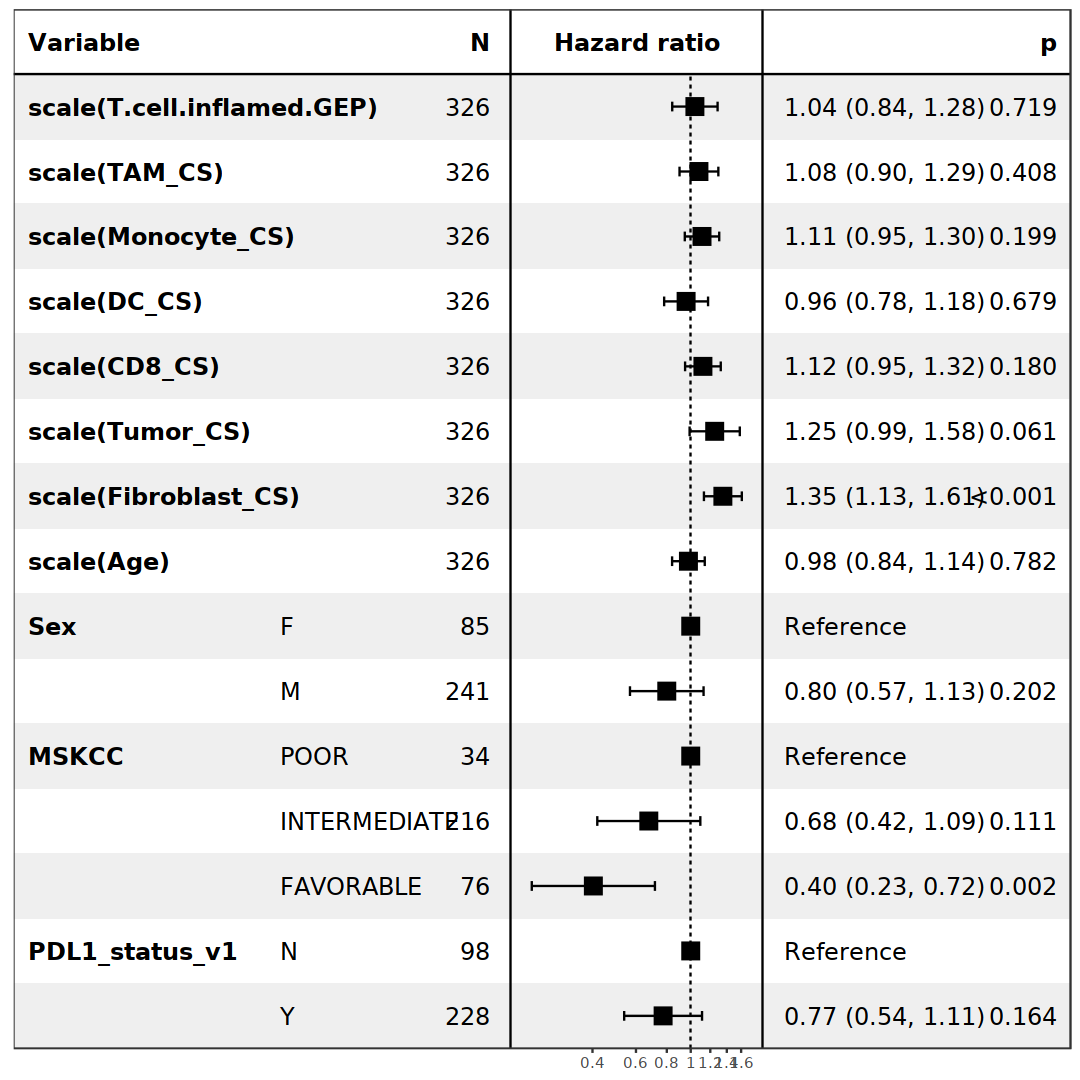

In [70]:
options(repr.plot.width=9, repr.plot.height=9)

avel_axit = subset(clin_jav101_full, Arm == "Avelumab + Axitinib")

avel_axit = subset(avel_axit, ORR %in% c("CR","PD","PR","SD"))
avel_axit = mutate(avel_axit, Benefit = ifelse(ORR == "CR","CB",ifelse(ORR == "PR","CB",ifelse(ORR == "PD","NCB",ifelse(ORR == "SD" & PFS >= 6,"CB","NCB")))))
table(avel_axit$Benefit)

avel_axit = mutate(avel_axit, Benefit_Binary_Num = ifelse(Benefit == "CB",1,0))

mylogit <- glm(Benefit_Binary_Num ~  scale(T.cell.inflamed.GEP) + scale(TAM_CS) + scale(Monocyte_CS) + scale(DC_CS) + scale(CD8_CS) + scale(Tumor_CS) + scale(Fibroblast_CS) + scale(Age) + Sex + MSKCC + PDL1_status_v1, family = "binomial", data = avel_axit)
summary(mylogit)
vif(mylogit)

res.cox <- coxph(Surv(PFS, PFS_CNSR) ~  scale(T.cell.inflamed.GEP) + scale(TAM_CS) + scale(Monocyte_CS) + scale(DC_CS) + scale(CD8_CS) + scale(Tumor_CS) + scale(Fibroblast_CS) + scale(Age) + Sex + MSKCC + PDL1_status_v1, data = avel_axit)
forest_model(res.cox,panels,recalculate_width = F)

### Model without CIBERSORTx fractions


 CB NCB 
239  96 


Call:
glm(formula = Benefit_Binary_Num ~ scale(T.cell.inflamed.GEP) + 
    scale(Age) + Sex + MSKCC + PDL1_status_v1, family = "binomial", 
    data = avel_axit)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2512  -1.1605   0.6771   0.8025   1.5836  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -0.6641     0.4441  -1.496 0.134758    
scale(T.cell.inflamed.GEP)   0.1232     0.1374   0.896 0.370069    
scale(Age)                   0.2153     0.1254   1.717 0.086048 .  
SexM                         0.1470     0.2877   0.511 0.609460    
MSKCCINTERMEDIATE            1.0429     0.3856   2.705 0.006836 ** 
MSKCCFAVORABLE               1.8220     0.4700   3.877 0.000106 ***
PDL1_status_v1Y              0.5524     0.2904   1.902 0.057183 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 395.19  on 325  deg

GVIF     Df GVIF^(1/(2*Df))
scale(T.cell.inflamed.GEP) 1.193993 1  1.092700       
scale(Age)                 1.007738 1  1.003862       
Sex                        1.028938 1  1.014366       
MSKCC                      1.048473 2  1.011904       
PDL1_status_v1             1.188060 1  1.089982

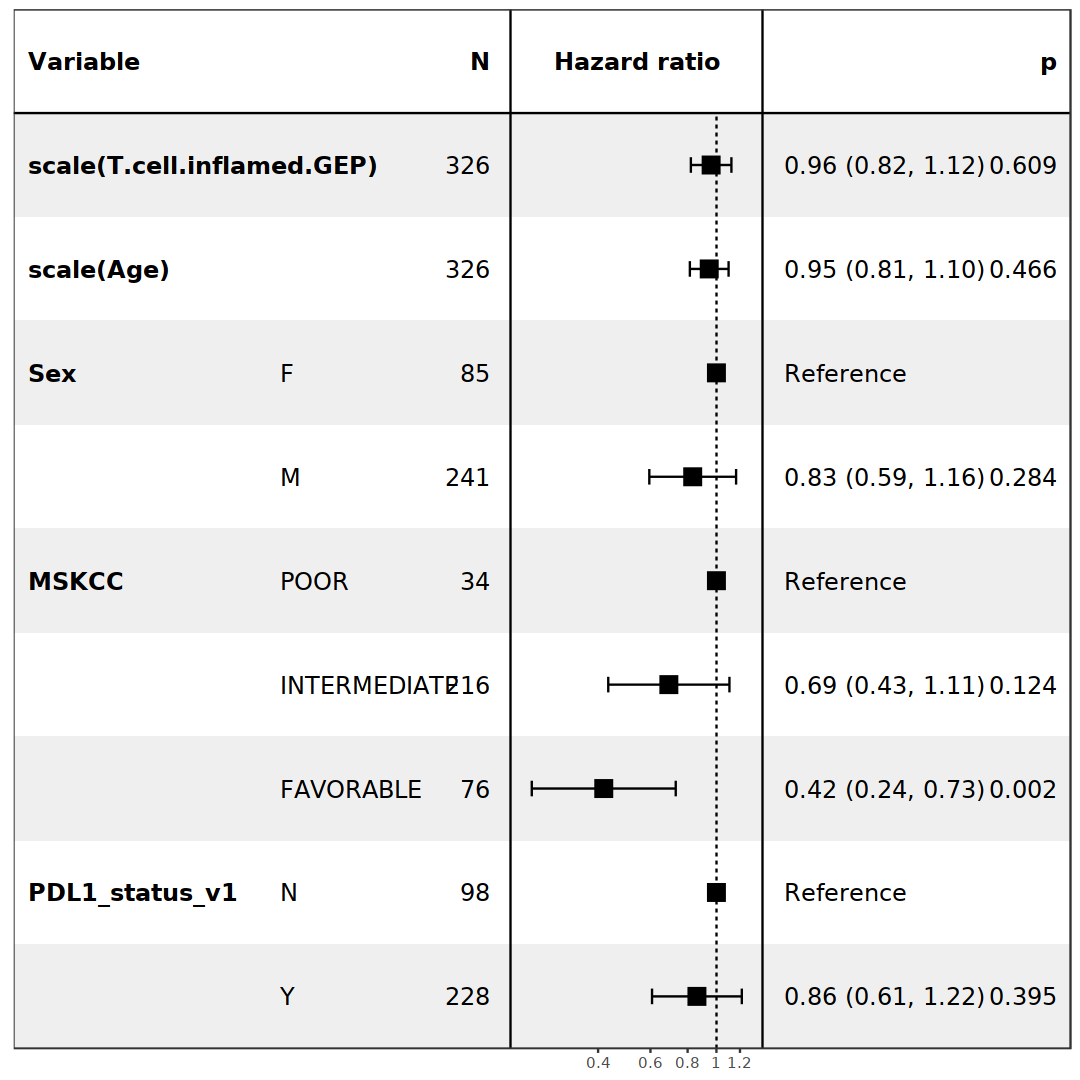

In [71]:
options(repr.plot.width=9, repr.plot.height=9)

avel_axit = subset(clin_jav101_full, Arm == "Avelumab + Axitinib")

avel_axit = subset(avel_axit, ORR %in% c("CR","PD","PR","SD"))
avel_axit = mutate(avel_axit, Benefit = ifelse(ORR == "CR","CB",ifelse(ORR == "PR","CB",ifelse(ORR == "PD","NCB",ifelse(ORR == "SD" & PFS >= 6,"CB","NCB")))))
table(avel_axit$Benefit)

avel_axit = mutate(avel_axit, Benefit_Binary_Num = ifelse(Benefit == "CB",1,0))

mylogit <- glm(Benefit_Binary_Num ~  scale(T.cell.inflamed.GEP) + scale(Age) + Sex + MSKCC + PDL1_status_v1, family = "binomial", data = avel_axit)
summary(mylogit)
vif(mylogit)

res.cox <- coxph(Surv(PFS, PFS_CNSR) ~  scale(T.cell.inflamed.GEP) + scale(Age) + Sex + MSKCC + PDL1_status_v1, data = avel_axit)
jav101_plot = forest_model(res.cox,panels,recalculate_width = F)
jav101_plot

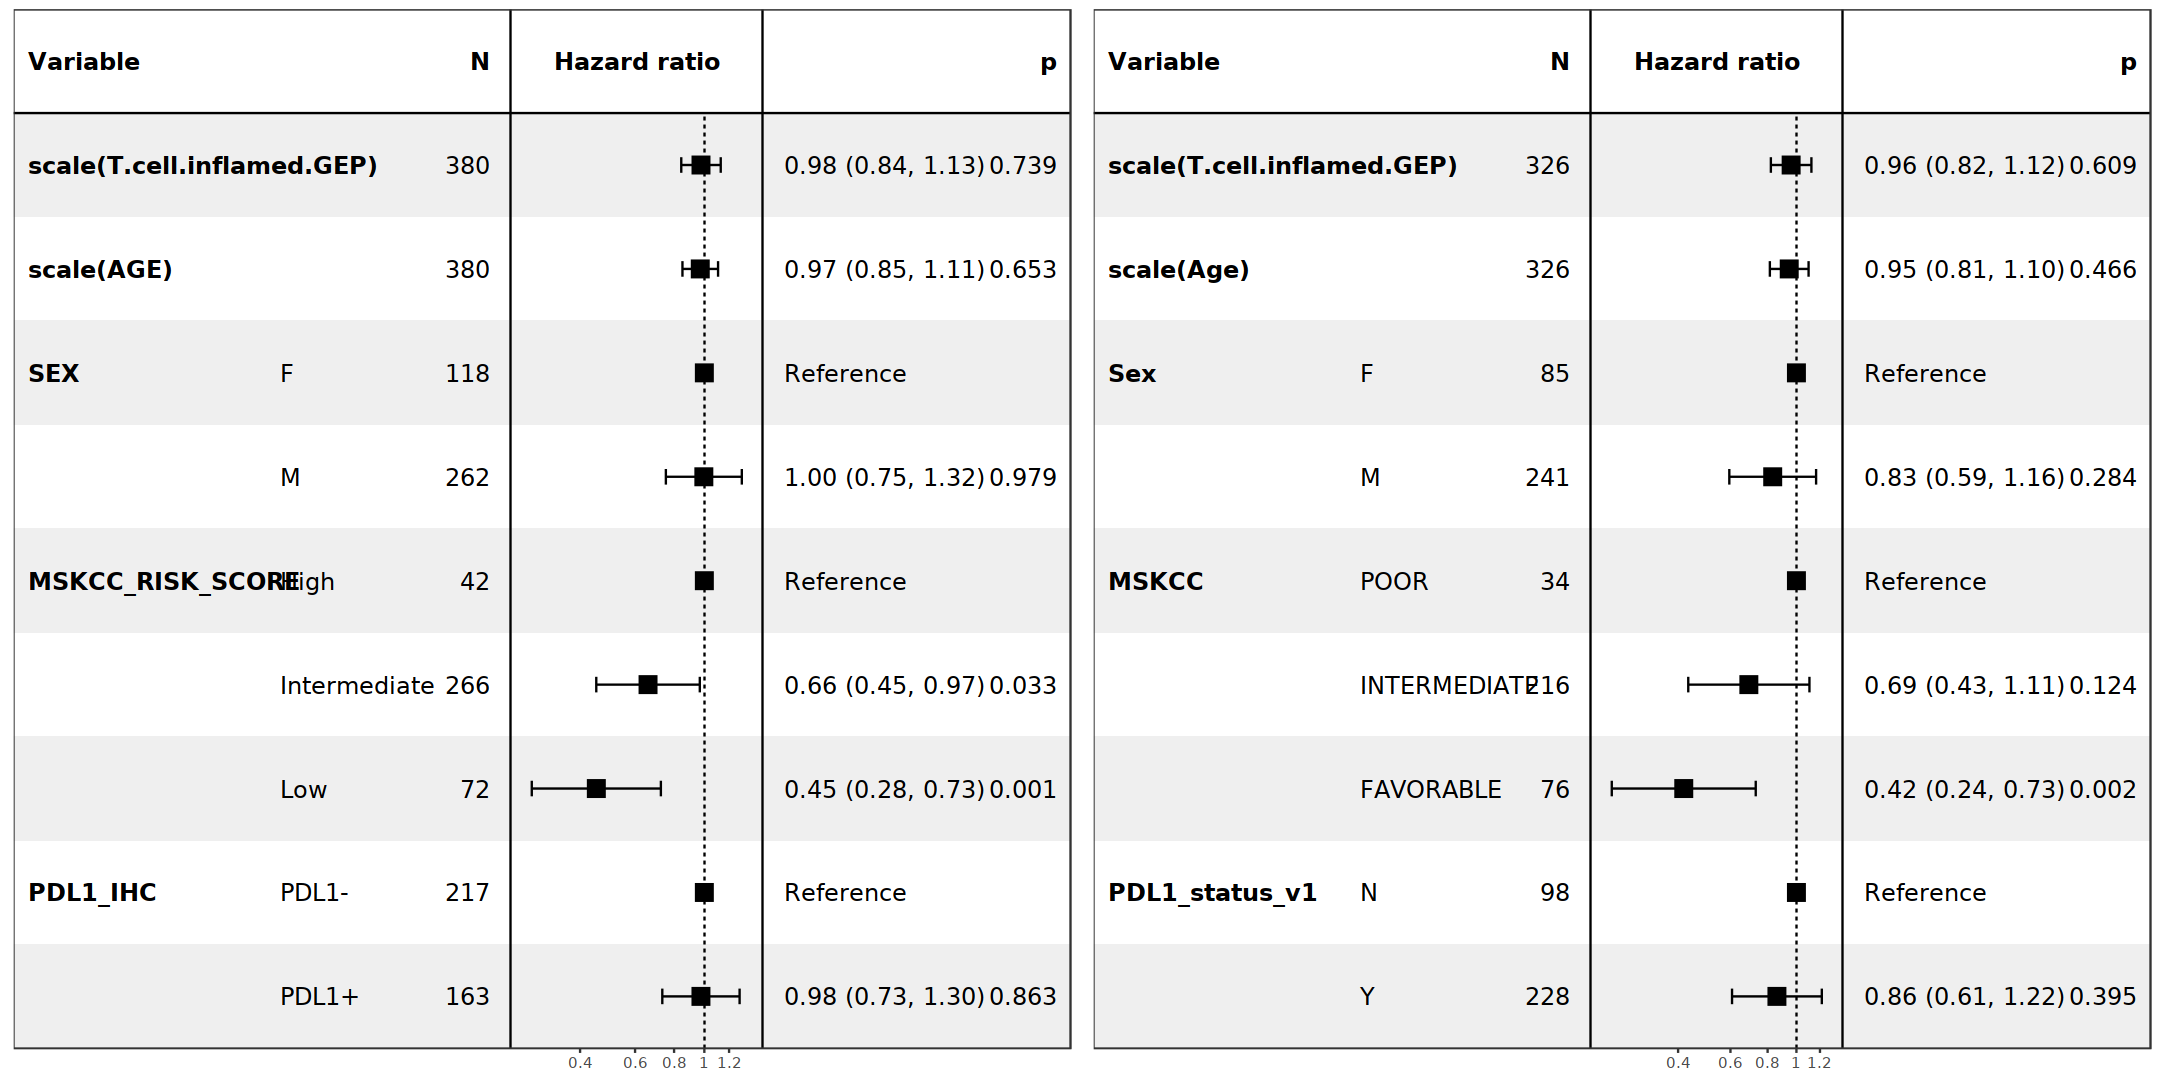

In [72]:
options(repr.plot.width=18, repr.plot.height=9)

ggarrange(imm151_plot, jav101_plot)

ggsave("../../Supp_Figures_Final/Figure_S8/FigureS8Q_R_Cox_IMM151_JAV101_ICB_GEP_Scaled.pdf",width = 18, height = 9)

### Supp Figure 8S-T. Logistic regression models for CB vs NCB in IO+VEGF arm of IMM151 and JAV101 (T cell-inflamed GEP) <a name="9"></a>

In [73]:
panels <- list(
  list(width = 0.01),
  list(width = 0.18, display = ~variable, fontface = "bold", heading = "Variable"),
  list(width = 0.1, display = ~level),
  list(width = 0.05, display = ~n, hjust = 1, heading = "N"),
  list(width = 0.03, item = "vline", hjust = 0.5),
  list(
    width = 0.15, item = "forest", hjust = 0.5, heading = "Odds ratio", linetype = "dashed",
    line_x = 0
  ),
  list(width = 0.03, item = "vline", hjust = 0.5),
  list(width = 0.12, display = ~ ifelse(reference, "Reference", sprintf(
    "%0.2f (%0.2f, %0.2f)",
    trans(estimate), trans(conf.low), trans(conf.high)
  )), display_na = NA),
  list(
    width = 0.075,
    display = ~ ifelse(reference, "", format.pval(p.value, digits = 1,nsmall = 3, eps = 0.001)),
    display_na = NA, hjust = 1, heading = "p"
  ),
  list(width = 0.01)
)

### IMM151


 CB NCB 
263 117 


Call:
glm(formula = Benefit_Binary_Num ~ scale(T.cell.inflamed.GEP) + 
    scale(AGE) + SEX + MSKCC_RISK_SCORE + PDL1_IHC, family = "binomial", 
    data = atezo_bev)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0892  -1.3745   0.7892   0.9051   1.2427  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)   
(Intercept)                   0.31101    0.37042   0.840  0.40112   
scale(T.cell.inflamed.GEP)    0.02971    0.12948   0.229  0.81853   
scale(AGE)                    0.17990    0.11305   1.591  0.11154   
SEXM                          0.13516    0.24346   0.555  0.57879   
MSKCC_RISK_SCOREIntermediate  0.16709    0.34607   0.483  0.62923   
MSKCC_RISK_SCORELow           1.20257    0.46003   2.614  0.00895 **
PDL1_IHCPDL1+                 0.25245    0.26440   0.955  0.33969   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 469.23

GVIF     Df GVIF^(1/(2*Df))
scale(T.cell.inflamed.GEP) 1.312344 1  1.145576       
scale(AGE)                 1.018174 1  1.009046       
SEX                        1.013597 1  1.006776       
MSKCC_RISK_SCORE           1.011671 2  1.002905       
PDL1_IHC                   1.318119 1  1.148094

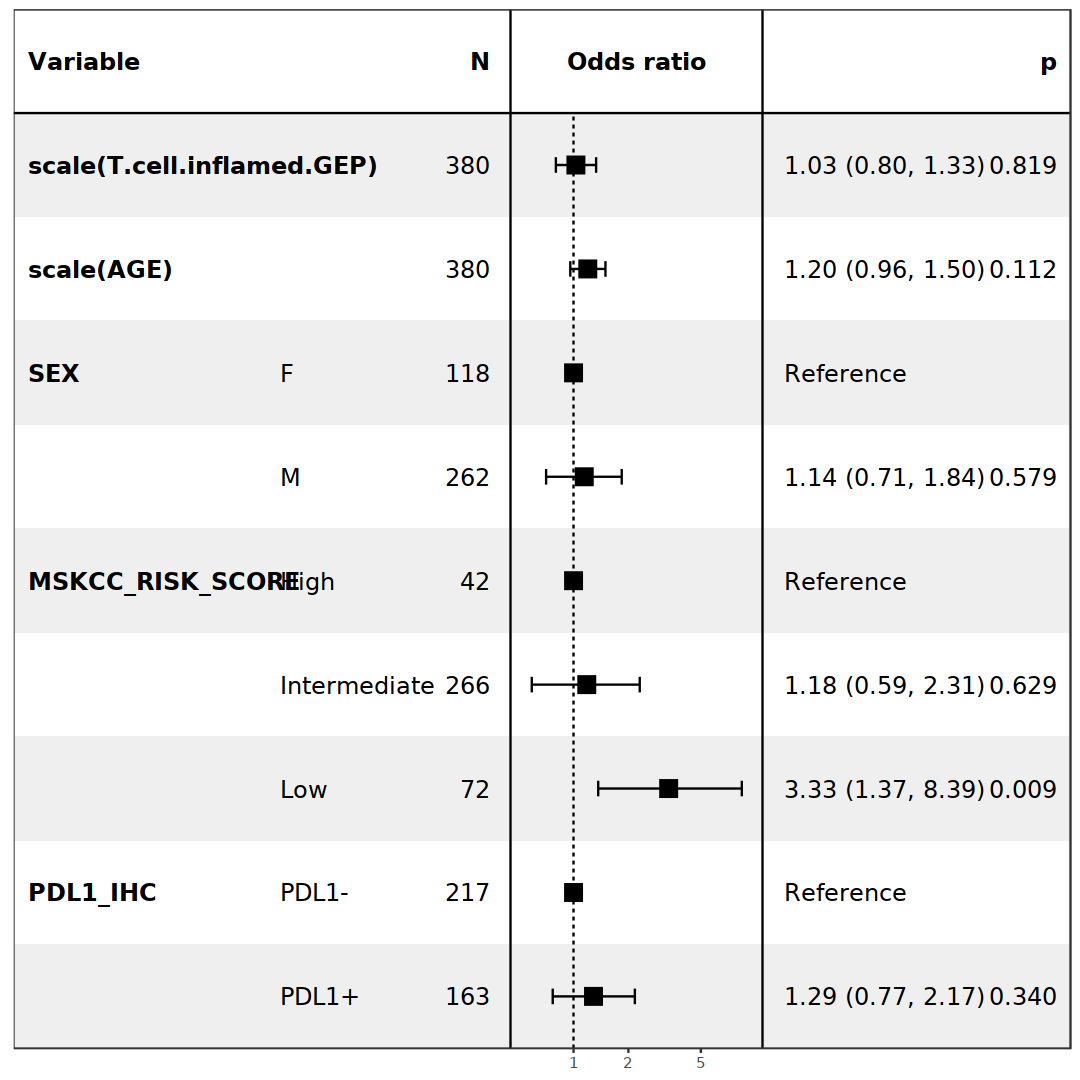

In [74]:
options(repr.plot.width=9, repr.plot.height=9)

clin_imm151_full$PDL1_IHC = relevel(factor(clin_imm151_full$PDL1_IHC), ref = "PDL1-")
atezo_bev = subset(clin_imm151_full, ARM == "atezo_bev")

atezo_bev = subset(atezo_bev, OBJECTIVE_RESPONSE %in% c("CR","PD","PR","SD"))
atezo_bev = mutate(atezo_bev, Benefit = ifelse(OBJECTIVE_RESPONSE == "CR","CB",ifelse(OBJECTIVE_RESPONSE == "PR","CB",ifelse(OBJECTIVE_RESPONSE == "PD","NCB",ifelse(OBJECTIVE_RESPONSE == "SD" & PFS_MONTHS >= 6,"CB","NCB")))))
table(atezo_bev$Benefit)

atezo_bev = mutate(atezo_bev, Benefit_Binary_Num = ifelse(Benefit == "CB",1,0))

mylogit <- glm(Benefit_Binary_Num ~ scale(T.cell.inflamed.GEP) + scale(AGE) + SEX + MSKCC_RISK_SCORE + PDL1_IHC, family = "binomial", data = atezo_bev)
summary(mylogit)
vif(mylogit)

#res.cox <- coxph(Surv(PFS_MONTHS, PFS_CENSOR) ~ scale(T.cell.inflamed.GEP) + scale(AGE) + SEX + MSKCC_RISK_SCORE + PDL1_IHC, data = atezo_bev)
imm151_plot = forest_model(mylogit, panels,recalculate_width = F)
imm151_plot

### JAV101


 CB NCB 
239  96 


Call:
glm(formula = Benefit_Binary_Num ~ scale(T.cell.inflamed.GEP) + 
    scale(Age) + Sex + MSKCC + PDL1_status_v1, family = "binomial", 
    data = avel_axit)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2512  -1.1605   0.6771   0.8025   1.5836  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -0.6641     0.4441  -1.496 0.134758    
scale(T.cell.inflamed.GEP)   0.1232     0.1374   0.896 0.370069    
scale(Age)                   0.2153     0.1254   1.717 0.086048 .  
SexM                         0.1470     0.2877   0.511 0.609460    
MSKCCINTERMEDIATE            1.0429     0.3856   2.705 0.006836 ** 
MSKCCFAVORABLE               1.8220     0.4700   3.877 0.000106 ***
PDL1_status_v1Y              0.5524     0.2904   1.902 0.057183 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 395.19  on 325  deg

GVIF     Df GVIF^(1/(2*Df))
scale(T.cell.inflamed.GEP) 1.193993 1  1.092700       
scale(Age)                 1.007738 1  1.003862       
Sex                        1.028938 1  1.014366       
MSKCC                      1.048473 2  1.011904       
PDL1_status_v1             1.188060 1  1.089982

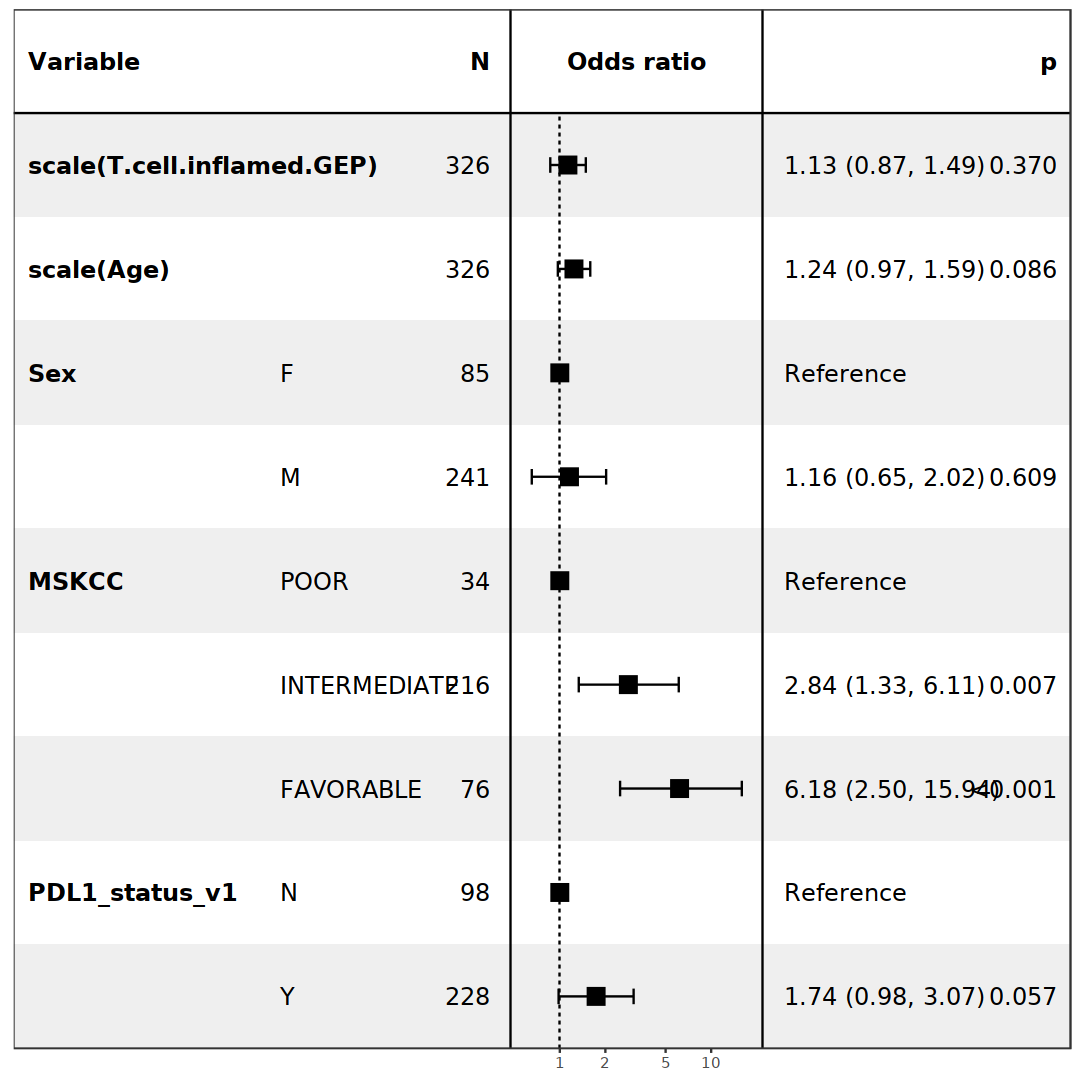

In [75]:
options(repr.plot.width=9, repr.plot.height=9)

avel_axit = subset(clin_jav101_full, Arm == "Avelumab + Axitinib")

avel_axit = subset(avel_axit, ORR %in% c("CR","PD","PR","SD"))
avel_axit = mutate(avel_axit, Benefit = ifelse(ORR == "CR","CB",ifelse(ORR == "PR","CB",ifelse(ORR == "PD","NCB",ifelse(ORR == "SD" & PFS >= 6,"CB","NCB")))))
table(avel_axit$Benefit)

avel_axit = mutate(avel_axit, Benefit_Binary_Num = ifelse(Benefit == "CB",1,0))

mylogit <- glm(Benefit_Binary_Num ~  scale(T.cell.inflamed.GEP) + scale(Age) + Sex + MSKCC + PDL1_status_v1, family = "binomial", data = avel_axit)
summary(mylogit)
vif(mylogit)

#res.cox <- coxph(Surv(PFS, PFS_CNSR) ~  scale(T.cell.inflamed.GEP) + scale(Age) + Sex + MSKCC + PDL1_status_v1, data = avel_axit)
jav101_plot = forest_model(mylogit,panels,recalculate_width = F)
jav101_plot

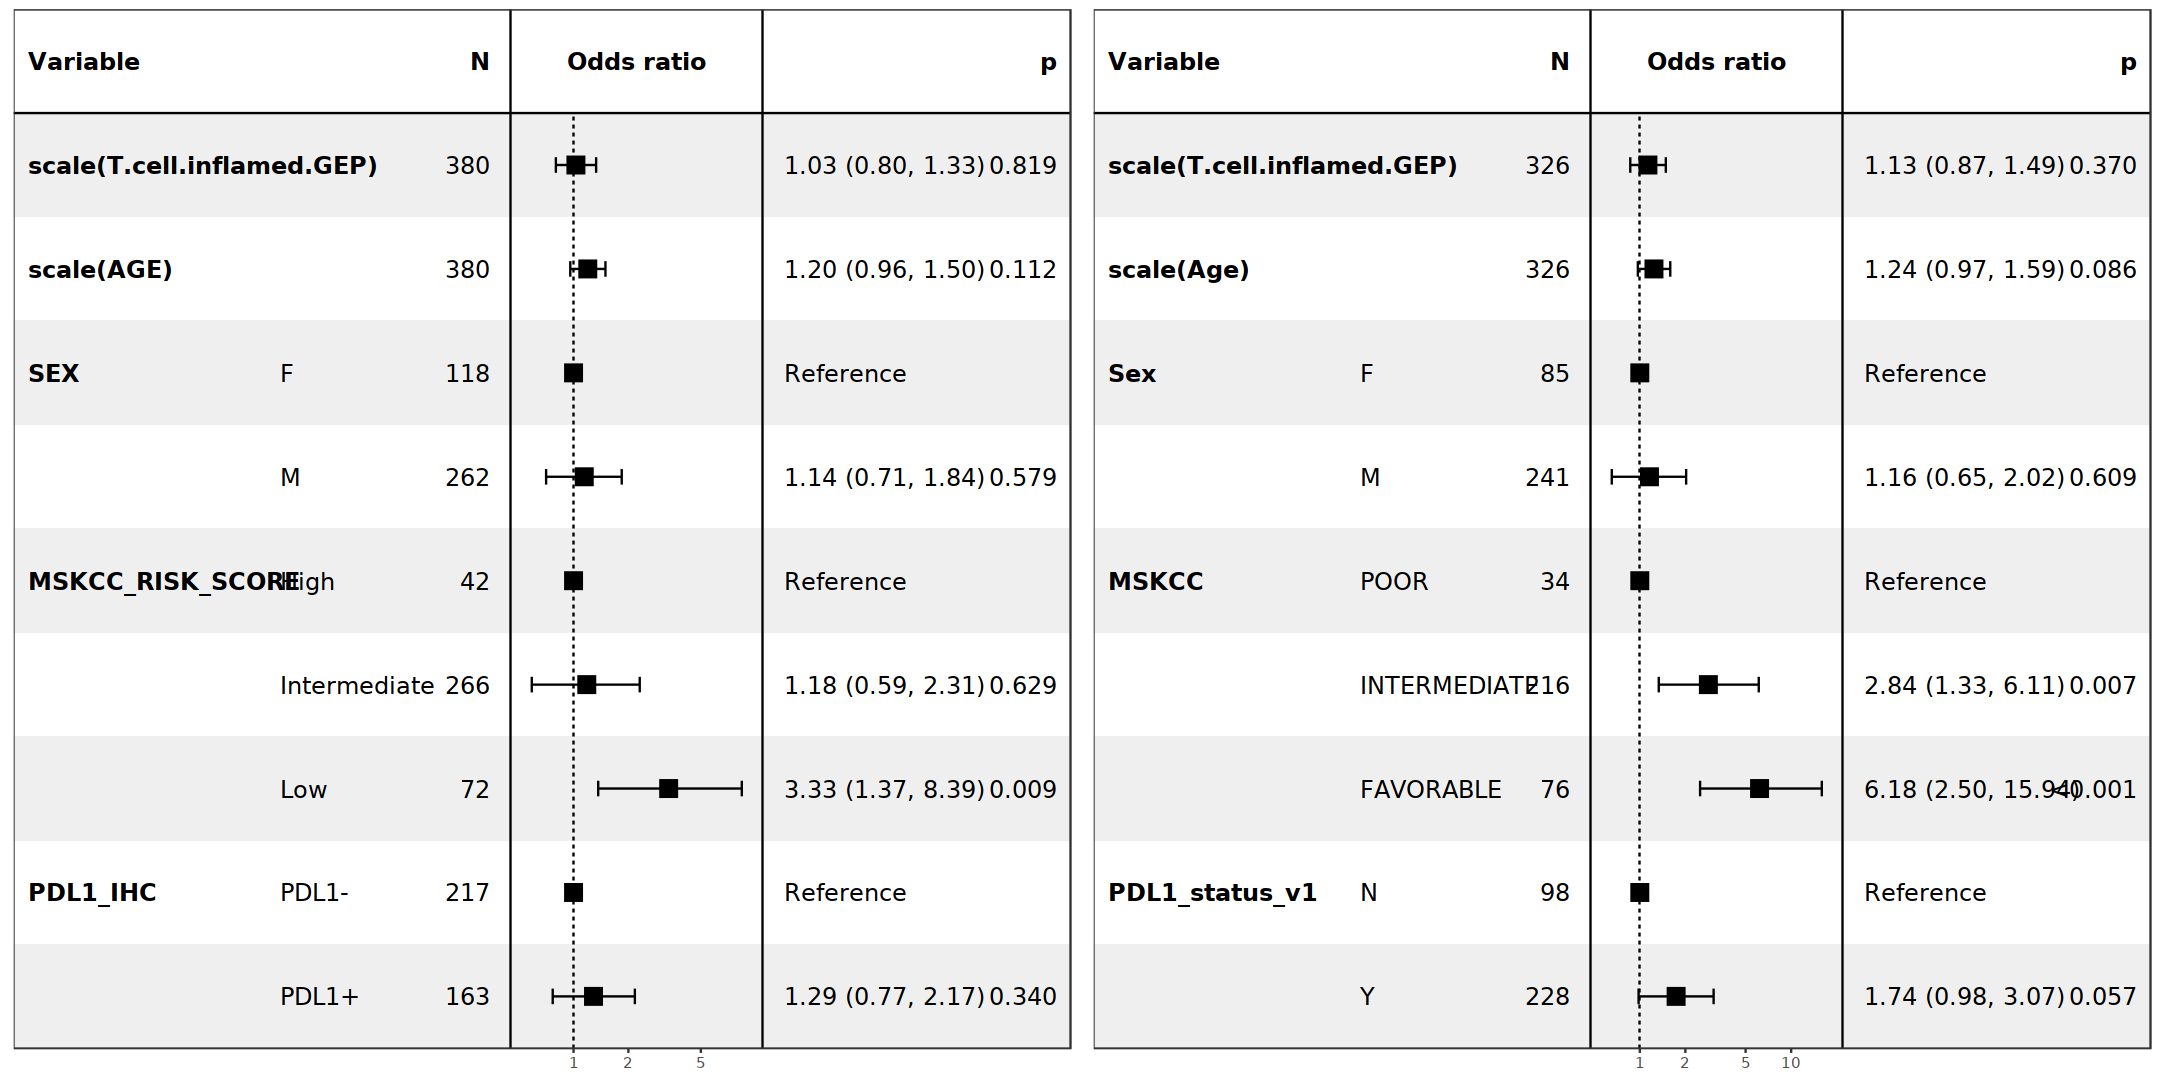

In [76]:
options(repr.plot.width=18, repr.plot.height=9)

ggarrange(imm151_plot, jav101_plot)

ggsave("../../Supp_Figures_Final/Figure_S8/FigureS8S_T_LR_IMM151_JAV101_ICB_GEP_Scaled.pdf",width = 18, height = 9)

In [77]:
print(sessionInfo())
print(version)

R version 4.1.0 (2021-05-18)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux Server 7.9 (Maipo)

Matrix products: default
BLAS:   /usr/lib64/libblas.so.3.4.2
LAPACK: /broad/software/free/Linux/redhat_7_x86_64/pkgs/r_4.1.0/lib64/R/lib/libRlapack.so

locale:
[1] C

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] pROC_1.17.0.1          scales_1.3.0           forestmodel_0.6.2     
 [4] forcats_0.5.2          purrr_0.3.5            readr_2.0.0           
 [7] tidyr_1.2.1            tibble_3.1.8           tidyverse_1.3.1       
[10] survminer_0.4.9.999    survival_3.2-11        yarrr_0.1.5           
[13] circlize_0.4.15        BayesFactor_0.9.12-4.2 coda_0.19-4           
[16] jpeg_0.1-9             broom_1.0.1            magrittr_2.0.3        
[19] pheatmap_1.0.12        ggridges_0.5.4         hrbrthemes_0.8.0      
[22] viridis_0.6.1          viridisLite_0.4.2    